## Modelos Supervisados 
Tarea # 2   Richard Douglas Grijalba

1. Información General
Ventures Capital Inc., para optimizar su
cartera de otorgamiento de créditos a empresas que optan por ser financiadas y ellas lo que hacen es proveerle sus estados financieros junto con una columna llamada “Bankrupt”, que define como 0 en caso de que la empresa se reporta en los estados financieros como competente, es decir, que no va a quedar en banca rota, mientras que un 1 significa que la empresa es probable que caiga en banca rota

Qué se requiere analizar en una empresa para determinar la salud o liquidez financiera? 

Según la información brindada se puede inferir si una empresa puede o no caer en bancarrota?

In [1347]:
# Importacion de bibliotecas

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.mixture import GaussianMixture #GMM
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import argparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
sns.set()

In [ ]:
pip install Kneed

2. Importacion del Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Sets/data 3.csv')

In [ ]:
data.head(5)   # corresponde a un datset de información financiera, en la que presenta información relevante (ratios financieros) 
               # que permiten determinar el nivel de liquidez financiera.

Bankrupt?  ...   Equity to Liability
0          1  ...              0.016469
1          1  ...              0.020794
2          1  ...              0.016474
3          1  ...              0.023982
4          1  ...              0.035490

[5 rows x 96 columns]

##3. Exploración Basica del DataSet

###3.1 Descripción de las Variables

**Definiciones o Conceptos Financieros Básicos**

 
Algunas variables pueden parecer la misma o muy similares, sin embargo corresponde a un mismo ratio financiero que se le modifica alguna variable en el proceso de su cálculo, por ejemplo la prueba de liquidez en el activo corriente, y  posterior a eso existe la misma prueba pero restandole el valor de los inventarios (prueba acida).

Los Ratios Financieros (razones financieras) pueden clasificarse según la finalidad de la información a valor, **Ratios de Liquidez**, **Gestión**, **Endeudamiento o Ratios de Rentabilidad**, la impportancia o utilidad de los ratios financieros recae en que por medio de un valor o factor, permite evaluar un aspecto de la operación,gestión o inversión de una compañía, sin necesidad de ller un informe extenson, una vez que la persona observa los ratios, amplía en información sobre aquellos que le llamó la atención.
En lo que respecta a otros indicadores, las personas tienden a confundir flujo de caja con Utilidad, siendo cosas muy distintas, el Flujo de Caja es el "dinero" disponible que la compañia tiene para hacer frente a las actividades de operacion , ciclo de negocio, inversión y financiero.
La Compañaía puede obtener recursos de fuentes propias o de terceros (flujo de efectivo).
Mientras que la Utilidad (resultado del periodo) se relaciona al resultado de tomar todos los ingresos de la empresa y restarle los costos y gatos. Si el Resultado final es positivo es Utilidad y si es negativo es Pérdida.
El flujo de efectivo se ve reflejado en el Estado de Situación Financiera y en el Estado de Flujo de Efectico y la Utilidad se ve generada en el Estado de Resultados (P&L). Los Activos puede ser Fijos (depreciables) La depreciación es el registro de gasto -mensual- por desgaste o escudo fiscal de los activos, los cuales se deprecian por varios métodos. O pueden ser Activos Corrientes (cuentas por cobrar, Inventario, Efectivo)
Los Inventarios corresponden a la mercadería que una empresa vende para generar recursos.
Intereses corresponden al costo financiero de utilizar financiamiento por medio de recursos de terceros.

**Explicado lo anterior se procede a detallar las caracteristicas que intervienen en el Dataset:**  Se detallan algunas (en el apartado del EDA, se detallan cada na), de igual forma se aportan los links para la consulta detallada sobre ratios e indicadores financieros

**Bankrupt?**: Aparece como una caracteristica binaria, en donde si indica cero 0, nos dice que la empresa es competente, mientras que si el valor es 1, nos indica que es probable que la empresa caiga en banca rota.

 ROA(C) before interest and depreciation before interest, 
 ROA: El rendimiento de los activos es un índice de rentabilidad que proporciona la cantidad de ganancias que una empresa puede generar a partir de sus activos, antes de los gastos de Intereses, Depreciacion.

 ROA(A) before interest and % after tax .  El rendimiento de los activos es un índice de rentabilidad que proporciona la cantidad de ganancias que una empresa puede generar a partir de sus activos, antes de intereses pero despues de impuestos.

 ROA(B) before interest and depreciation after tax, El rendimiento de los activos es un índice de rentabilidad que proporciona la cantidad de ganancias que una empresa puede generar a partir de sus activos , pero en este caso antes de intereses y depreciacion pero despues de impuestos.

Operating Gross Margin: representa el porcentaje de los ingresos totales que le queda a una empresa por encima de los costos directamente relacionados con la producción y la distribución.

Cash flow rate: la tasa de crecimiento a largo plazo del efectivo operativo, el dinero que realmente ingresa a las cuentas de la compañía producto de las operaciones comerciales, la IRR corresponde es una tasa de descuento que hace que el valor actual neto (VAN) de todos los flujos de efectivo sea igual a cero en un análisis de flujo de efectivo descontado.

Quick Ratio:  mide la capacidad de una empresa para pagar sus pasivos corrientes sin necesidad de vender su inventario u obtener financiación adicional.

Total Asset Turnover: Mide el peso de las ventas o los ingresos de una empresa en relación con el valor de sus activos. El índice de rotación de activos se puede utilizar como indicador de la eficiencia con la que una empresa utiliza sus activos para generar ingresos.

Net Income to Total Assets: Proporciona la cantidad de beneficios que una empresa puede generar a partir de sus activos.

Total Asset Return Growth Rate Ratio: El rendimiento de los activos totales (ROTA) es una relación que mide las ganancias de una empresa antes de intereses e impuestos (EBIT) en relación con sus activos netos totales

Quick Assets/Current Liability: Es una medida más conservadora de la liquidez de una empresa que los activos corrientes, ya que excluye los inventarios. El índice rápido se utiliza para analizar la capacidad inmediata de una empresa para pagar sus pasivos corrientes sin la necesidad de vender su inventario o utilizar financiación.

Inventory and accounts receivable/Net value: Valor razonable del inventariio y las cuentas por cobrar

Inventory/Current Liability : Proporciona información de la capacidad de la empresa que al realizar ventas de inventario pueda generar el efectivo necesario para cumplir con las obligaciones a corto plazo de los acreedores.

Accounts Receivable Turnover: Esta relación le da a la empresa una idea sólida de la eficiencia con la que recauda las deudas contraídas con el crédito que extendió, y un número menor muestra una mayor eficiencia

Inventory Turnover Rate (times): indica la tasa a la que una empresa vende y reemplaza su stock de bienes durante un período en particular. La fórmula del índice de rotación de inventario es el costo de los bienes vendidos dividido por el inventario promedio para el mismo período

Allocation rate per person:Una tasa de asignación es un porcentaje del efectivo o desembolso de capital de un inversor que se destina a una inversión final.

Total expense/Assets: Es una medida de los costos totales asociados con la administración y operación de un fondo de inversión, como un fondo mutuo. Estos costos consisten principalmente en honorarios de administración y gastos adicionales, como honorarios de negociación, honorarios legales, honorarios de auditor y otros gastos operativos.

Total debt/Total net worth : Es un cálculo simple que puede ayudarlo a evaluar la salud financiera de una empresa determinada al comparar el nivel de deuda que tiene con su patrimonio neto total.

Long-term Liability to Current Assets: Este índice proporciona una medida general de la situación financiera a largo plazo de una empresa, incluida su capacidad para cumplir con sus obligaciones financieras por préstamos pendientes.



*Definiciones de ratios o razones financieras*

**Ratios de Rentabilidad** :
Return on Assets (ROA), Return on Equity (ROE), Return on Investment (ROI), Return on Invested Capital (ROIC), EBITDA Margin, Net Profit Margin, Operating Margin.

(https://www.investopedia.com/ask/answers/031215/what-formula-calculating-return-assets-roa.asp)

**Ratios de Liquidez**: Current Ratio, Quick Ratio, Cash Ratio, Operating Cash Flow Ratio, Receivables Turnover Ratio, Inventory Turnover

https://www.investopedia.com/terms/q/quickratio.asp

**Ratios de Solvencia**: Debt-To-Equity Ratio, Total-Debt-to-Total-Assets Ratio, Interest Coverage Ratio, Shareholder Equity Ratio

https://www.investopedia.com/terms/i/interestcoverageratio.asp


*Clasificaciones de los distintos ratios financieros*

https://corporatefinanceinstitute.com/resources/knowledge/finance/financial-ratios/

Verificación de datos nulos 

In [ ]:
data.isnull().sum()    # según la revisión no parecen existir datos nulo o con problemas

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
data.dtypes #  tenemos 96 caracteristicas distintas (columnas)  y 6819 observaciones (filas)
               # todas las caracteristicas presentes son del tipo númerico.  3 del tipo Int  y 93 del tipo Float

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [ ]:
data.duplicated().sum()  # no presentamos daots duplicados

0

In [ ]:
data.size   # tenemos un tamñana de los datos de 654324 datos

654624

In [ ]:
data.info()    # tenemos 96 caracteristicas distintas (columnas)  y 6819 observaciones (filas)
               # todas las caracteristicas presentes son del tipo númerico.  3 del tipo Int  y 93 del tipo Float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
data1 = data.copy()

Vamos a proceder a quitar un espacio extra que se encuentra en los encabezados

In [ ]:
data1.columns=data1.columns.str.strip()

In [ ]:
data1.head(3)

Bankrupt?  ...  Equity to Liability
0          1  ...             0.016469
1          1  ...             0.020794
2          1  ...             0.016474

[3 rows x 96 columns]

In [ ]:
data1.info()  # se limpian los espacios en blanco al inicio de cada nombre de columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

## EDA- ANALISIS EXPLORATORIO DE DATOS

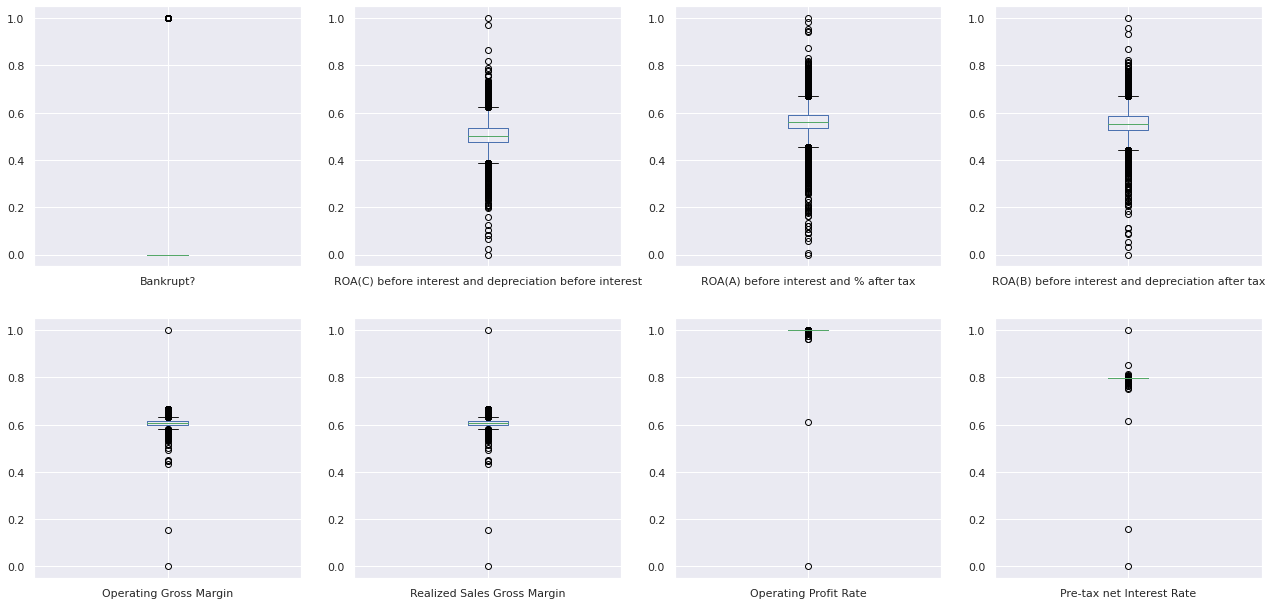

In [ ]:
#De entrada se observan datos atípicos en ciertas caracteristicas, ademas al ser bastantes caracteriticas 
# se deben elegir las que aportan para el proceso de generación de análisis para el estudio del caso
data1[["Bankrupt?","ROA(C) before interest and depreciation before interest","ROA(A) before interest and % after tax","ROA(B) before interest and depreciation after tax", "Operating Gross Margin", "Realized Sales Gross Margin","Operating Profit Rate","Pre-tax net Interest Rate"]].plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(22,22)})
plt.show()

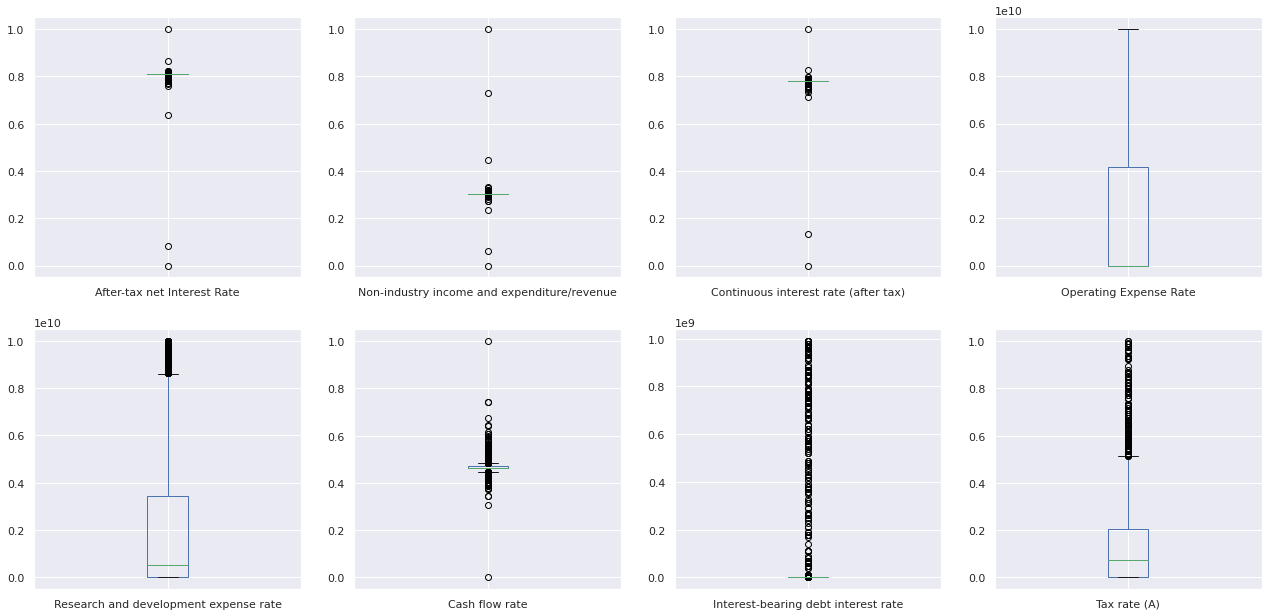

In [ ]:
#De entrada se observan datos atípicos en ciertas caracteristicas, ademas al ser bastantes caracteriticas 
# se deben elegir las que aportan para el proceso de generación de análisis para el estudio del caso
data1[["After-tax net Interest Rate","Non-industry income and expenditure/revenue","Continuous interest rate (after tax)","Operating Expense Rate", "Research and development expense rate", "Cash flow rate","Interest-bearing debt interest rate","Tax rate (A)"]].plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(22,22)})
plt.show()

Histogramas en grupo de Caracteristicas Iniciales: Posteriormente se van a generar de forma individual, sin embargo este grupo de permite crear una idea de la distribución de los datos que están presentes

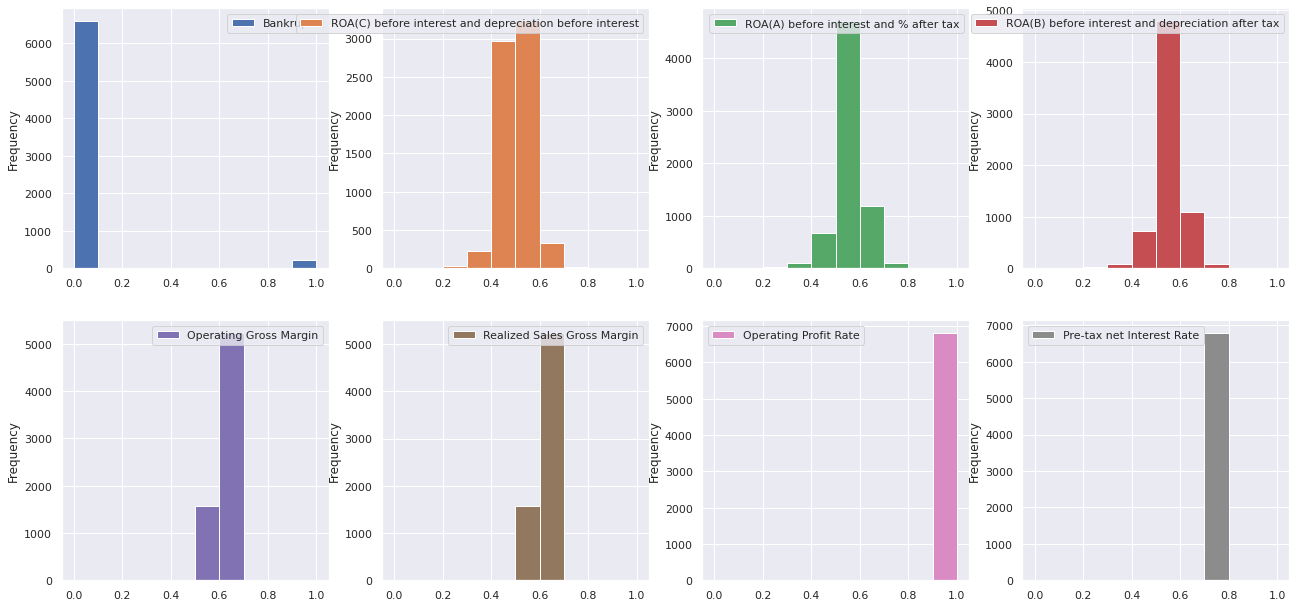

In [ ]:
data1[["Bankrupt?","ROA(C) before interest and depreciation before interest","ROA(A) before interest and % after tax","ROA(B) before interest and depreciation after tax", "Operating Gross Margin", "Realized Sales Gross Margin","Operating Profit Rate","Pre-tax net Interest Rate"]].plot(kind='hist',subplots=True, layout=(4,4), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(22,22)})
plt.show()

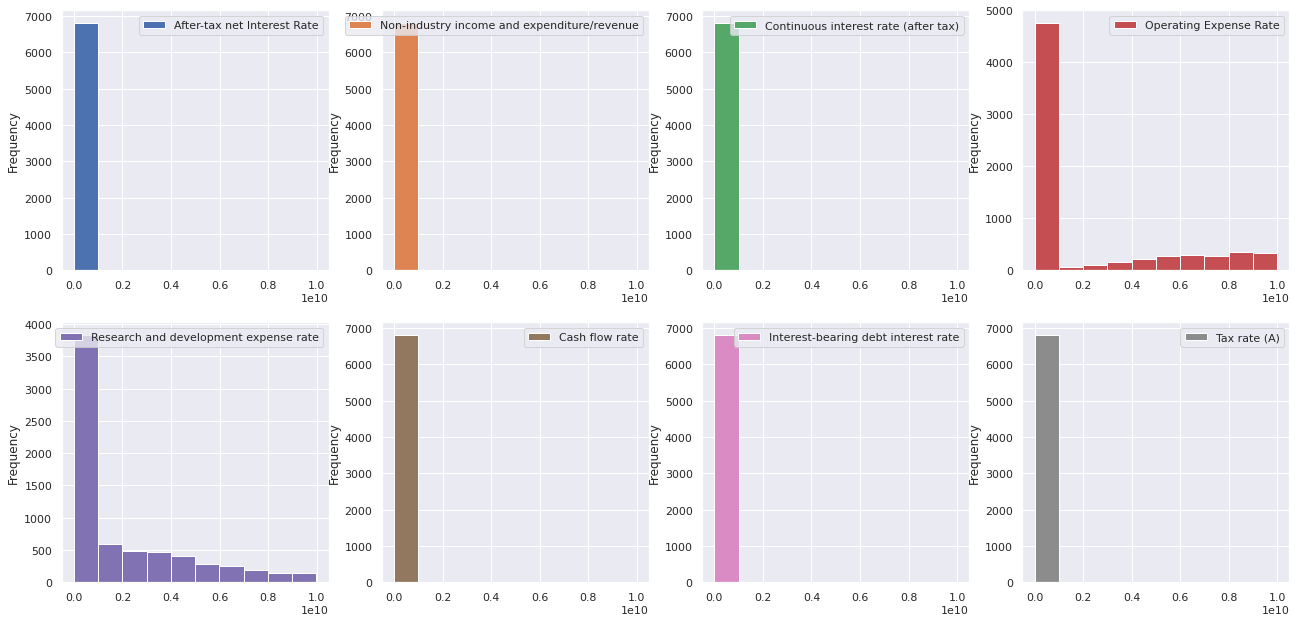

In [ ]:
data1[["After-tax net Interest Rate","Non-industry income and expenditure/revenue","Continuous interest rate (after tax)","Operating Expense Rate", "Research and development expense rate", "Cash flow rate","Interest-bearing debt interest rate","Tax rate (A)"]].plot(kind='hist',subplots=True, layout=(4,4), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(22,22)})
plt.show()

In [ ]:
datos = data1.copy()   #se realiza una copia del dataset

# vamos a trabajar con la copia datos para el proceso de descripción de las caracteristicas, detalle del EDA, posteriormente hacemos una verificación en correlaciones
# graficas y tablas de detalle.  finalmente proceso de ver el Machine Learning seleccionado, hacemos una corrida del modelo y luego vemos
# los atipicos y haremos una comparativa entre los resultados.  Finalmente una corrida de Modelo No Supervisado, en el cual se utilizarán caracteristicas seleccionadas de interes
# Recordemos que tenemos 96 caracteristicas distintas (columnas)  y 6819 observaciones (filas)
# todas las caracteristicas presentes son del tipo númerico.  3 del tipo Int  y 93 del tipo Float

1. Analisis Exploratorio de la Caracteristica **Bankrupt**:
Aparece como una caracteristica binaria, en donde si indica cero 0, nos dice que la empresa es competente, mientras que si el valor es 1, nos indica que es probable que la empresa caiga en banca rota.

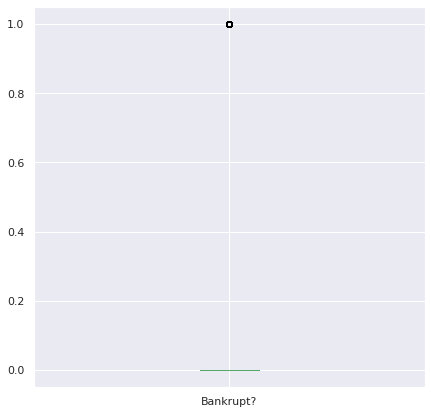

In [ ]:
datos['Bankrupt?'].plot(kind='box')      # caracteristica binaria   en la cual la categoria es puede o no caer en bancarrota 
sns.set(rc={'figure.figsize':(7,7)}) 
plt.show() 

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

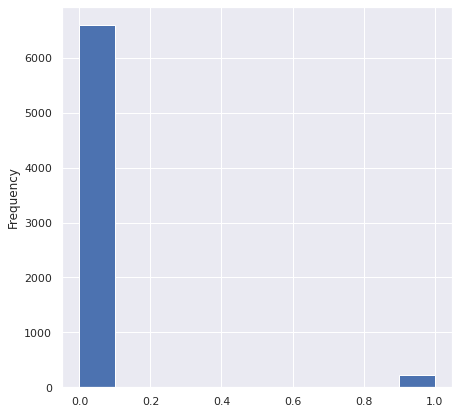

In [ ]:
datos['Bankrupt?'].plot(kind='hist')  # corresponde a una caracteristica binaria, indica si cae o no en bancarrota
sns.set(rc={'figure.figsize':(7,7)})  # en este caso calcular varias medidas de tendencia central no genera un valor agregado
plt.show()                            # en vista que los valores o son 1 o 0, pero vamos a calcular la moda

In [ ]:
datos['Bankrupt?'].mode()   # en esta caracteristica el valor que más aparece es cero 0 aquellos que indican cero 0 indica que la empresa es competente                    

0    0
dtype: int64

2.Analisis Exploratorio de la Caracteristica **ROA(C) before interest and depreciation before interest**:
El rendimiento de los activos es un índice de rentabilidad que proporciona la cantidad de ganancias que una empresa puede generar a partir de sus activos, antes de los gastos de Intereses, Depreciacion.

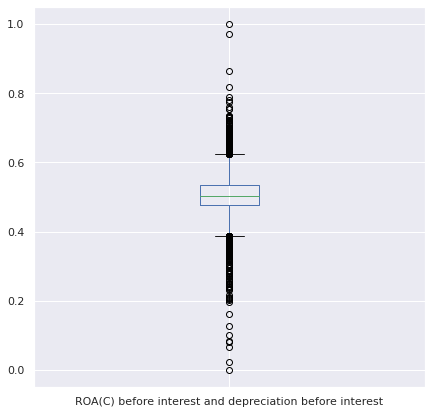

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)}) 
plt.show()     # se aprecia una gran cantidad de valores atípicos, los cuales serán tratados más adelante

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

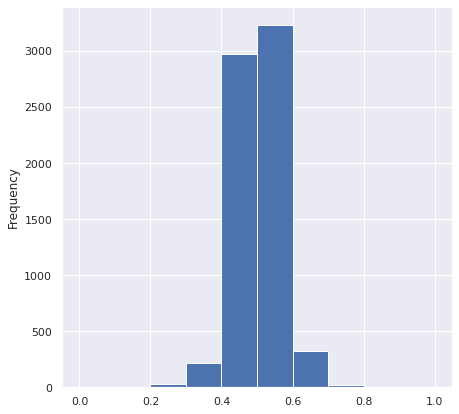

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].plot(kind='hist')    # Se aprecia un distribución concentrada al centro , con valores de la
sns.set(rc={'figure.figsize':(7,7)})                                                  # moda, media y mediana muy similar, se asemeja a una distribución normal
plt.show()

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].quantile(0.25)   # primer quartil indica que un 25% de las empresas presentan un valor ROA C
                                                                                  # menor igual a 0.47 

0.47652708038804703

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].quantile(0.5)    # el segundo quartil indica que el 50% de las empresas presentan un valor ROA c
                                                                                  # menor o igual a 0.5027

0.502705601325988

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].quantile(0.75)   # indica que el 75 % de las empresas presentan un valor menor igual a 0.535 en ROA c before interest and depreciation

0.535562813825379

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].min()     # el valor más bajo en la caracteristica corresponde a 0

0.0

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].max()     # el valor más alto en la caracteristica corresponde a 1 

1.0

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].mode()      # el valor que más está presenten corresponde a 0.490128

0    0.490128
dtype: float64

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].median()    # la mediana nos indica que el 50% de las empresas tienen un valor menor o igual a 0.502

0.502705601325988

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].mean()    # la mediana nos indica que el valor promedio de la caracteristica es de 0.50517

0.5051796332417822

In [ ]:
datos['ROA(C) before interest and depreciation before interest'].std()   # la desviación standar indica que los datos se alejan del promedio en 0.06068

0.06068563875428437

3.Analisis Exploratorio de la Caracteristica  **ROA(A) before interest and % after tax**: 

El rendimiento de los activos es un índice de rentabilidad que proporciona la cantidad de ganancias que una empresa puede generar a partir de sus activos, antes de intereses pero despues de impuestos

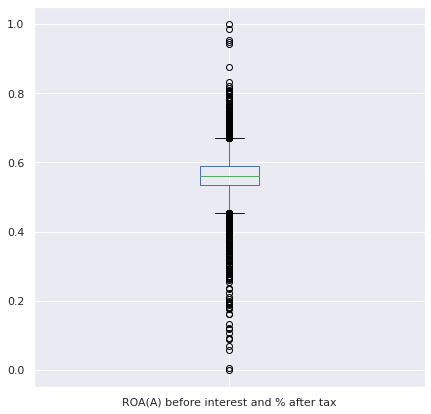

In [ ]:
datos['ROA(A) before interest and % after tax'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)}) 
plt.show()      # se aprecia una gran cantidad de valores atípicos, los cuales serán tratados más adelante

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

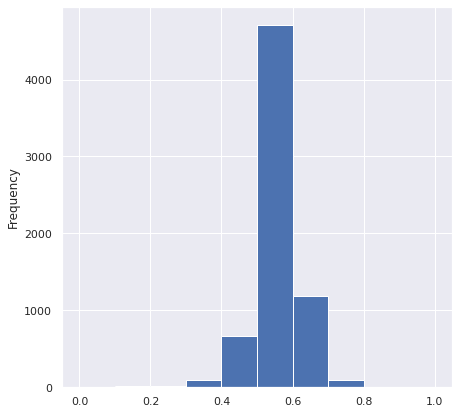

In [ ]:
datos['ROA(A) before interest and % after tax'].plot(kind='hist')       # se observa unadistribución con un poco hacia la izquierda , del tipo negativa
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['ROA(A) before interest and % after tax'].quantile(0.25)  # indica que el 25 % de las empresas presentan un valor menor o igual de 0.5355 
                                                                # en la caracteristica ROA(A) before interest and % after tax

0.53554295682512

In [ ]:
datos['ROA(A) before interest and % after tax'].quantile(0.5) # el segundo quantil indica que el 50 % de las empresas presentan un valor menor o igual  0.5598 en la caracteristica

0.559801569995639

In [ ]:
datos['ROA(A) before interest and % after tax'].quantile(0.75)  # el 75 % de las empresas presentan un valor menor o igual a  0.58915 en ROA(A) before interest and % after tax

0.58915721761884

In [ ]:
datos['ROA(A) before interest and % after tax'].min()   # el valor mínimo corresponde a cero 0

0.0

In [ ]:
datos['ROA(A) before interest and % after tax'].max()   # el valor más alto corresponde  a 1 

1.0

In [ ]:
datos['ROA(A) before interest and % after tax'].mode()    # se observan dos modas, lo que indica que son los dos valores más repetidos en el datet para esta característica

0    0.559693
1    0.568251
dtype: float64

In [ ]:
datos['ROA(A) before interest and % after tax'].median() # el valor de la mediana nos indica que el 50% de las empresas presentan un valor menor o igual a 0.5598
                                                          # en la caracteristica  ROA(A) before interest and % after tax

0.559801569995639

In [ ]:
datos['ROA(A) before interest and % after tax'].mean()   # la media de 'ROA(A) before interest and % after tax es de 0.5586, indica que en promedoo el valor correponde a 0.5586

0.5586249158750473

In [ ]:
datos['ROA(A) before interest and % after tax'].std()   # los valores se alejan en 0.0656 del promedio 

0.06562003103170724

4.Analisis Exploratorio de la Caracteristica **ROA(B) before interest and depreciation after tax**

El rendimiento de los activos es un índice de rentabilidad que proporciona la cantidad de ganancias que una empresa puede generar a partir de sus activos , pero en este caso antes de intereses y depreciacion pero despues de impuestos.

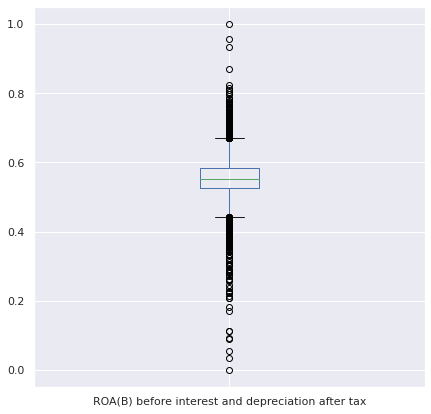

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)}) 
plt.show()           # se aprecia una gran cantidad de valores atípicos, los cuales serán tratados más adelante, el valor medio corresponde a 0.552

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

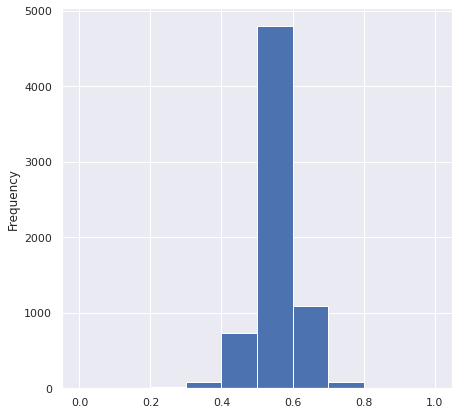

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].plot(kind='hist')   # se observa una distribución con inclinación hacia la derecha, tipo negativa
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].quantile(0.25)  # el primer quantil indica que el 25% de las empresas presentan un valor menor o igual a 0.5272

0.5272766208041121

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].quantile(0.5)   # el quantil indica que 50% de las empresas presentan un valor menor o igual a 0.5522 en la caracteristica

0.552277959205525

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].quantile(0.75) # el tercer quantil indica que el 75% de las empresas presentan un valor menor o igual a 
                                                                         #  0.5841 ROA(B) before interest and depreciation after tax

0.584105144815033

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].min()   # el valor más bajo en la caracteristica corresponde a 0

0.0

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].max()   # el valor más alto corresponde a 1

1.0

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].mode()  # se aprecia que es una distribución multimodal presentando cuatro modas
                                                                    # siendo los valores que más se repiten los siguientes, 

0    0.538787
1    0.551475
2    0.552492
3    0.558220
dtype: float64

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].median() # la mediana indica que el 50% de las empresas presentan un valor menor o igual 
                                                                      # a 0.5522 en ROA B before interest and depreciation

0.552277959205525

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].mean()   # el valor promedio de la caracteristica es 0.5535

0.5535887093516647

In [ ]:
datos['ROA(B) before interest and depreciation after tax'].std()   # los valores se desvian del promeido en 0.0615

0.06159480929187568

5.Analisis Exploratorio de la Caracteristica **Operating Gross Margin**

Representa el porcentaje de los ingresos totales que le queda a una empresa por encima de los costos directamente relacionados con la producción y la distribución.

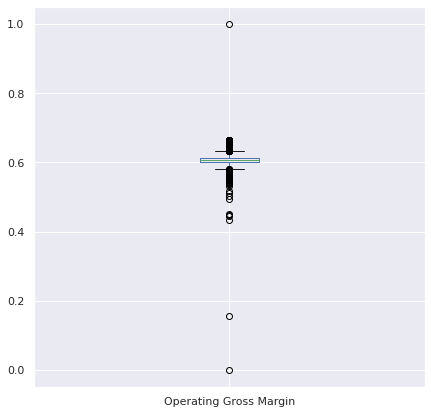

In [ ]:
datos['Operating Gross Margin'].plot(kind='box')     # Se observan valores atípicos, el valor de la mediana alrededor de 0.60
sns.set(rc={'figure.figsize':(7,7)}) 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

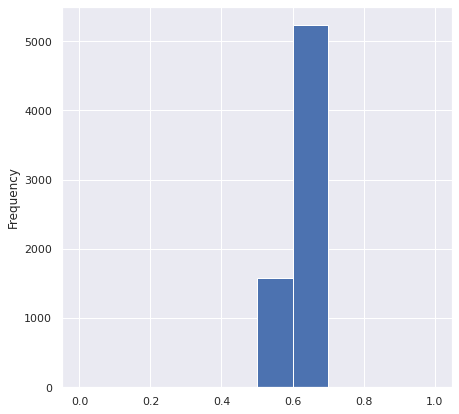

In [ ]:
datos['Operating Gross Margin'].plot(kind='hist')     # distribución con una inclinación hacia la derecha , Negativa
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Operating Gross Margin'].quantile(0.25)   # el 25% de las empresas presentan un valor menor o igual a 0.6004 en la Operating Gross Margin

0.6004446590466854

In [ ]:
datos['Operating Gross Margin'].quantile(0.5)   # el 50% de las empresas presentan un valor menor o igual a 0.6059 en la Operating Gross Margin

0.605997492036495

In [ ]:
datos['Operating Gross Margin'].quantile(0.75)  # el 75 % de las empresas presentan un valor menor o igual a 0.613 en la operatin gross

0.613914152697502

In [ ]:
datos['Operating Gross Margin'].min()   # el valor más bajo corresponde a cero 0

0.0

In [ ]:
datos['Operating Gross Margin'].max()  # el valor más alto de la caracteristica correonde a 1

1.0

In [ ]:
datos['Operating Gross Margin'].mode()   # tiene una presencida de varias modas. Multinmodal , los valores que más se repiten 0.5989 , 0.6019 , 0.6057, 0.6064

0    0.598956
1    0.601976
2    0.605796
3    0.606495
dtype: float64

In [ ]:
datos['Operating Gross Margin'].median()   # la mediana indica que el 50%  de las empresas presentan un valor menor o igual a 0.6059 en la  operating Gross margin

0.605997492036495

In [ ]:
datos['Operating Gross Margin'].mean()  # el valor promedio de la caracteristica corresponde a 0.6079

0.6079480383703836

In [ ]:
datos['Operating Gross Margin'].std()   # los valores se alejan del promedio en 0.01693

0.016933812548221457

6.Analisis Exploratorio de la Caracteristica **Realized Sales Gross Margin**

El margen realizado es el margen de beneficio bruto real que obtiene al final del producto, después de exponerlo a diferentes descuentos y rebajas. El margen bruto muestra la cantidad de ganancias obtenidas antes de deducir los costos de venta, generales y administrativos (SG&A).

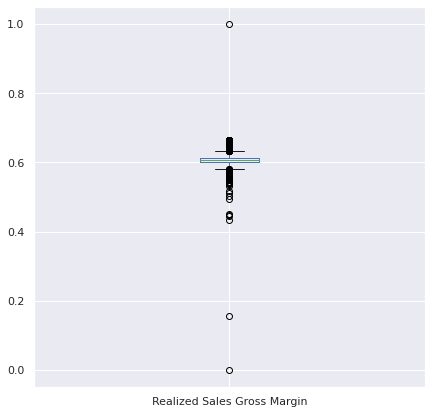

In [ ]:
datos['Realized Sales Gross Margin'].plot(kind='box')    # se observan valores atípicos, el valor mñinimo corresponde a cero 0, el valor de la mediana alrededor de 0.6
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

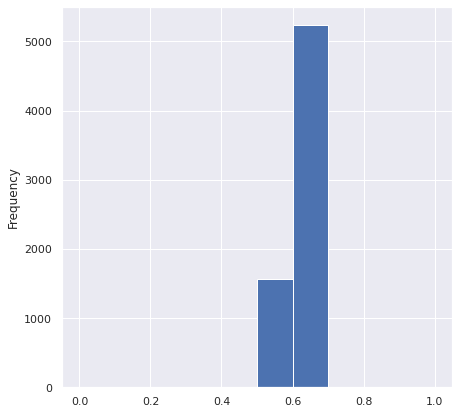

In [ ]:
datos['Realized Sales Gross Margin'].plot(kind='hist')    # se observa la distribución negativa , valores generalmente concentrrados a partir de 0.6
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Realized Sales Gross Margin'].quantile(0.25) # indica que el 25% de las empresas presentan un valor menor o igual a 0.6004

0.6004338488591651

In [ ]:
datos['Realized Sales Gross Margin'].quantile(0.5)  # indica que el %50 de las empresas presentan un valor menor o igual a  0.6059

0.605975871661454

In [ ]:
datos['Realized Sales Gross Margin'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a 0.6138

0.6138420847806976

In [ ]:
datos['Realized Sales Gross Margin'].min()   # el valor más bajo en la caracteristica corresponde a cero 0

0.0

In [ ]:
datos['Realized Sales Gross Margin'].max()   # el valor más alto corresponde a 1

1.0

In [ ]:
datos['Realized Sales Gross Margin'].mode()   # distribución multimodal, los valores que más se repiten corresponden a 0.6025, 0.6047, 0.6057

0    0.602589
1    0.604715
2    0.605796
dtype: float64

In [ ]:
datos['Realized Sales Gross Margin'].median()  # el valor de la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.6079

0.605975871661454

In [ ]:
datos['Realized Sales Gross Margin'].mean()  # el promedio de la caracteristica Realized Sales Gross corresponde a 0.6079

0.6079294691769787

In [ ]:
datos['Realized Sales Gross Margin'].std()  # los valores de la caracteristica se alejan del promedio en  0.01691

0.016916070055675785

7.Analisis Exploratorio de la Caracteristica **Operating Profit Rate**

El margen operativo mide la cantidad de ganancias que obtiene una empresa con un dólar de ventas después de pagar los costos variables de producción, como los salarios y las materias primas, pero antes de pagar intereses o impuestos. Se calcula dividiendo los ingresos operativos de una empresa por sus ventas netas.

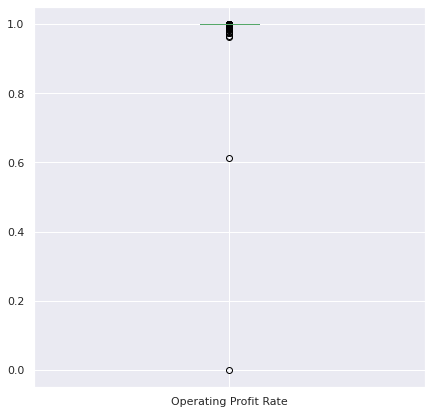

In [ ]:
datos['Operating Profit Rate'].plot(kind='box')    # el valor mínimo corresponde a cero 0,   se observan valores atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

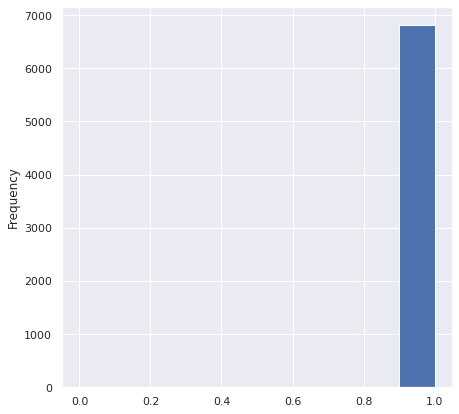

In [ ]:
datos['Operating Profit Rate'].plot(kind='hist')       # una distribución totalmente hacia la derecha
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Operating Profit Rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a 0.99896

0.998969203197885

In [ ]:
datos['Operating Profit Rate'].quantile(0.5)  # indica que el 50 % de las empresas presentan un valor menor o igual a  0.99902

0.9990222393745659

In [ ]:
datos['Operating Profit Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.999094 en la operating Profit rate

0.999094514164357

In [ ]:
datos['Operating Profit Rate'].min()   # el valor más bajo corresponde a cero 0 

0.0

In [ ]:
datos['Operating Profit Rate'].max()   # el valor más alto corresponde a 1

1.0

In [ ]:
datos['Operating Profit Rate'].mode()   # el valor que más se repite corresponde a 0.9989

0    0.998987
dtype: float64

In [ ]:
datos['Operating Profit Rate'].median()   # el valor de la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.9990

0.9990222393745659

In [ ]:
datos['Operating Profit Rate'].mean()  # el valor promedio de la caracteristica corresponde a 0.9987

0.9987551277900453

In [ ]:
datos['Operating Profit Rate'].std()   # los valores de la caracteristica se alejan del promedio en 0.01301

0.01301002509298413

8.Analisis Exploratorio de la Caracteristica **Pre-tax net Interest Rate**

La tasa de rendimiento antes de impuestos es la ganancia o pérdida de una inversión antes de que se tengan en cuenta los impuestos.

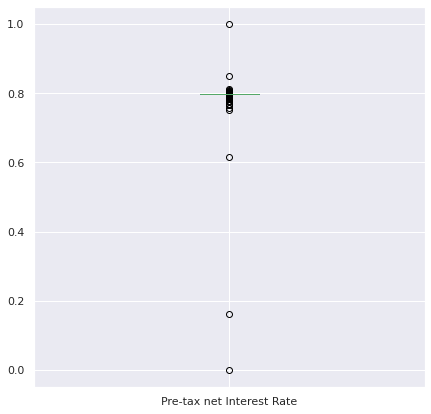

In [ ]:
datos['Pre-tax net Interest Rate'].plot(kind='box')    # el valor mínimo corresponde a cero, presencia d evalores atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis



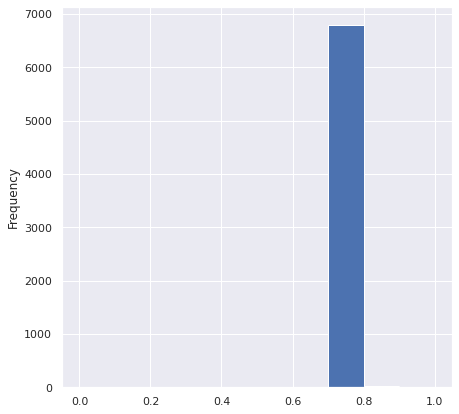

In [ ]:
datos['Pre-tax net Interest Rate'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Pre-tax net Interest Rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a 0.7973

0.797385863236893

In [ ]:
datos['Pre-tax net Interest Rate'].quantile(0.5) # indica que el 50% de las empresas presentan un valor menor o igual a 0.7974

0.7974636105782309

In [ ]:
datos['Pre-tax net Interest Rate'].quantile(0.75)  # indica que el % de las empresas presentan un valor menor o igual a 0.7975

0.7975788481855891

In [ ]:
datos['Pre-tax net Interest Rate'].min()   # el valor mínimo de la caracteristica corresponde a cero

0.0

In [ ]:
datos['Pre-tax net Interest Rate'].max()  # el valor más alto que se presenta en la caracteristica corresponde a 1

1.0

In [ ]:
datos['Pre-tax net Interest Rate'].mode()  # el valor que más se repite en la Pre-tax net Interest rate corresponde a 0.797381

0    0.797381
dtype: float64

In [ ]:
datos['Pre-tax net Interest Rate'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.7974

0.7974636105782309

In [ ]:
datos['Pre-tax net Interest Rate'].mean()   # el valor promedio de la caracteristica corresponde a 0.797189

0.7971897524712886

In [ ]:
datos['Pre-tax net Interest Rate'].std()   # los valores se alejan del promedio en un 0.0128

0.012868988419884656

9.Analisis Exploratorio de la Caracteristica **After-tax net Interest Rate**

La tasa de rendimiento real después de impuestos es el beneficio financiero real de una inversión después de contabilizar los efectos de la inflación y los impuestos.

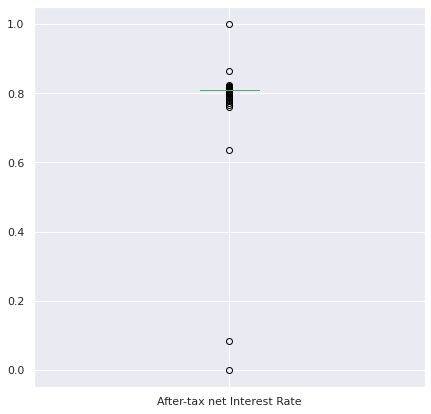

In [ ]:
datos['After-tax net Interest Rate'].plot(kind='box')  # se visualizan valores atíicos y el valor mínimo corrresponde a cero, la mediana corresponde a 0.8
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

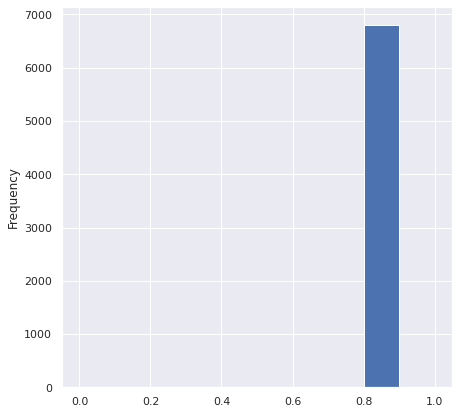

In [ ]:
datos['After-tax net Interest Rate'].plot(kind='hist')    # distribución negativa la mayoría de los datos se agrupan entre  0.8
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['After-tax net Interest Rate'].quantile(0.25)  # indica que el 25 % de las empresas presentan un valor menor o igual a  0.80931

0.809311597146491

In [ ]:
datos['After-tax net Interest Rate'].quantile(0.5)  # indica que el 50 % de las empresas presentan un valor menor o igual a  0.8093

0.809375198550956

In [ ]:
datos['After-tax net Interest Rate'].quantile(0.75)  # indica que el 75 % de las empresas presentan un valor menor o igual a  0.8094

0.8094692661348369

In [ ]:
datos['After-tax net Interest Rate'].min()  #  el valor más bajo es cero 

0.0

In [ ]:
datos['After-tax net Interest Rate'].max()  # el valor más alto corresponde a 1

1.0

In [ ]:
datos['After-tax net Interest Rate'].mode()  # presenta dos modas , los valores más repetidos corresponde a 0.809309 y 0.809378

0    0.809309
1    0.809378
dtype: float64

In [ ]:
datos['After-tax net Interest Rate'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.8093

0.809375198550956

In [ ]:
datos['After-tax net Interest Rate'].mean()  # el promedio de la caracteristica corresponde a 0.809083

0.8090835935135369

In [ ]:
datos['After-tax net Interest Rate'].std()  # los valores de la caracteristica After-tax net intereset rate se alejan del promedio en 0.01360

0.013600653945149041

10.Analisis Exploratorio de la Caracteristica **Non-industry income and expenditure/revenue**

Los ingresos no operativos son la parte de los ingresos de una organización que se derivan de actividades no relacionadas con sus operaciones comerciales principales.

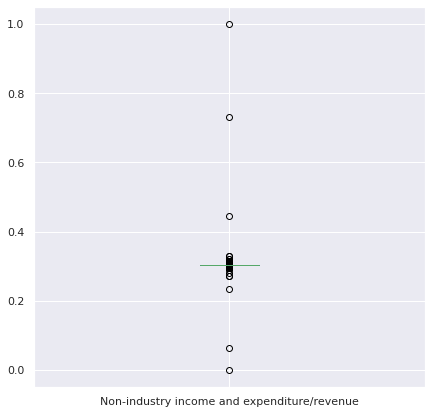

In [ ]:
datos['Non-industry income and expenditure/revenue'].plot(kind='box')   # el valor más bajo corresponde a cero, la mediana alrededor de  0.3 , y se observan valores atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

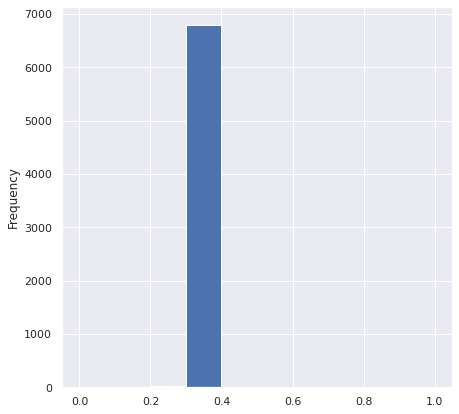

In [ ]:
datos['Non-industry income and expenditure/revenue'].plot(kind='hist')    # los valores se observan muy concentrados cercanamente a 0.4
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Non-industry income and expenditure/revenue'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.3034

0.30346627659685

In [ ]:
datos['Non-industry income and expenditure/revenue'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a 0.303525

0.303525492830123

In [ ]:
datos['Non-industry income and expenditure/revenue'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a 0.303585

0.303585192461218

In [ ]:
datos['Non-industry income and expenditure/revenue'].min()  # el valor mínimo corresponde a cero 

0.0

In [ ]:
datos['Non-industry income and expenditure/revenue'].max()  # el valor más alto que presenta la caracteristica es de 1

1.0

In [ ]:
datos['Non-industry income and expenditure/revenue'].mode()  # presenta varias modas, los valores que más se repiten son 0.303517, 0.303526, 0.303528

0    0.303517
1    0.303526
2    0.303528
dtype: float64

In [ ]:
datos['Non-industry income and expenditure/revenue'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.303525

0.303525492830123

In [ ]:
datos['Non-industry income and expenditure/revenue'].mean()  # el promedio de la caracteristoca corresponde a 0.3036

0.30362292364973476

In [ ]:
datos['Non-industry income and expenditure/revenue'].std()  # los valores de la caracteristica correspode a 0.01116

0.011163439838128557

11.Analisis Exploratorio de la Caracteristica **Continuous interest rate (after tax)**

El interés continuo ocurre cuando el interés se carga continuamente (y se agrega constantemente al capital).

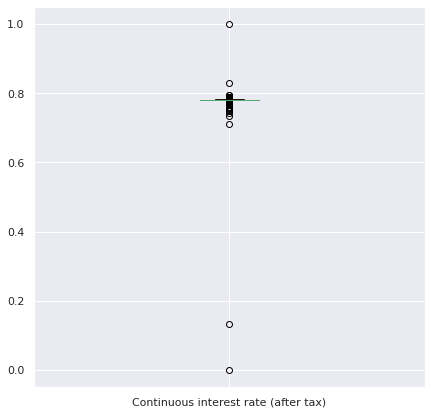

In [ ]:
datos['Continuous interest rate (after tax)'].plot(kind='box')   # la mediana aparece alrededor de 0.78  ,presencia de valores atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

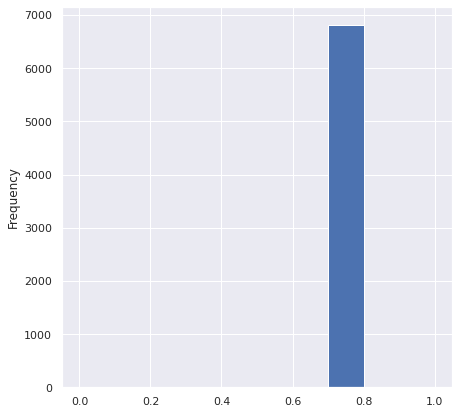

In [ ]:
datos['Continuous interest rate (after tax)'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Continuous interest rate (after tax)'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0.78156

0.7815668165898519

In [ ]:
datos['Continuous interest rate (after tax)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.7816

0.7816349571128741

In [ ]:
datos['Continuous interest rate (after tax)'].quantile(0.75) # indica que el 75% de las empresas presentan un valor menor o igual a 0.78173

0.7817353784192015

In [ ]:
datos['Continuous interest rate (after tax)'].min()  # el valor mínimo de la caracteristica corresponde a cero 0

0.0

In [ ]:
datos['Continuous interest rate (after tax)'].max() # el valor más alto de la caracteristica corresponde a uno 

1.0

In [ ]:
datos['Continuous interest rate (after tax)'].mode()  # el valor que más se repite es 0.781683

0    0.781683
dtype: float64

In [ ]:
datos['Continuous interest rate (after tax)'].median() # la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.78163

0.7816349571128741

In [ ]:
datos['Continuous interest rate (after tax)'].mean() # el promedio de la caracteristica continuous interest corresponde a 0.78138

0.7813814325261426

In [ ]:
datos['Continuous interest rate (after tax)'].std()  # los valores se alejan del promedio en 0.0126

0.012679004028913216

12.Analisis Exploratorio de la Caracteristica **Operating Expense Rate**

muestra la eficiencia de la gestión de una empresa comparando el gasto operativo total (OPEX) de una empresa con las ventas netas. El índice operativo muestra qué tan eficiente es la administración de una empresa para mantener bajos los costos mientras genera ingresos o ventas.

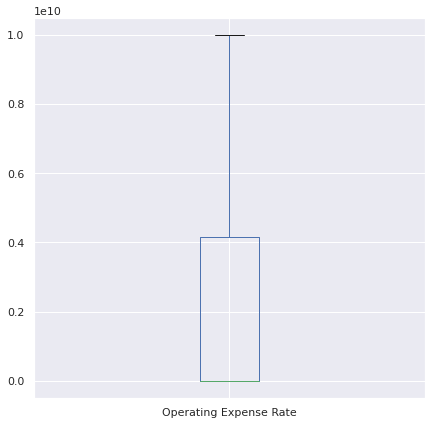

In [ ]:
datos['Operating Expense Rate'].plot(kind='box')  # no se observan valores atípicos, el valor más bajo corresponde a cero
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

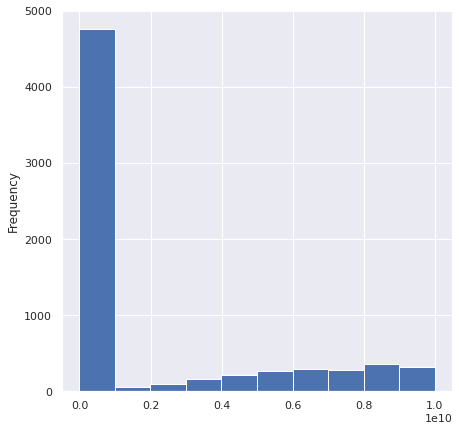

In [ ]:
datos['Operating Expense Rate'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})                         # distribucion hacia la izquierda , del tipo positiva
plt.show()

In [ ]:
datos['Operating Expense Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0.000156

0.000156687449242806

In [ ]:
datos['Operating Expense Rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a 0.000277

0.000277758858362525

In [ ]:
datos['Operating Expense Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  414500000

4145000000.0

In [ ]:
datos['Operating Expense Rate'].min()    # el valor mínimo correspone a 0

0.0

In [ ]:
datos['Operating Expense Rate'].max()  # el valor maximo corresponde a 990000000

9990000000.0

In [ ]:
datos['Operating Expense Rate'].mode()   # caractersitica que presenta multimodas     1.7160,  5.53, 9.86  los valores que más se repiten

0    1.716046e-04
1    5.530000e+09
2    9.860000e+09
dtype: float64

In [ ]:
datos['Operating Expense Rate'].median()   # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.000277

0.000277758858362525

In [ ]:
datos['Operating Expense Rate'].mean()    # el valor promedio de la caracteristica correspone a 1995347312

1995347312.8027918

In [ ]:
datos['Operating Expense Rate'].std()    # la desviacion indica que los valores se alejan del promedio en 3237683890

3237683890.522487

13.Analisis Exploratorio de la Caracteristica **Research and development expense rate**

La Research and development expense rate mide la relación entre la capitalización de mercado de una empresa y sus gastos de investigación y desarrollo.

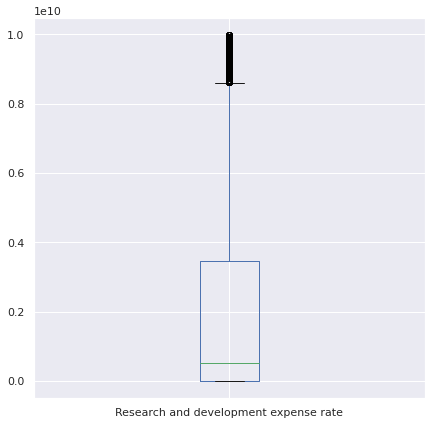

In [ ]:
datos['Research and development expense rate'].plot(kind='box')     # se observan valores atípicos , el valor mínimo corresponde a cero
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

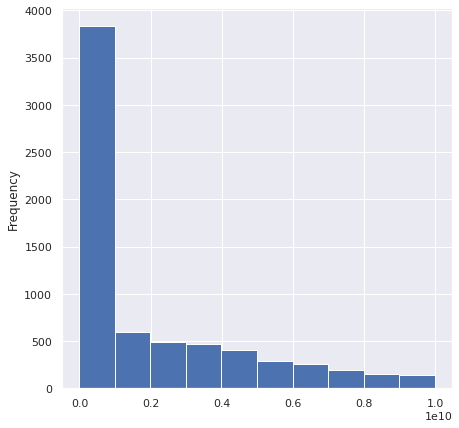

In [ ]:
datos['Research and development expense rate'].plot(kind='hist')    # distribución hacia la izquierda , del tipo positiva
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Research and development expense rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.000128

0.000128187953762011

In [ ]:
datos['Research and development expense rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a 509000000

509000000.0

In [ ]:
datos['Research and development expense rate'].quantile(0.75) # indica que el 75% de las empresas presentan un valor menor o igual a 3450000000

3450000000.0

In [ ]:
datos['Research and development expense rate'].min()  # el valor mínimo corresponde a cero

0.0

In [ ]:
datos['Research and development expense rate'].max()  # el valor máximo corresponde a 9980000000

9980000000.0

In [ ]:
datos['Research and development expense rate'].mode() # el valor que más se repite corresponde a cero 0

0    0.0
dtype: float64

In [ ]:
datos['Research and development expense rate'].median() # la medina indica que el 50% de las empresas presentan un valor menor o igual a 509000000

509000000.0

In [ ]:
datos['Research and development expense rate'].mean()  # el valor promedio de la caracteristica es de 1950427306

1950427306.056799

In [ ]:
datos['Research and development expense rate'].std()  # los valores se alejan del promedio en 2598291553

2598291553.9983416

14.Analisis Exploratorio de la Caracteristica **Cash flow rate**

la tasa de crecimiento a largo plazo del efectivo operativo, el dinero que realmente ingresa a las cuentas de la compañía producto de las operaciones comerciales, la IRR corresponde es una tasa de descuento que hace que el valor actual neto (VAN) de todos los flujos de efectivo sea igual a cero en un análisis de flujo de efectivo descontado.

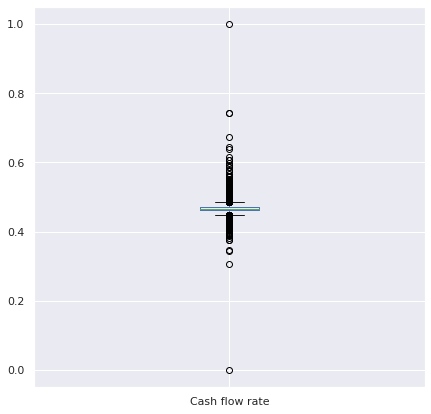

In [ ]:
datos['Cash flow rate'].plot(kind='box')    # se observan valores atípicos , la mediana se encuentra alrededor de 0.45
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

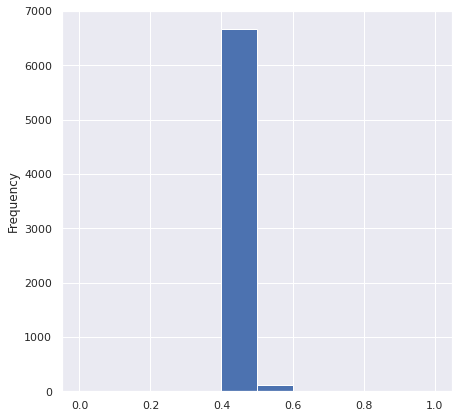

In [ ]:
datos['Cash flow rate'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash flow rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.46155

0.46155775311810643

In [ ]:
datos['Cash flow rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a 0.4650

0.465079724549793

In [ ]:
datos['Cash flow rate'].quantile(0.75) # indica que el 75% de las empresas presentan un valor menor o igual a  0.4710

0.471003917029432

In [ ]:
datos['Cash flow rate'].min()  # el valor más bajo corresponde a cero 

0.0

In [ ]:
datos['Cash flow rate'].max()  # el valor más alto correpsonde a 1 

1.0

In [ ]:
datos['Cash flow rate'].mode()   # tiene varias modas, los valores que más se repiten son,   0.460621, 0.460970, 0.464373

0    0.460621
1    0.460970
2    0.464373
dtype: float64

In [ ]:
datos['Cash flow rate'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.465079

0.465079724549793

In [ ]:
datos['Cash flow rate'].mean()  # el valor promeido de la caracteristica cash flow rate es de 0.467431

0.46743118577966175

In [ ]:
datos['Cash flow rate'].std()   # los valores se alejan del promedio en 0.01703

0.01703551730878539

15.Analisis Exploratorio de la Caracteristica **Interest-bearing debt interest rate**

Los gastos por intereses comerciales se refieren al costo de los intereses que se cargan a una empresa en función de las deudas que ha acumulado. En algunos casos, ese interés puede ser deducible de impuestos, siempre que el dinero se haya utilizado para comprar un activo relacionado específicamente con el negocio.

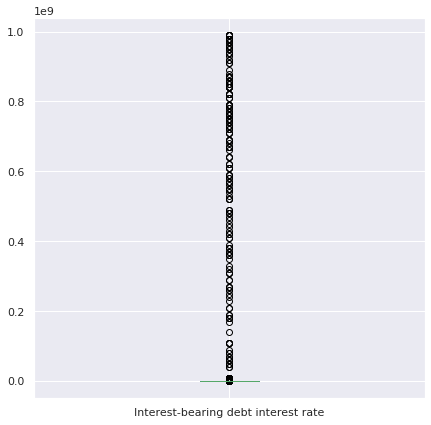

In [ ]:
datos['Interest-bearing debt interest rate'].plot(kind='box')    # se observa presencia de valores atípicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

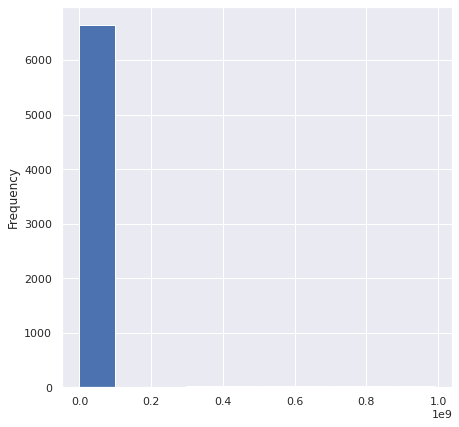

In [ ]:
datos['Interest-bearing debt interest rate'].plot(kind='hist')    # la mayoría de los valores se concentran de forma cercana a cero
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Interest-bearing debt interest rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.00020302

0.000203020302030203

In [ ]:
datos['Interest-bearing debt interest rate'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.00032103

0.000321032103210321

In [ ]:
datos['Interest-bearing debt interest rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.000532

0.0005325532553255325

In [ ]:
datos['Interest-bearing debt interest rate'].min()  # el valor más bajo corresponde a cero

0.0

In [ ]:
datos['Interest-bearing debt interest rate'].max()  # el valor más alto corresponde a 990000000

990000000.0

In [ ]:
datos['Interest-bearing debt interest rate'].mode()  # el valor que más se repite corresponde a cero

0    0.0
dtype: float64

In [ ]:
datos['Interest-bearing debt interest rate'].median()  # la mediana indica que el % de las empresas presentan un valor menor o igual a   0.00032103

0.000321032103210321

In [ ]:
datos['Interest-bearing debt interest rate'].mean()  # el valor promedio de la caracteristica corresponde a 16448012

16448012.905942492

In [ ]:
datos['Interest-bearing debt interest rate'].std()   # una desviacion muy alta, lo que indica la presencia de atípicos muy notorios, 108275033 de STD
                                                    # indica que los  valores se pueden alejar del valor promedio en 108275033

108275033.5328233

16.Analisis Exploratorio de la Caracteristica  **Tax rate (A)**

La tasa impositiva es el porcentaje al que se grava a una persona física o jurídica.

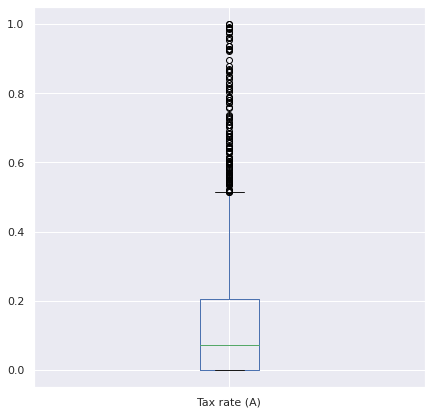

In [ ]:
datos['Tax rate (A)'].plot(kind='box')       # se muestra la presencia de valor atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

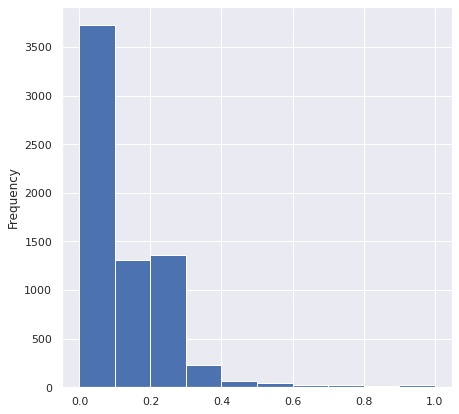

In [ ]:
datos['Tax rate (A)'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})         #distribucion con comportamiento positiva 
plt.show()

In [ ]:
datos['Tax rate (A)'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0

0.0

In [ ]:
datos['Tax rate (A)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.0734

0.0734892195566353

In [ ]:
datos['Tax rate (A)'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.20584

0.205840672132807

In [ ]:
datos['Tax rate (A)'].min()  # el valor más bajo de la caracteristica es de cero

0.0

In [ ]:
datos['Tax rate (A)'].max()  # el valor más alto de la caracteristica Tax rate (A)  corresponde a 1

1.0

In [ ]:
datos['Tax rate (A)'].mode()   # el valor qu más se repite corresponde a cero

0    0.0
dtype: float64

In [ ]:
datos['Tax rate (A)'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.073489

0.0734892195566353

In [ ]:
datos['Tax rate (A)'].mean()  # el vlaor promedio de lacaracteristica corresponde a 0.1150

0.11500074794142456

In [ ]:
datos['Tax rate (A)'].std()   # los valores se alejan del promedio en 0.13866

0.13866749672835404

17.Analisis Exploratorio de la Caracteristica **Net Value Per Share (B)**

El valor liquidativo por acción (NAVPS) se calcula dividiendo el valor liquidativo por el número de acciones en circulación.

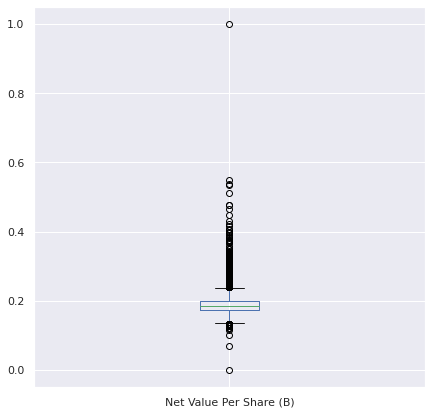

In [ ]:
datos['Net Value Per Share (B)'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})                    # se observa la presencia de valores atípicos
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

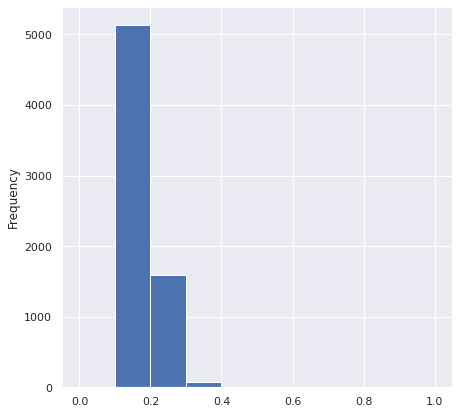

In [ ]:
datos['Net Value Per Share (B)'].plot(kind='hist')        # valores con distribuciòn del tipo positiva ,concentraciòn de los valores en cercanias a 0.2
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net Value Per Share (B)'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.1736

0.17361257426994198

In [ ]:
datos['Net Value Per Share (B)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1844

0.18440015170030802

In [ ]:
datos['Net Value Per Share (B)'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.1995

0.19957018246175898

In [ ]:
datos['Net Value Per Share (B)'].min()  # el valor más bajo corresponde a cero

0.0

In [ ]:
datos['Net Value Per Share (B)'].max()  # el valor más alto de la caracteristica es de 1

1.0

In [ ]:
datos['Net Value Per Share (B)'].mode()   # el valor que más se repite corrsponde a 0.176984

0    0.176984
dtype: float64

In [ ]:
datos['Net Value Per Share (B)'].median()   # la mediana nos indica que el 50% de las empresas presentan un valor menor o igual a  0.1844

0.18440015170030802

In [ ]:
datos['Net Value Per Share (B)'].mean()   # el valor promedio de la caracteristica es de 0.19066

0.19066057949747367

In [ ]:
datos['Net Value Per Share (B)'].std()  # los valores se desvian del promedio en 0.033389

0.033389768351330965

18.Analisis Exploratorio de la Caracteristica **Net Value Per Share (A)**

El valor liquidativo por acción (NAVPS) se calcula dividiendo el valor liquidativo por el número de acciones en circulación.

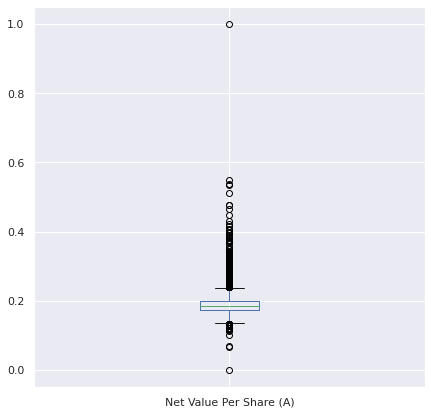

In [ ]:
datos['Net Value Per Share (A)'].plot(kind='box')     # se observan valores atípicos,  la mediana  se observa cercana a 0.2   
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

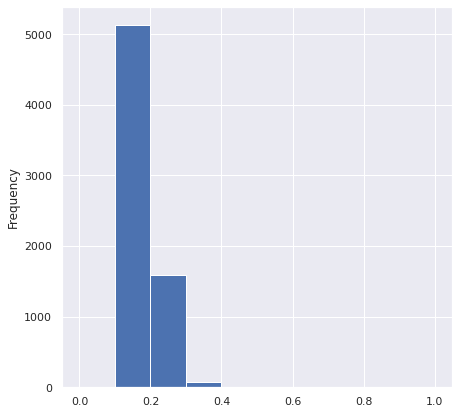

In [ ]:
datos['Net Value Per Share (A)'].plot(kind='hist')   #  se observan los valores concentrados en la cercanía a 0.2   , distribución del tipo positiva (izquierda)
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net Value Per Share (A)'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0.173

0.17361257426994198

In [ ]:
datos['Net Value Per Share (A)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1844

0.18440015170030802

In [ ]:
datos['Net Value Per Share (A)'].quantile(0.75)  # indica que el 75 % de las empresas presentan un valor menor o igual a 0.1995

0.19957018246175898

In [ ]:
datos['Net Value Per Share (A)'].min()  # el valor más bajo es de cero

0.0

In [ ]:
datos['Net Value Per Share (A)'].max()  # el valor más alto corresponde a 1

1.0

In [ ]:
datos['Net Value Per Share (A)'].mode()  # el valor que más se repite es 0.176984

0    0.176984
dtype: float64

In [ ]:
datos['Net Value Per Share (A)'].median() # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.1844

0.18440015170030802

In [ ]:
datos['Net Value Per Share (A)'].mean()   # el valor promedio de la caracteristica 0.1906

0.1906331789677462

In [ ]:
datos['Net Value Per Share (A)'].std()   # los valores se desvian del promedio en 0.0334

0.03347351417242891

19.Analisis Exploratorio de la Caracteristica **Net Value Per Share (C)**

El valor liquidativo por acción (NAVPS) se calcula dividiendo el valor liquidativo por el número de acciones en circulación.

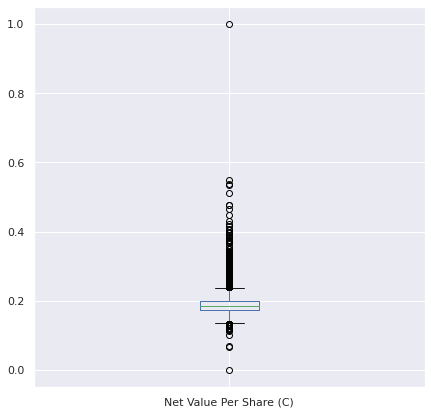

In [ ]:
datos['Net Value Per Share (C)'].plot(kind='box')   # se observan valores atípicos , la mediana cercana a 0.2 , el valor mínimo cero
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

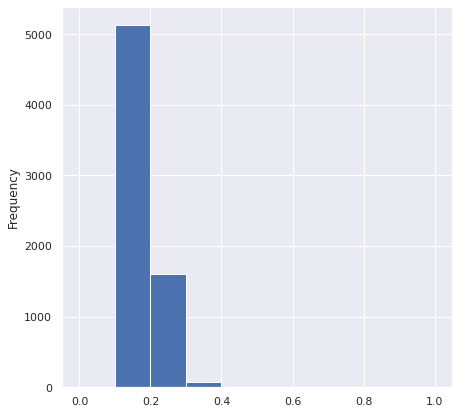

In [ ]:
datos['Net Value Per Share (C)'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net Value Per Share (C)'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.17367

0.1736757827314485

In [ ]:
datos['Net Value Per Share (C)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1844

0.18440015170030802

In [ ]:
datos['Net Value Per Share (C)'].quantile(0.75)  # indica que el 75 % de las empresas presentan un valor menor o igual a  0.1996

0.19961232143609603

In [ ]:
datos['Net Value Per Share (C)'].min()  # el valor más bajo es de 0 

0.0

In [ ]:
datos['Net Value Per Share (C)'].max()  # el valor más alto es de 1 

1.0

In [ ]:
datos['Net Value Per Share (C)'].mode()  # el valor que más se repite en 0.17684

0    0.176984
dtype: float64

In [ ]:
datos['Net Value Per Share (C)'].median()  # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a  0.184

0.18440015170030802

In [ ]:
datos['Net Value Per Share (C)'].mean()  # el valor promedio es de 0.19067

0.19067237025316164

In [ ]:
datos['Net Value Per Share (C)'].std()  # los valores de la caracteristica se desvian o se alejan del promedio en  0.0334

0.033480137670409124

20.Analisis Exploratorio de la Caracteristica **Persistent EPS in the Last Four Seasons**

Brinda la información del valor de las acciones en los ultimas 4 temporadas. Las ganancias por acción (EPS) se calculan como las ganancias de una empresa divididas por las acciones en circulación de sus acciones ordinarias.

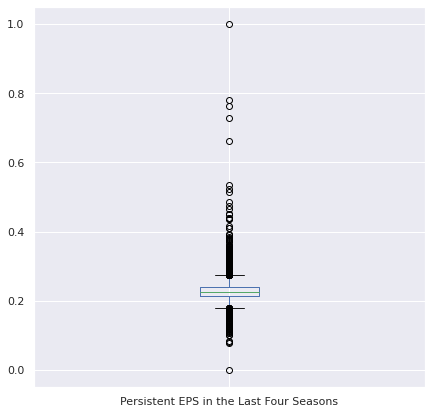

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].plot(kind='box')    # se bservan valores atípicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

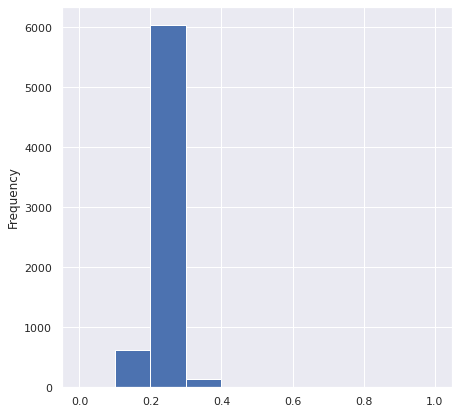

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].plot(kind='hist')     # concentración de los valores en cercanía  0.25
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.2147

0.21471116573697602

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.2245

0.22454382149948002

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.23882

0.2388200813085

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].min()  # el valor más bajo corresponde a 0

0.0

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].max()   # el valor más alto es de 1

1.0

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].mode()  # el valor que más se repite es 0.2149

0    0.2149
dtype: float64

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.2245

0.22454382149948002

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].mean()  # valor promedio de lacaracteristica corresponde a 0.22881

0.22881285256452713

In [ ]:
datos['Persistent EPS in the Last Four Seasons'].std()   # desviacion indica que los valores se alejan del promedio en 0.0332626

0.03326261307597681

21.Analisis Exploratorio de la Caracteristica **Cash Flow Per Share**

El flujo de efectivo por acción son las ganancias después de impuestos más la depreciación por acción que funciona como una medida de la solidez financiera de una empresa. Muchos analistas financieros ponen más énfasis en el flujo de caja por acción que en las ganancias por acción (EPS).

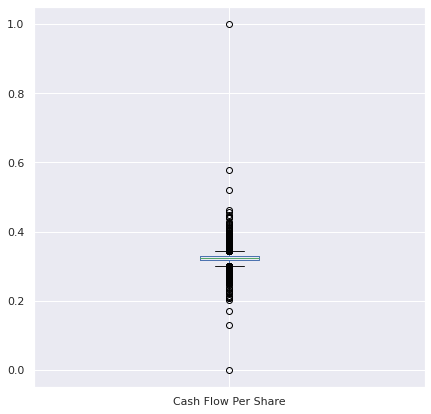

In [ ]:
datos['Cash Flow Per Share'].plot(kind='box')    # se observan calores atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

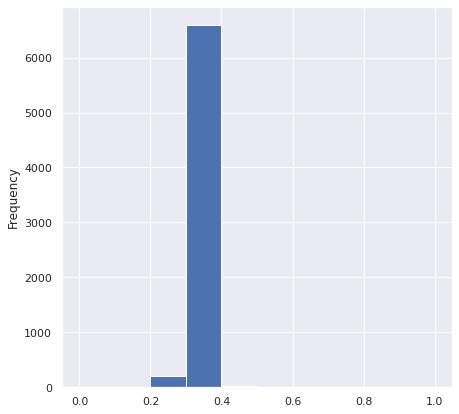

In [ ]:
datos['Cash Flow Per Share'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash Flow Per Share'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.31774

0.317747754120393

In [ ]:
datos['Cash Flow Per Share'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.3224

0.322487090613284

In [ ]:
datos['Cash Flow Per Share'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.328623

0.3286234703260945

In [ ]:
datos['Cash Flow Per Share'].min()   # el valor maa bajo es de cero

0.0

In [ ]:
datos['Cash Flow Per Share'].max()   # el valor más alto es de 1

1.0

In [ ]:
datos['Cash Flow Per Share'].mode()   # presenta varias modas , los valores que más que se repiten

0    0.319198
1    0.320506
2    0.322558
dtype: float64

In [ ]:
datos['Cash Flow Per Share'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.32248

0.322487090613284

In [ ]:
datos['Cash Flow Per Share'].mean()  # el promedio de la caracteristica de cash flow per share corresponde a 0.3234

0.32348191216983185

In [ ]:
datos['Cash Flow Per Share'].std()   # la desviacion indica que los valores se alejan del promedio en 0.0176

0.017610912958343786

22.Analisis Exploratorio de la Caracteristica **Revenue Per Share (Yuan ¥)**

Es un índice financiero, que divide las ganancias netas disponibles para los accionistas comunes por el promedio de acciones en circulación durante un cierto período de tiempo.

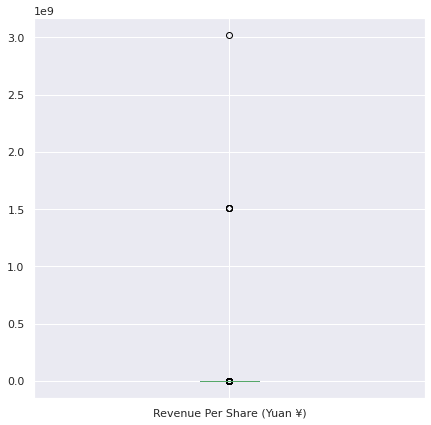

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].plot(kind='box')      # valores con atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

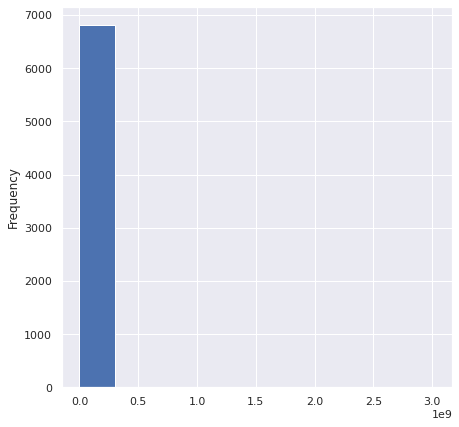

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.0156

0.01563138073415305

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.0273

0.0273757127516373

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.046

0.0463572152396509

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].min()  # el valor más bajo es cero

0.0

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].max()  # el valormás alto de 302000000

3020000000.0

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].mode()  # el valor que más se repite corresponde a  0.01776

0    0.017756
dtype: float64

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].median()  # lamediana indica que el % de las empresas presentan un valor menor o igual a  0.027375

0.0273757127516373

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].mean()     # el valor promedio de 1328640

1328640.6020960642

In [ ]:
datos['Revenue Per Share (Yuan ¥)'].std()   # los valores pueden alejarse del promedio en 51707089

51707089.76790668

23.Analisis Exploratorio de la Caracteristica **Operating Profit Per Share (Yuan ¥)**

Ganancias por acción ordinarias significa las ganancias netas consolidadas divididas por el número de acciones ordinarias en circulación al final del período de rendimiento.

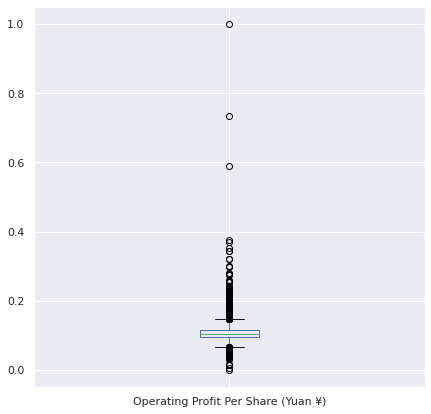

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

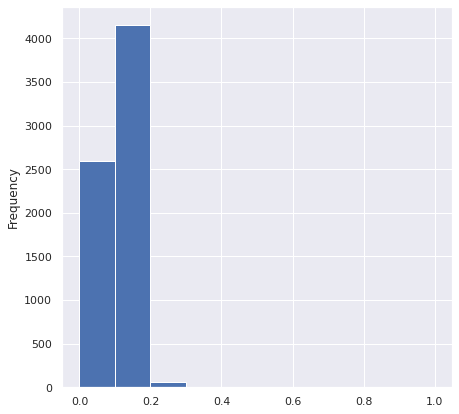

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a   0.096

0.0960833808321798

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.1042

0.104226040224737

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a 0.11615

0.1161550362348345

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].min()  # el valormás bajo es cero

0.0

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].max()  # el valormás alto corresponde a 1

1.0

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].mode()   # el valor que más se repite es 0.097

0    0.097142
dtype: float64

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].median()

0.104226040224737

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].mean()   # el promedio es de 0.1090

0.10909073887546941

In [ ]:
datos['Operating Profit Per Share (Yuan ¥)'].std()

0.027942244774416092

24.Analisis Exploratorio de la Caracteristica **Per Share Net profit before tax (Yuan ¥)**

las ganancias netas consolidadas divididas por el número de acciones ordinarias en circulación al final del período de rendimiento, antes de impuestos

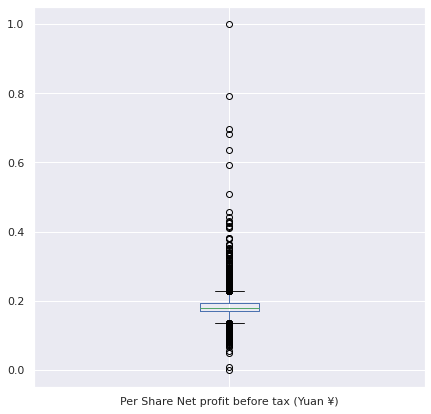

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].plot(kind='box')    # se observan valores atipicos, medina cercana a 0.2
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

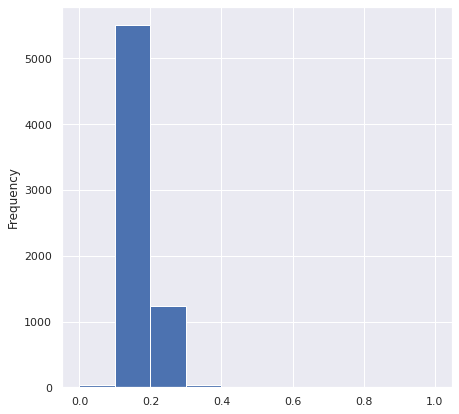

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].plot(kind='hist')       # valores concetrados cercanamente a 1.8 y 0.2
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a   0.17036

0.170369812457634

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].quantile(0.5)    # indica que el 50% de las empresas presentan un valor menor o igual a  0.179

0.179709271672818

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.193

0.193492505837162

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].min()   # el valor mínimo es de cero

0.0

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].max()  # el valor más alto es de 1

1.0

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].mode()  # el valor que más se repite es de 0.170144

0    0.170144
dtype: float64

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].median()

0.179709271672818

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].mean()  # el promedio es d e0.1843

0.1843605776420337

In [ ]:
datos['Per Share Net profit before tax (Yuan ¥)'].std()

0.03318020898090537

25.Analisis Exploratorio de la Caracteristica **Realized Sales Gross Profit Growth Rate**

El margen bruto representa la cantidad de ingresos por ventas totales que la empresa retiene después de incurrir en los costos directos (COGS).
Este indicador nos dirá el % de crecimiento del Sales Gross Profit

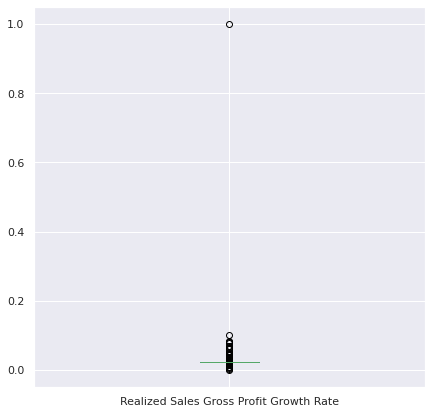

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].plot(kind='box')       # se observan valores atípicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

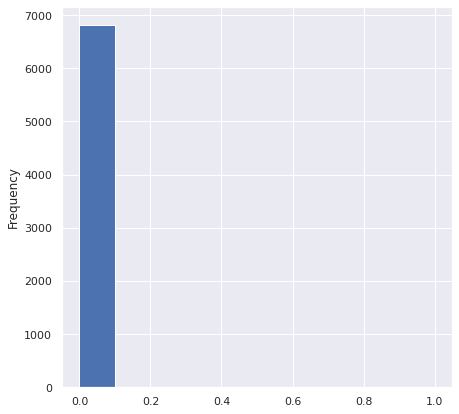

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.022064

0.022064532735505453

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.022102

0.0221023731764072

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.022153

0.022153148426612798

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].min()  # el valor más bajo corresponde a cero

0.0

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].max()  # el valor mas alto es de 1

1.0

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].mode()   # el valor más se repit corresponde a 0.022092

0    0.022092
dtype: float64

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.0221

0.0221023731764072

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].mean()

0.02240785447416586

In [ ]:
datos['Realized Sales Gross Profit Growth Rate'].std()

0.012079270152911575

26.Analisis Exploratorio de la Caracteristica **Operating Profit Growth Rate**

El crecimiento de la utilidad operativa muestra el aumento porcentual de la utilidad operativa durante el último año

Las tasas de crecimiento se refieren al cambio porcentual de una variable específica dentro de un período de tiempo específico.

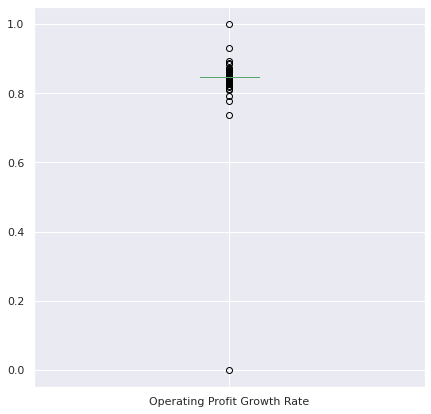

In [ ]:
datos['Operating Profit Growth Rate'].plot(kind='box')      # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

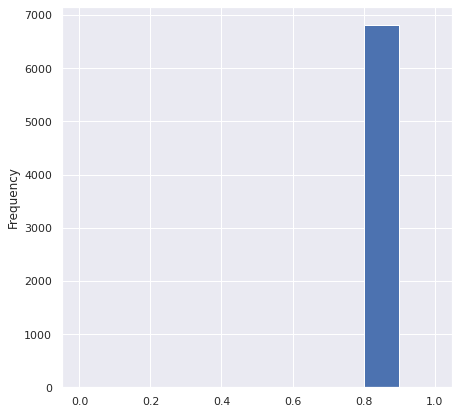

In [ ]:
datos['Operating Profit Growth Rate'].plot(kind='hist')        # se observa concetración de valores cercanamente a 0.83 y 0.9
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Operating Profit Growth Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.8479

0.8479841081819834

In [ ]:
datos['Operating Profit Growth Rate'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.84804

0.8480435337457679

In [ ]:
datos['Operating Profit Growth Rate'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.8481

0.8481225403945605

In [ ]:
datos['Operating Profit Growth Rate'].min()     # el valormínimo es de cero

0.0

In [ ]:
datos['Operating Profit Growth Rate'].max()   # el valor más alto corresponde a 1

1.0

In [ ]:
datos['Operating Profit Growth Rate'].mode()   # presenta varios valores que son los que más se repiten 

0    0.847957
1    0.847982
2    0.848005
3    0.848022
4    0.848045
5    0.848057
dtype: float64

In [ ]:
datos['Operating Profit Growth Rate'].median()

0.8480435337457679

In [ ]:
datos['Operating Profit Growth Rate'].mean()  # el promedio de los valores de la caracteristica es de 0.847979

0.8479799951688058

In [ ]:
datos['Operating Profit Growth Rate'].std()

0.01075247740540135

27.Analisis Exploratorio de la Caracteristica **After-tax Net Profit Growth Rate**

El crecimiento de la utilidad  muestra el aumento porcentual de la utililidad  durante el último año, despues de impuesto.
Las tasas de crecimiento se refieren al cambio porcentual de una variable específica dentro de un período de tiempo específico.

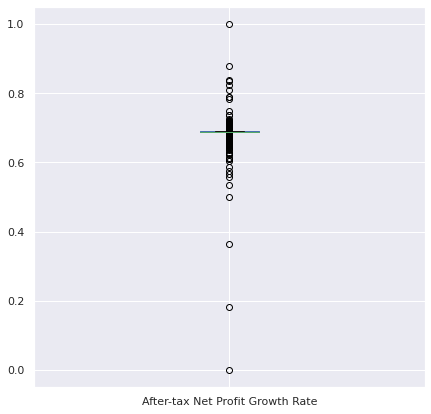

In [ ]:
datos['After-tax Net Profit Growth Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})                                              # se observan valors atipicos, median cercana a  0.68
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

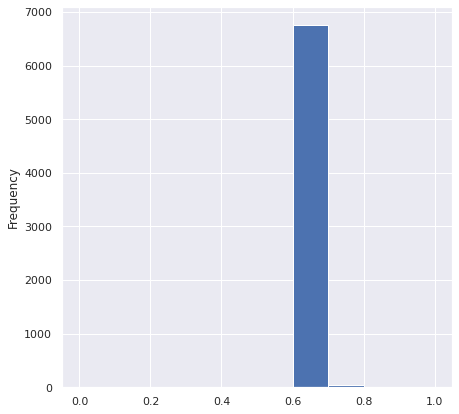

In [ ]:
datos['After-tax Net Profit Growth Rate'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['After-tax Net Profit Growth Rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.6892

0.6892699337448114

In [ ]:
datos['After-tax Net Profit Growth Rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.6896

0.689438526343149

In [ ]:
datos['After-tax Net Profit Growth Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.6896

0.6896471679790515

In [ ]:
datos['After-tax Net Profit Growth Rate'].min()   # el valor mínimo corresponde  a cero 0

0.0

In [ ]:
datos['After-tax Net Profit Growth Rate'].max()  # el valor más alto corresponde a 1

1.0

In [ ]:
datos['After-tax Net Profit Growth Rate'].mode()   # multimodal, presenta varios números que son los que más se repiten

0    0.689449
1    0.689525
2    0.689702
dtype: float64

In [ ]:
datos['After-tax Net Profit Growth Rate'].median()   # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.68943

0.689438526343149

In [ ]:
datos['After-tax Net Profit Growth Rate'].mean()   # el valor promedio de la caracteristica es de 0.6891

0.689146118568132

In [ ]:
datos['After-tax Net Profit Growth Rate'].std()

0.013853022260934765

28.Analisis Exploratorio de la Caracteristica **Regular Net Profit Growth Rate**

Expresado como porcentaje, el margen de beneficio neto muestra cuánto de cada dólar recaudado por una empresa como ingresos se traduce en beneficios, por lo  tanto el Net Profit Growth Rate, indica el porcentaje de crecimiento de este indicar de un periodo a otro.

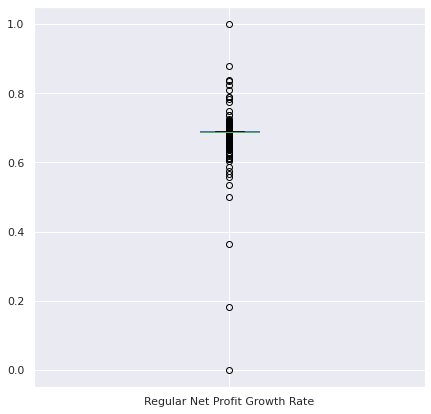

In [ ]:
datos['Regular Net Profit Growth Rate'].plot(kind='box')   # presencia de valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

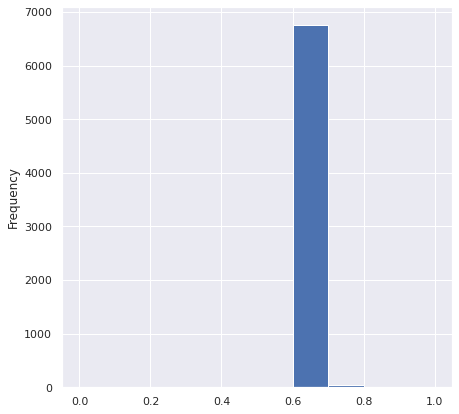

In [ ]:
datos['Regular Net Profit Growth Rate'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Regular Net Profit Growth Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.6892

0.6892702655632059

In [ ]:
datos['Regular Net Profit Growth Rate'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.6894

0.689438555196922

In [ ]:
datos['Regular Net Profit Growth Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a 0.68964

0.6896470092832976

In [ ]:
datos['Regular Net Profit Growth Rate'].min()   # el valor mìnimo corresponde a 0

0.0

In [ ]:
datos['Regular Net Profit Growth Rate'].max()  # el valor más alto es de 1

1.0

In [ ]:
datos['Regular Net Profit Growth Rate'].mode()   # el valor mas se repite corresponde a 0.689

0    0.689449
dtype: float64

In [ ]:
datos['Regular Net Profit Growth Rate'].median()

0.689438555196922

In [ ]:
datos['Regular Net Profit Growth Rate'].mean()

0.6891500117795625

In [ ]:
datos['Regular Net Profit Growth Rate'].std()

0.013910283414010596

29.Analisis Exploratorio de la Caracteristica **Continuous Net Profit Growth Rate**


Las tasas de crecimiento se refieren al cambio porcentual de una variable específica dentro de un período de tiempo específico, en este caso mide el mide el crecimiento de un periodo a otro de la utilidad neta. 

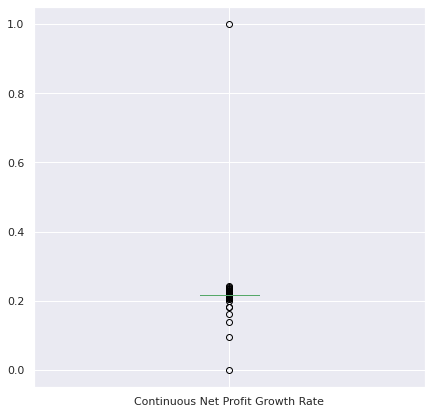

In [ ]:
datos['Continuous Net Profit Growth Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

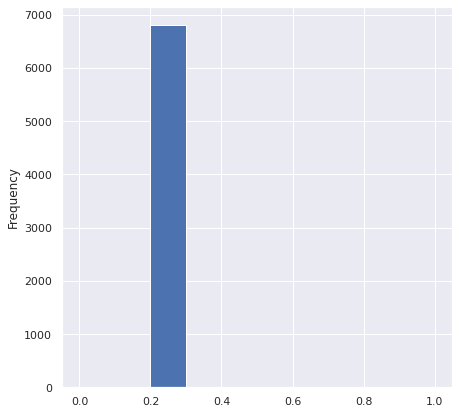

In [ ]:
datos['Continuous Net Profit Growth Rate'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Continuous Net Profit Growth Rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.2175

0.2175795122117655

In [ ]:
datos['Continuous Net Profit Growth Rate'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a   0.217598

0.21759804696196303

In [ ]:
datos['Continuous Net Profit Growth Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.217621

0.217621501194243

In [ ]:
datos['Continuous Net Profit Growth Rate'].min()   # el valor más bajo es cero

0.0

In [ ]:
datos['Continuous Net Profit Growth Rate'].max()   # el valor más alto es de 1

1.0

In [ ]:
datos['Continuous Net Profit Growth Rate'].mode()   # el valor que más se repite es 0.2175

0    0.21758
dtype: float64

In [ ]:
datos['Continuous Net Profit Growth Rate'].median()   # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.21759

0.21759804696196303

In [ ]:
datos['Continuous Net Profit Growth Rate'].mean()

0.2176390129969667

In [ ]:
datos['Continuous Net Profit Growth Rate'].std()

0.010062963146116098

30.Analisis Exploratorio de la Caracteristica **Total Asset Growth Rate**

La tasa de crecimiento de activos muestra la rapidez con la que una empresa ha aumentado sus activos. Se calcula como un cambio porcentual en los activos durante un período determinado.

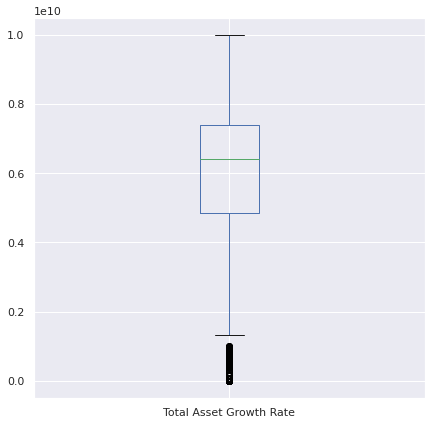

In [ ]:
datos['Total Asset Growth Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})                               # se observan valores atipicos , la mediana se observa cercana a 640000000
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

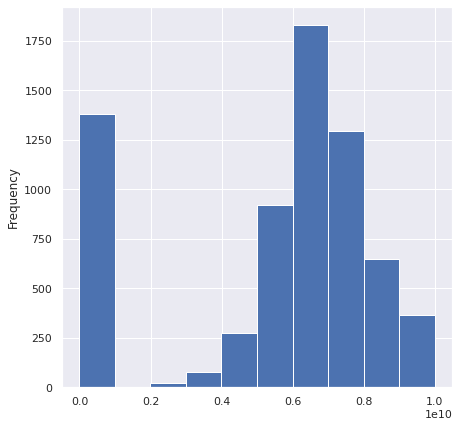

In [ ]:
datos['Total Asset Growth Rate'].plot(kind='hist')   # se observa una distribución multimodal
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Total Asset Growth Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  4860000000

4860000000.0

In [ ]:
datos['Total Asset Growth Rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  6400000000

6400000000.0

In [ ]:
datos['Total Asset Growth Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  7390000000

7390000000.0

In [ ]:
datos['Total Asset Growth Rate'].min()   # el valor más bajo corresponde a 0

0.0

In [ ]:
datos['Total Asset Growth Rate'].max()  # el valor más alto corresponde a 9990000000

9990000000.0

In [ ]:
datos['Total Asset Growth Rate'].mode()    # presenta dos modas

0    6.370000e+09
1    6.400000e+09
dtype: float64

In [ ]:
datos['Total Asset Growth Rate'].median()   # la mediana  indica que el 50 % de las empresas presentan un valor menor o igual a  6400000000

6400000000.0

In [ ]:
datos['Total Asset Growth Rate'].mean()   # el promedio de la caracteristica corresponde a 550809659

5508096595.248731

In [ ]:
datos['Total Asset Growth Rate'].std()   # se desvia del promedio en   2897717771

2897717771.1697345

31.Analisis Exploratorio de la Caracteristica **Net Value Growth Rate**

La tasa de crecimiento del Valor Neto. el NET VALUE se puede interpretar como, El valor actual neto (VAN) es la diferencia entre el valor presente de las entradas de efectivo y el valor presente de las salidas de efectivo durante un período de tiempo. El VPN se utiliza en el presupuesto de capital y la planificación de inversiones para analizar la rentabilidad de una inversión o proyecto proyectado.

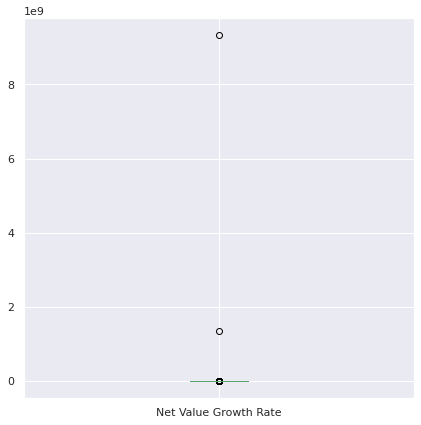

In [ ]:
datos['Net Value Growth Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

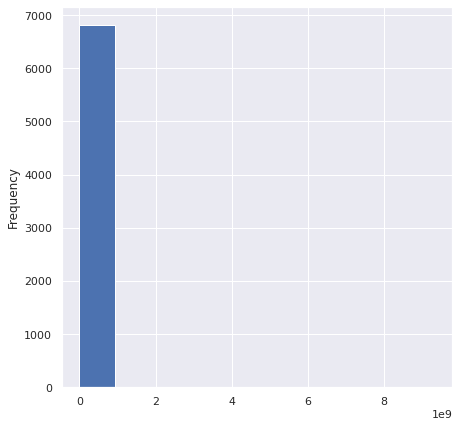

In [ ]:
datos['Net Value Growth Rate'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net Value Growth Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.0004409

0.000440968886826437

In [ ]:
datos['Net Value Growth Rate'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.000461

0.000461955522207628

In [ ]:
datos['Net Value Growth Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.0004993

0.000499362141038075

In [ ]:
datos['Net Value Growth Rate'].min()   # el valorminimo corresponde a cero 

0.0

In [ ]:
datos['Net Value Growth Rate'].max()   # el valor maximo o mas alto coresponde a 9330000000

9330000000.0

In [ ]:
datos['Net Value Growth Rate'].mode()  # presenta dos valores como la moda , que se repiden varias veces , 

0    0.000445
1    0.000449
dtype: float64

In [ ]:
datos['Net Value Growth Rate'].median()   # la mediana indica que el  50 % de las empresas presentan un valor menor o igual a  0.0004619

0.000461955522207628

In [ ]:
datos['Net Value Growth Rate'].mean()

1566212.0552410616

In [ ]:
datos['Net Value Growth Rate'].std()

114159389.51833564

32.Analisis Exploratorio de la Caracteristica **Total Asset Return Growth Rate Ratio**

Presenta la tasa de crecimiento del Asset Return, y el Asset Return es una relación que mide las ganancias de una empresa antes de intereses e impuestos (EBIT) en relación con sus activos netos totales. Se define como la relación entre el ingreso neto y los activos promedio totales.

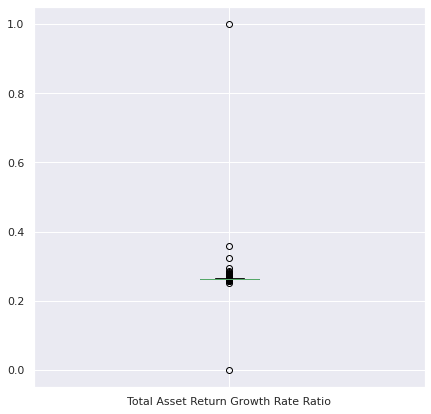

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

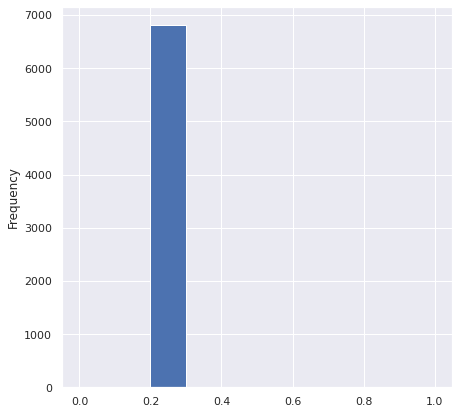

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].quantile(0.25)    # indica que el 25 % de las empresas presentan un valor menor o igual a  0.26375

0.263758926420651

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.26404

0.26404954503422895

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.2643

0.264388341065032

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].max()   # el valormás alto corresponde a 1

1.0

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].mode()  # presenta varias modas, multimodal

0    0.263910
1    0.263975
2    0.263994
3    0.264057
4    0.264097
5    0.264140
dtype: float64

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].median()   # la medana indica que el 50% de las empresas presentan un valor menor o igual a  0.2640

0.26404954503422895

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].mean()   # el valor promedio corresponde a 0.264247

0.2642475118758422

In [ ]:
datos['Total Asset Return Growth Rate Ratio'].std()   # los valores se alejan del promedio en 0.009634

0.009634208862611621

33.Analisis Exploratorio de la Caracteristica **Cash Reinvestment %**

Es un índice de valoración que se utiliza para medir el porcentaje del flujo de efectivo anual que la empresa invierte en el negocio como una nueva inversión. Esta relación permite a los analistas comprender el grado en que los ingresos netos se reinvierten en el negocio.

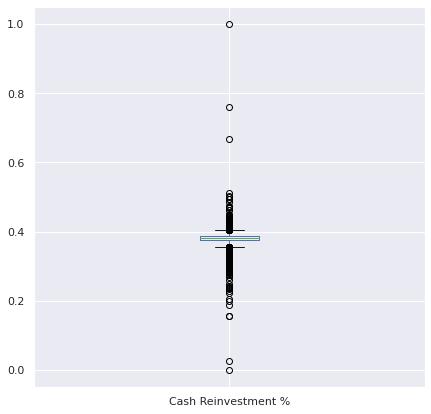

In [ ]:
datos['Cash Reinvestment %'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

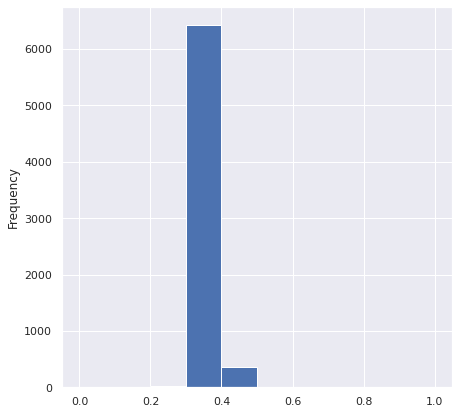

In [ ]:
datos['Cash Reinvestment %'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash Reinvestment %'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.3747

0.37474851905666695

In [ ]:
datos['Cash Reinvestment %'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.38042

0.380425468499683

In [ ]:
datos['Cash Reinvestment %'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.386

0.386731120301032

In [ ]:
datos['Cash Reinvestment %'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Cash Reinvestment %'].max()   # el valor maximo es de 1

1.0

In [ ]:
datos['Cash Reinvestment %'].mode()

0    0.375387
1    0.375889
dtype: float64

In [ ]:
datos['Cash Reinvestment %'].median()

0.380425468499683

In [ ]:
datos['Cash Reinvestment %'].mean()   # el valor promedio de 0.37967

0.37967667232266256

In [ ]:
datos['Cash Reinvestment %'].std()   # los valores se alejan del promedio en 0.0207

0.020736565809616768

34.Analisis Exploratorio de la Caracteristica **Current Ratio**

Es un índice de liquidez que mide la capacidad de una empresa para pagar obligaciones a corto plazo o las que vencen dentro de un año. Les dice a los inversores y analistas cómo una empresa puede maximizar los activos corrientes en su balance para satisfacer su deuda actual y otras cuentas por pagar.

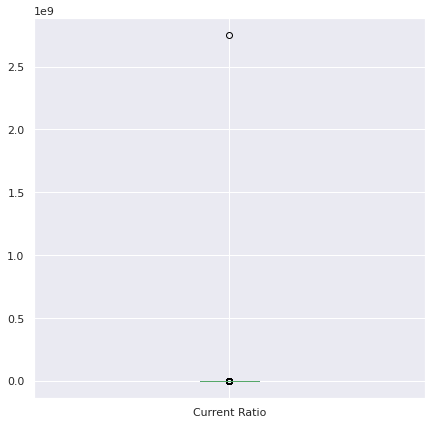

In [ ]:
datos['Current Ratio'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

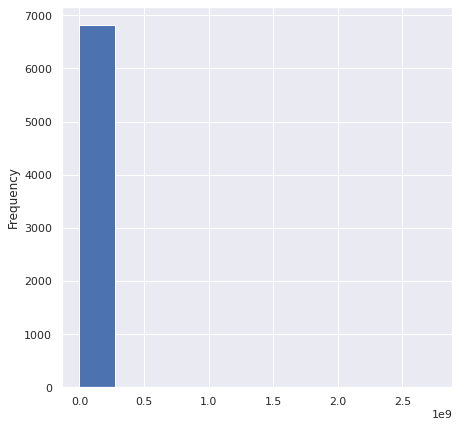

In [ ]:
datos['Current Ratio'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Ratio'].quantile(0.25)   # indica que el25 % de las empresas presentan un valor menor o igual a  0.0075

0.00755504663011972

In [ ]:
datos['Current Ratio'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.010

0.0105871744549939

In [ ]:
datos['Current Ratio'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.0162

0.0162695280201934

In [ ]:
datos['Current Ratio'].min()    # el valor minimo corresponde a cero

0.0

In [ ]:
datos['Current Ratio'].max()    # el valor maximo corresponde a 2750000000

2750000000.0

In [ ]:
datos['Current Ratio'].mode()   # multimodal, presenta muchas moas , valores que mas se repiten  

0    0.005888
1    0.006145
2    0.006916
3    0.007071
4    0.007139
5    0.009163
6    0.012144
7    0.013174
dtype: float64

In [ ]:
datos['Current Ratio'].median()

0.0105871744549939

In [ ]:
datos['Current Ratio'].mean()

403284.9542449723

In [ ]:
datos['Current Ratio'].std()

33302155.82548018

35.Analisis Exploratorio de la Caracteristica **Quick Ratio**

Mide la capacidad de una empresa para pagar sus pasivos corrientes sin necesidad de vender su inventario u obtener financiación adicional.

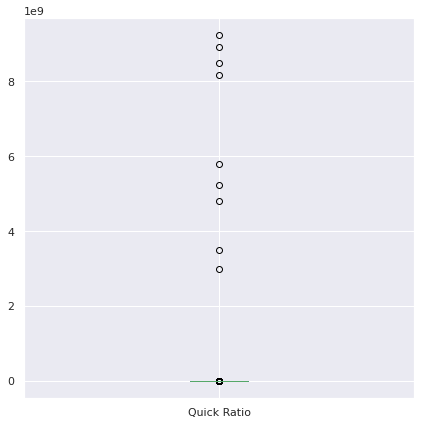

In [ ]:
datos['Quick Ratio'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

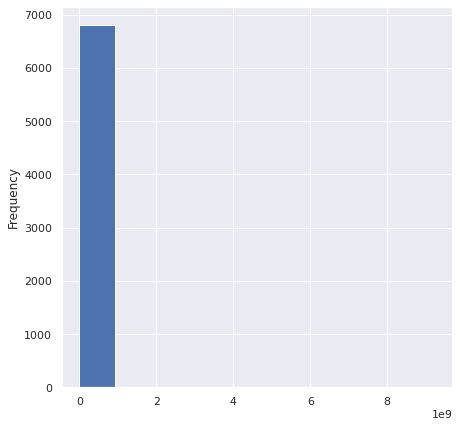

In [ ]:
datos['Quick Ratio'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Quick Ratio'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.00472

0.004725903227376115

In [ ]:
datos['Quick Ratio'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.0074

0.00741247206754445

In [ ]:
datos['Quick Ratio'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.01224

0.01224910697241505

In [ ]:
datos['Quick Ratio'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Quick Ratio'].max()   # el valor mas alto corresponde a 9230000000

9230000000.0

In [ ]:
datos['Quick Ratio'].mode()   # el valor que mas se repite corresponde a 0.005432

0    0.005432
dtype: float64

In [ ]:
datos['Quick Ratio'].median()

0.00741247206754445

In [ ]:
datos['Quick Ratio'].mean()   # el valor promedio de la caracteristica es de 8376594

8376594.819684908

In [ ]:
datos['Quick Ratio'].std()

244684748.4468722

36.Analisis Exploratorio de la Caracteristica **Interest Expense Ratio**

Se calcula dividiendo el gasto total por intereses de su negocio en todos los préstamos para un año fiscal o calendario por las ganancias antes de intereses, impuestos sobre la renta, depreciación o amortización (comúnmente conocido como EBITDA)

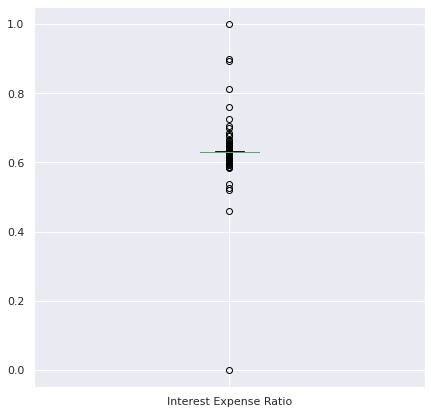

In [ ]:
datos['Interest Expense Ratio'].plot(kind='box')     # se observa la presencia de valores atipicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

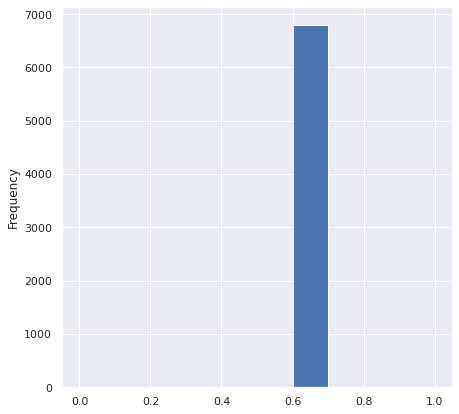

In [ ]:
datos['Interest Expense Ratio'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Interest Expense Ratio'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.6306

0.63061225188696

In [ ]:
datos['Interest Expense Ratio'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.63069

0.630698209613567

In [ ]:
datos['Interest Expense Ratio'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.6311

0.631125258558102

In [ ]:
datos['Interest Expense Ratio'].min()   # el valor mas bajo corresponde a 0

0.0

In [ ]:
datos['Interest Expense Ratio'].max()   # el valor mas alto corresponde a 1

1.0

In [ ]:
datos['Interest Expense Ratio'].mode()   # el valor que mas se repite corresponde a 0.6306

0    0.630612
dtype: float64

In [ ]:
datos['Interest Expense Ratio'].median()

0.630698209613567

In [ ]:
datos['Interest Expense Ratio'].mean()

0.6309910117124122

In [ ]:
datos['Interest Expense Ratio'].std()

0.01123846150405023

37.Analisis Exploratorio de la Caracteristica **Total debt/Total net worth**

Es una relación de apalancamiento que define la cantidad total de deuda en relación con los activos que posee una empresa. Con esta métrica, los analistas pueden comparar el apalancamiento de una empresa con el de otras empresas de la misma industria.

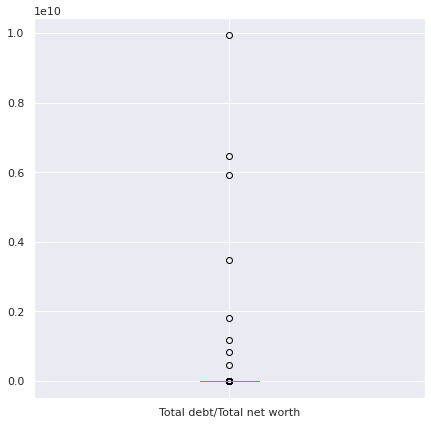

In [ ]:
datos['Total debt/Total net worth'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

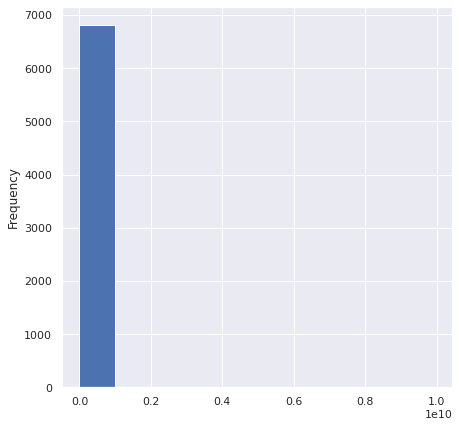

In [ ]:
datos['Total debt/Total net worth'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Total debt/Total net worth'].quantile(0.25)    # indica que el 25% de las empresas presentan un valor menor o igual a  0.003007

0.00300704912501482

In [ ]:
datos['Total debt/Total net worth'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.00554

0.00554628439070209

In [ ]:
datos['Total debt/Total net worth'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.0092

0.009273292661797026

In [ ]:
datos['Total debt/Total net worth'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Total debt/Total net worth'].max()   # el valor mas alto es de 9940000000

9940000000.0

In [ ]:
datos['Total debt/Total net worth'].mode()   # multimodal, variosnumeros que se repiten varias veces

0    0.001517
1    0.003187
2    0.003414
dtype: float64

In [ ]:
datos['Total debt/Total net worth'].median()   # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.005546

0.00554628439070209

In [ ]:
datos['Total debt/Total net worth'].mean()   # promedio es de 4416336

4416336.714259364

In [ ]:
datos['Total debt/Total net worth'].std()   # se aleja del promedio en 168406905

168406905.28151137

38.Analisis Exploratorio de la Caracteristica **Debt ratio %**

Es un índice financiero que mide el grado de apalancamiento de una empresa. La razón de la deuda se define como la razón entre la deuda total y los activos totales.

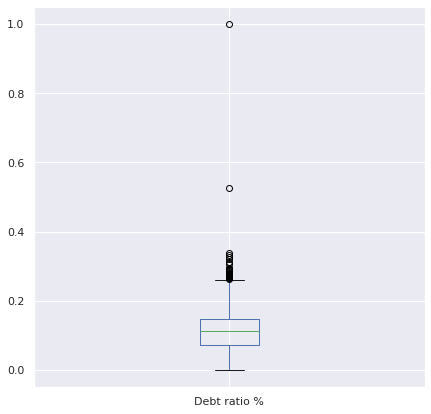

In [ ]:
datos['Debt ratio %'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

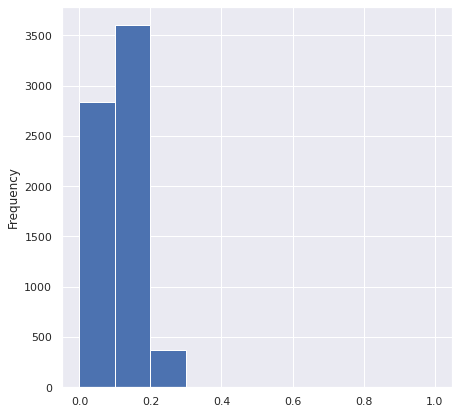

In [ ]:
datos['Debt ratio %'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Debt ratio %'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a   0.07289

0.0728905281615624

In [ ]:
datos['Debt ratio %'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1114

0.11140671765879599

In [ ]:
datos['Debt ratio %'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.1488

0.14880430510626702

In [ ]:
datos['Debt ratio %'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Debt ratio %'].max()  # el valor mas alto es 1

1.0

In [ ]:
datos['Debt ratio %'].mode()   # una distribución multimodal según este resultado tenemos 8 distintos valores que son los que más se repiten

0    0.089156
1    0.106721
2    0.112918
3    0.115458
4    0.119479
5    0.123409
6    0.128216
7    0.140158
dtype: float64

In [ ]:
datos['Debt ratio %'].median()

0.11140671765879599

In [ ]:
datos['Debt ratio %'].mean()

0.11317708497306005

In [ ]:
datos['Debt ratio %'].std()

0.053920306063082755

39.Analisis Exploratorio de la Caracteristica **Net worth/Assets**

El patrimonio neto es el valor de todos los activos, menos el total de todos los pasivos. Dicho de otra manera, el valor neto es lo que se posee menos lo que se debe

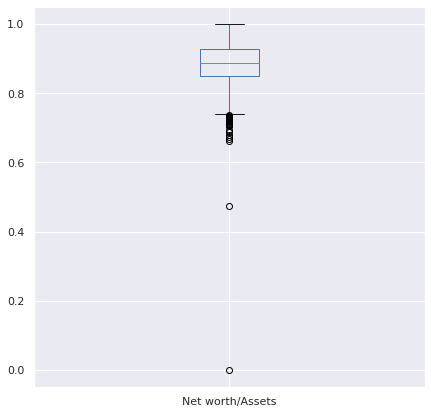

In [ ]:
datos['Net worth/Assets'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

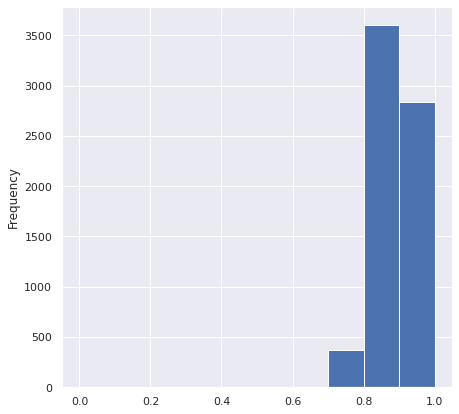

In [ ]:
datos['Net worth/Assets'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net worth/Assets'].quantile(0.25)  # indica que el 25 % de las empresas presentan un valor menor o igual a  0.85119

0.8511956948937329

In [ ]:
datos['Net worth/Assets'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.8885

0.8885932823412042

In [ ]:
datos['Net worth/Assets'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.9271

0.927109471838438

In [ ]:
datos['Net worth/Assets'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Net worth/Assets'].max()   # el valormas alto es de 1

1.0

In [ ]:
datos['Net worth/Assets'].mode()   # mulimodal 

0    0.859842
1    0.871784
2    0.876591
3    0.880521
4    0.884542
5    0.887082
6    0.893279
7    0.910844
dtype: float64

In [ ]:
datos['Net worth/Assets'].median()

0.8885932823412042

In [ ]:
datos['Net worth/Assets'].mean()

0.8868229150269425

In [ ]:
datos['Net worth/Assets'].std()

0.05392030606308272

40.Analisis Exploratorio de la Caracteristica **Long-term fund suitability ratio (A)**
Índice que indica el nivel optimo o idoneo de endeudamiento a largo plazo

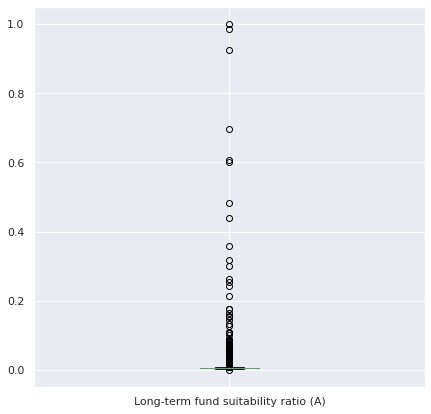

In [ ]:
datos['Long-term fund suitability ratio (A)'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

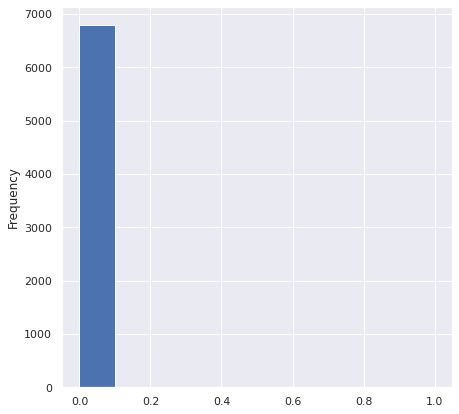

In [ ]:
datos['Long-term fund suitability ratio (A)'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Long-term fund suitability ratio (A)'].quantile(0.25)   # indica que el 25 % de las empresas presentan un valor menor o igual a  0.00524

0.005243683690608274

In [ ]:
datos['Long-term fund suitability ratio (A)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.00566

0.00566463611176392

In [ ]:
datos['Long-term fund suitability ratio (A)'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.00684

0.006847432465535919

In [ ]:
datos['Long-term fund suitability ratio (A)'].min()  # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Long-term fund suitability ratio (A)'].max()  # el valor maximo de la caracteristica es de 1

1.0

In [ ]:
datos['Long-term fund suitability ratio (A)'].mode()   # el valor que mas se repite corresponde a 0.004716

0    0.004716
dtype: float64

In [ ]:
datos['Long-term fund suitability ratio (A)'].median()

0.00566463611176392

In [ ]:
datos['Long-term fund suitability ratio (A)'].mean()

0.008782733815036815

In [ ]:
datos['Long-term fund suitability ratio (A)'].std()

0.02815292604929068

41.Analisis Exploratorio de la Caracteristica **Borrowing dependency**

Índice que determina el nivel de depencia de prestamos por parte de una compañía

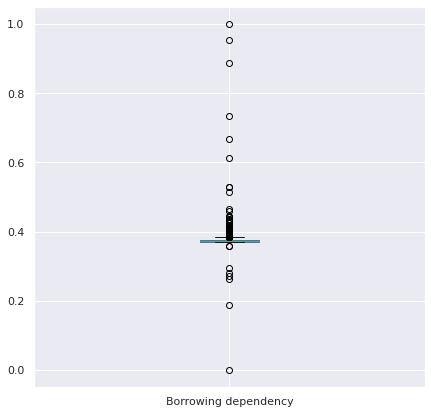

In [ ]:
datos['Borrowing dependency'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

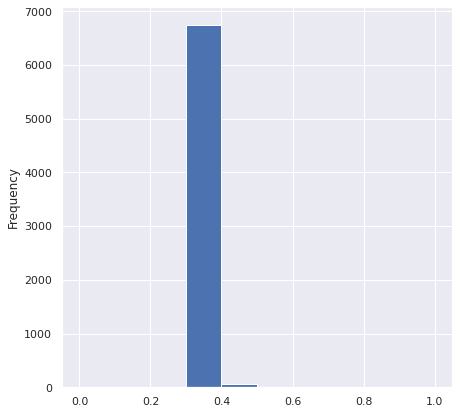

In [ ]:
datos['Borrowing dependency'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Borrowing dependency'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.37016

0.3701678435547765

In [ ]:
datos['Borrowing dependency'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a   0.372624

0.3726243225530829

In [ ]:
datos['Borrowing dependency'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.3762

0.3762707372009225

In [ ]:
datos['Borrowing dependency'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Borrowing dependency'].max()   # el valor mas alto corresponde a 1

1.0

In [ ]:
datos['Borrowing dependency'].mode()   # el valor que mas se repite coresponde a 0.369637

0    0.369637
dtype: float64

In [ ]:
datos['Borrowing dependency'].median()

0.3726243225530829

In [ ]:
datos['Borrowing dependency'].mean()   # el valor promedio corresponde a 0.3746

0.37465429459871874

In [ ]:
datos['Borrowing dependency'].std()   # los valores se alejan del promedio en 0.0162

0.016286163355500864

42.Analisis Exploratorio de la Caracteristica **Contingent liabilities/Net worth**

indicador del nivel que los Pasivos Contingentes representan del Patrimonio.
Los grandes pasivos contingentes podrían sugerir que los compromisos de capital de una empresa aumentarán significativamente y conducirán a un deterioro de la situación financiera.
Un pasivo contingente es un pasivo que puede ocurrir dependiendo del resultado de un evento futuro incierto.

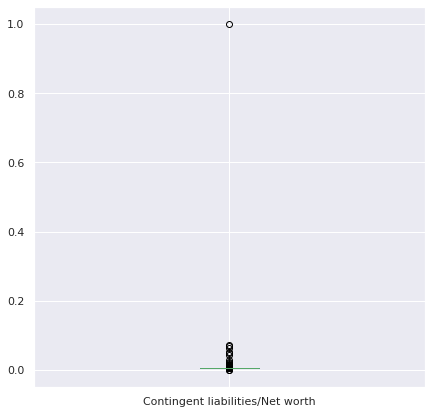

In [ ]:
datos['Contingent liabilities/Net worth'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

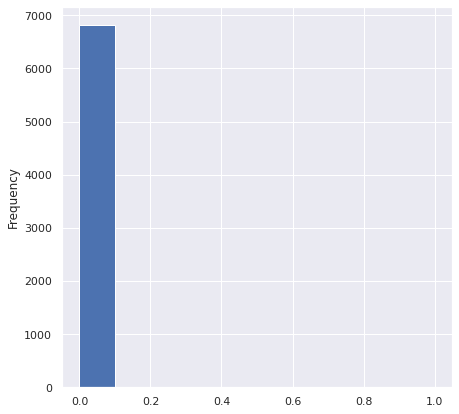

In [ ]:
datos['Contingent liabilities/Net worth'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Contingent liabilities/Net worth'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.005365847

0.00536584771375646

In [ ]:
datos['Contingent liabilities/Net worth'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a   0.00536584

0.00536584771375646

In [ ]:
datos['Contingent liabilities/Net worth'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.00576

0.00576435604952715

In [ ]:
datos['Contingent liabilities/Net worth'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Contingent liabilities/Net worth'].max()   # el valor mas alto corresponde a 1

1.0

In [ ]:
datos['Contingent liabilities/Net worth'].mode()   # el valor que mas se repite corresponde a 0.005366

0    0.005366
dtype: float64

In [ ]:
datos['Contingent liabilities/Net worth'].median()

0.00536584771375646

In [ ]:
datos['Contingent liabilities/Net worth'].mean()

0.005968277266479353

In [ ]:
datos['Contingent liabilities/Net worth'].std()   # los valores se alejan del promedio en 0.0121

0.012188361875858518

43.Analisis Exploratorio de la Caracteristica **Operating profit/Paid-in capital**

El capital pagado es la cantidad de capital "pagado" por los inversores durante la emisión de acciones ordinarias o preferentes, incluido el valor nominal de las acciones más los montos en exceso del valor nominal.

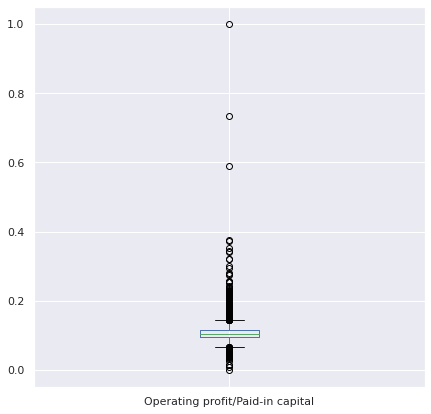

In [ ]:
datos['Operating profit/Paid-in capital'].plot(kind='box')     # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

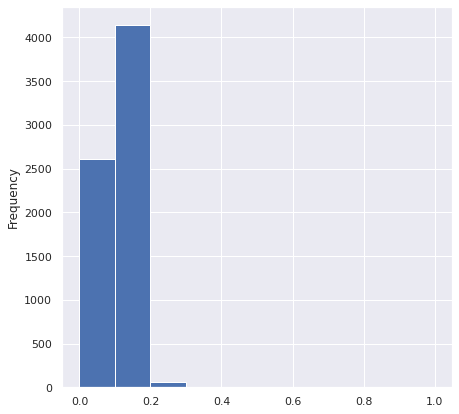

In [ ]:
datos['Operating profit/Paid-in capital'].plot(kind='hist')     # se observa una distribucion con inclinacion hacia la izquierda , tipo positiva
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Operating profit/Paid-in capital'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.096

0.0961046786197013

In [ ]:
datos['Operating profit/Paid-in capital'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1041

0.10413307929063499

In [ ]:
datos['Operating profit/Paid-in capital'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.1159

0.115927337274252

In [ ]:
datos['Operating profit/Paid-in capital'].min()

0.0

In [ ]:
datos['Operating profit/Paid-in capital'].max()

1.0

In [ ]:
datos['Operating profit/Paid-in capital'].mode()

0    0.097896
dtype: float64

In [ ]:
datos['Operating profit/Paid-in capital'].median()

0.10413307929063499

In [ ]:
datos['Operating profit/Paid-in capital'].mean()

0.10897668140338525

In [ ]:
datos['Operating profit/Paid-in capital'].std()

0.0277816859856405

44.Analisis Exploratorio de la Caracteristica **Net profit before tax/Paid-in capital**

Net profit before tax , La ganancia antes de impuestos (PBT) es una medida de la rentabilidad de una empresa que analiza las ganancias obtenidas antes de pagar cualquier impuesto.
El capital pagado, o capital aportado, es la cantidad total de efectivo u otros activos que los accionistas han dado a una empresa a cambio de acciones.

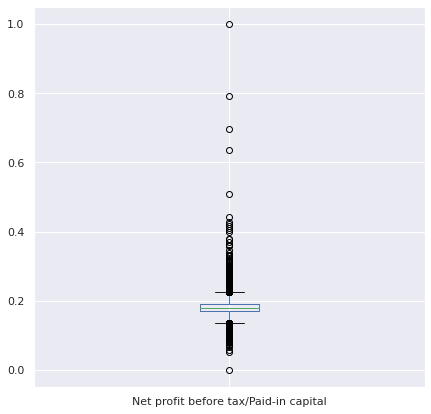

In [ ]:
datos['Net profit before tax/Paid-in capital'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

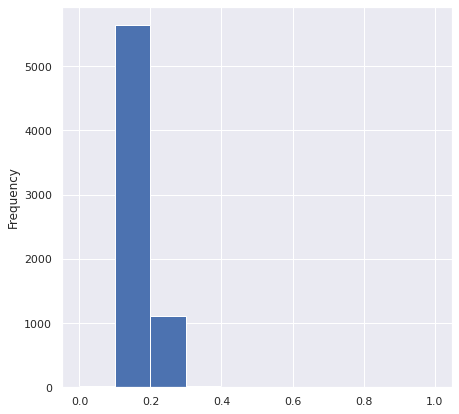

In [ ]:
datos['Net profit before tax/Paid-in capital'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net profit before tax/Paid-in capital'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.1693

0.16937636678983498

In [ ]:
datos['Net profit before tax/Paid-in capital'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.178

0.178455621747983

In [ ]:
datos['Net profit before tax/Paid-in capital'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.191

0.191606967800317

In [ ]:
datos['Net profit before tax/Paid-in capital'].min()  # el valor minimo es de 0

0.0

In [ ]:
datos['Net profit before tax/Paid-in capital'].max()  # el valor mas alto es de 1

1.0

In [ ]:
datos['Net profit before tax/Paid-in capital'].mode()   # el valor que mas se repite es 0.178

0    0.178441
dtype: float64

In [ ]:
datos['Net profit before tax/Paid-in capital'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.178

0.178455621747983

In [ ]:
datos['Net profit before tax/Paid-in capital'].mean()  # el promedio es de 0.1827

0.18271502907673617

In [ ]:
datos['Net profit before tax/Paid-in capital'].std()   # los valors se alejan del promedio 0.0307

0.03078477150830977

45.Analisis Exploratorio de la Caracteristica **Inventory and accounts receivable/Net value**

La valoración de los inventarios y cuentas por cobrar, al valor neto implica, el valor en términos de la cantidad que recibiría en el momento de la venta, menos los costos de venta.  Esta valoración se utiliza como un monto más real al valor de mercado que se puede obtener por la venta de un activo.

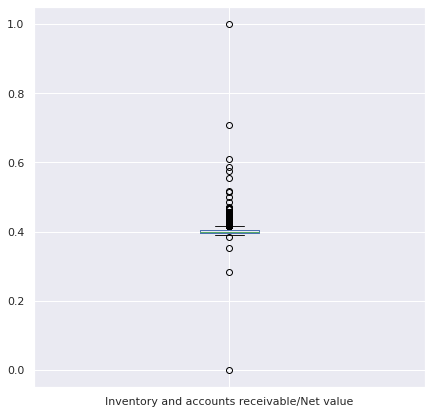

In [ ]:
datos['Inventory and accounts receivable/Net value'].plot(kind='box')    # se observan valores atipicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

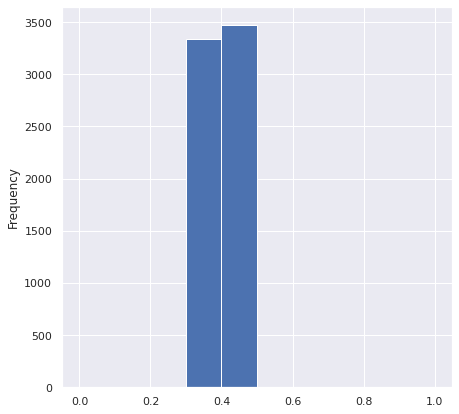

In [ ]:
datos['Inventory and accounts receivable/Net value'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Inventory and accounts receivable/Net value'].quantile(0.25)  # indica que el 25 % de las empresas presentan un valor menor o igual a  0.397

0.3974026791778925

In [ ]:
datos['Inventory and accounts receivable/Net value'].quantile(0.5) # indica que el 50% de las empresas presentan un valor menor o igual a  0.40013

0.40013102490143

In [ ]:
datos['Inventory and accounts receivable/Net value'].quantile(0.75) # indica que el 75% de las empresas presentan un valor menor o igual a 0.4045

0.40455077080958096

In [ ]:
datos['Inventory and accounts receivable/Net value'].min()  # el valor minimo corresponde a cero 

0.0

In [ ]:
datos['Inventory and accounts receivable/Net value'].max()   # el valor mas alto es 1

1.0

In [ ]:
datos['Inventory and accounts receivable/Net value'].mode()   # el valor que mas se repite corresponde a 0.393663

0    0.393663
dtype: float64

In [ ]:
datos['Inventory and accounts receivable/Net value'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.40013

0.40013102490143

In [ ]:
datos['Inventory and accounts receivable/Net value'].mean()  # el valor promedio es 0.4024

0.40245933052066785

In [ ]:
datos['Inventory and accounts receivable/Net value'].std()  # los valores se alejan en 0.013 del promedio

0.013324079587932258

46.Analisis Exploratorio de la Caracteristica **Total Asset Turnover**

Rotación de Activos totales: Mide el valor de las ventas o los ingresos de una empresa en relación con el valor de sus activos. El índice de rotación de activos se puede utilizar como indicador de la eficiencia con la que una empresa utiliza sus activos para generar ingresos.

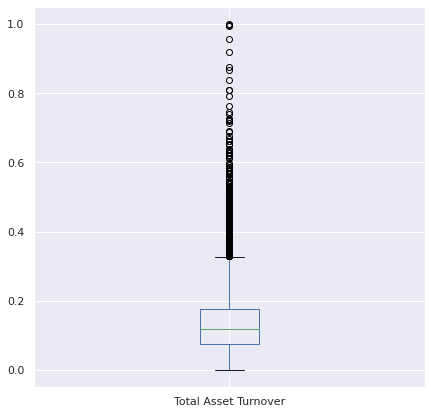

In [ ]:
datos['Total Asset Turnover'].plot(kind='box')    # se observa valores atipicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

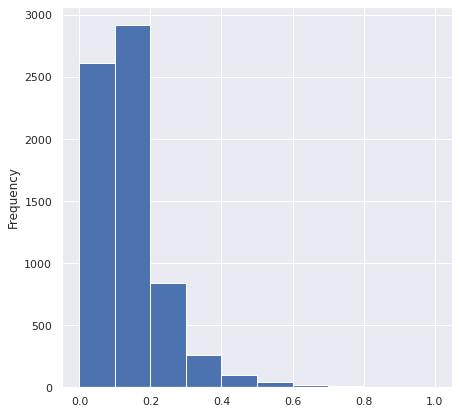

In [ ]:
datos['Total Asset Turnover'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})               # distribucion del tipo positiva 
plt.show()

In [ ]:
datos['Total Asset Turnover'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.076

0.0764617691154423

In [ ]:
datos['Total Asset Turnover'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a   0.1184

0.11844077961019502

In [ ]:
datos['Total Asset Turnover'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.176

0.17691154422788602

In [ ]:
datos['Total Asset Turnover'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Total Asset Turnover'].max()   # el valormaximo corresponde a 1

1.0

In [ ]:
datos['Total Asset Turnover'].mode()    # el valor que mas se repite es 0.07946

0    0.07946
dtype: float64

In [ ]:
datos['Total Asset Turnover'].median()   # el promedio de la caracteristica total asset turnover es 0.1184

0.11844077961019502

In [ ]:
datos['Total Asset Turnover'].std()   # indica la distancia que se alejan del promedio

0.10114496849292293

47.Analisis Exploratorio de la Caracteristica **Accounts Receivable Turnover**

La rotación de las cuentas por cobrar se describe como una proporción de las cuentas por cobrar promedio para un período dividido por las ventas netas a crédito para ese mismo período. Esta relación le da a la empresa una idea sólida de la eficiencia con la que recauda las deudas contraídas con el crédito que extendió, y un número menor muestra una mayor eficiencia.

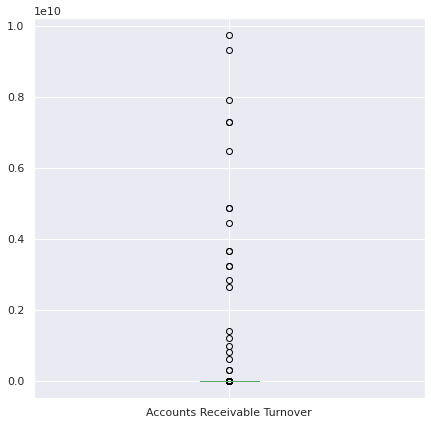

In [ ]:
datos['Accounts Receivable Turnover'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

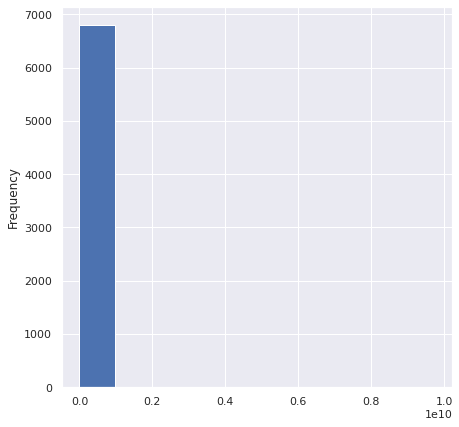

In [ ]:
datos['Accounts Receivable Turnover'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Accounts Receivable Turnover'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0.00071013

0.000710133606565692

In [ ]:
datos['Accounts Receivable Turnover'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.000967

0.000967810658090958

In [ ]:
datos['Accounts Receivable Turnover'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.00145

0.00145475941687886

In [ ]:
datos['Accounts Receivable Turnover'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Accounts Receivable Turnover'].max()   # el valor maximo corresponde a 9740000000

9740000000.0

In [ ]:
datos['Accounts Receivable Turnover'].mode()  #  multimodal presenta varios valores que se repiten mas

0    0.000712
1    0.000716
2    0.000808
dtype: float64

In [ ]:
datos['Accounts Receivable Turnover'].median()

0.000967810658090958

In [ ]:
datos['Accounts Receivable Turnover'].mean()

12789705.237553565

In [ ]:
datos['Accounts Receivable Turnover'].std()   # los valores se alejan del promedio  278259836

278259836.9840534

48.Analisis Exploratorio de la Caracteristica **Average Collection Days**

El período de cobranza promedio se calcula dividiendo el saldo promedio de las cuentas por cobrar por el total de ventas netas a crédito del período y multiplicando el cociente por el número de días del período.

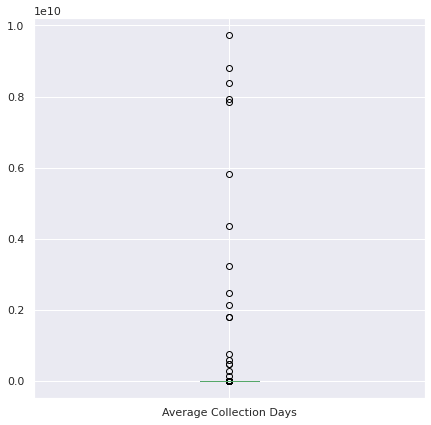

In [ ]:
datos['Average Collection Days'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

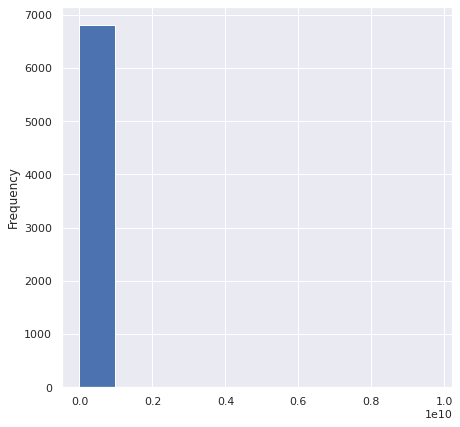

In [ ]:
datos['Average Collection Days'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Average Collection Days'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.00438

0.00438653043972043

In [ ]:
datos['Average Collection Days'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a   0.0065

0.00657253743323499

In [ ]:
datos['Average Collection Days'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.00897

0.008972875581191801

In [ ]:
datos['Average Collection Days'].min()   # el valor mas bajo es 0

0.0

In [ ]:
datos['Average Collection Days'].max()   # el valor mas alto 9730000000

9730000000.0

In [ ]:
datos['Average Collection Days'].mode()   # el valor que mas se repite 0

0    0.0
dtype: float64

In [ ]:
datos['Average Collection Days'].median()

0.00657253743323499

In [ ]:
datos['Average Collection Days'].mean()    # el valor del promedio es 9826220

9826220.861191586

In [ ]:
datos['Average Collection Days'].std()  # los valores se alejan del promedio en 256358895

256358895.70533204

49.Analisis Exploratorio de la Caracteristica **Inventory Turnover Rate (times)**

La rotación de inventario es una proporción que mide la cantidad de veces que se vende o consume el inventario en un período de tiempo determinado. También conocida como rotación de inventario, rotación de stock y rotación de existencias, la fórmula de rotación de inventario se calcula dividiendo el costo de los bienes vendidos

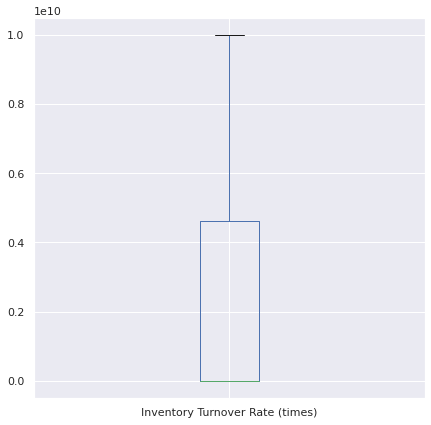

In [ ]:
datos['Inventory Turnover Rate (times)'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

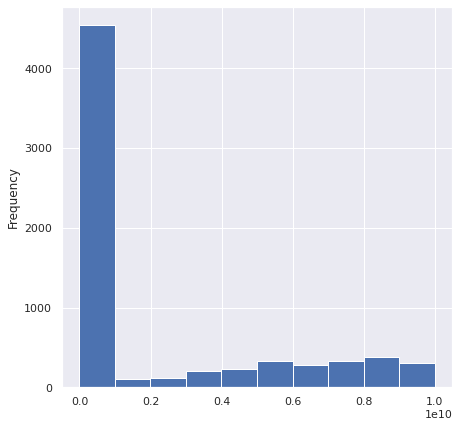

In [ ]:
datos['Inventory Turnover Rate (times)'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Inventory Turnover Rate (times)'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.00017

0.0001728255554827355

In [ ]:
datos['Inventory Turnover Rate (times)'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.00076

0.000764674265386299

In [ ]:
datos['Inventory Turnover Rate (times)'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  4620000000

4620000000.0

In [ ]:
datos['Inventory Turnover Rate (times)'].min()   # el valor minimo es 0

0.0

In [ ]:
datos['Inventory Turnover Rate (times)'].max()    # el valor mas alto es 9990000000

9990000000.0

In [ ]:
datos['Inventory Turnover Rate (times)'].mode()  # el valor que mas se repite corresponde a 19100000

0    19100000.0
dtype: float64

In [ ]:
datos['Inventory Turnover Rate (times)'].median()

0.000764674265386299

In [ ]:
datos['Inventory Turnover Rate (times)'].mean()

2149106056.60753

In [ ]:
datos['Inventory Turnover Rate (times)'].std()   # los valores se alejan del promedio 3247967014

3247967014.0479045

50.Analisis Exploratorio de la Caracteristica **Fixed Assets Turnover Frequency**

La fórmula del índice de rotación de activos fijos se calcula dividiendo las ventas netas por la propiedad, planta y equipo total neto de la depreciación acumulada. Como puede ver, es una ecuación bastante simple.

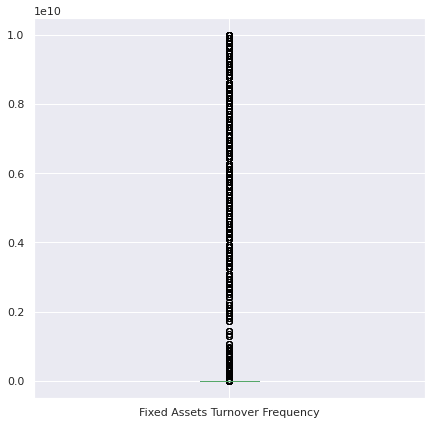

In [ ]:
datos['Fixed Assets Turnover Frequency'].plot(kind='box')   # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

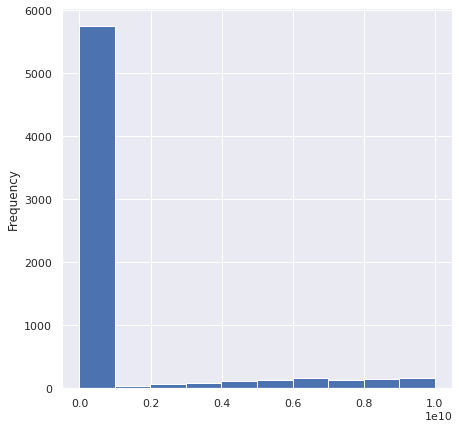

In [ ]:
datos['Fixed Assets Turnover Frequency'].plot(kind='hist')      # distribucion tipo positiva 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Fixed Assets Turnover Frequency'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.000233

0.000233001306471611

In [ ]:
datos['Fixed Assets Turnover Frequency'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.000593

0.000593094234655011

In [ ]:
datos['Fixed Assets Turnover Frequency'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.00365

0.00365237112871734

In [ ]:
datos['Fixed Assets Turnover Frequency'].min()  # el valor mas bajoes 0

0.0

In [ ]:
datos['Fixed Assets Turnover Frequency'].max()   # el valor mas alto corresponde a 9990000000

9990000000.0

In [ ]:
datos['Fixed Assets Turnover Frequency'].mode()   # el valor que más se repite es 0.000102

0    0.000102
dtype: float64

In [ ]:
datos['Fixed Assets Turnover Frequency'].median()

0.000593094234655011

In [ ]:
datos['Fixed Assets Turnover Frequency'].mean()    # el valor  promedio corresponde  a 1008595981

1008595981.8174767

In [ ]:
datos['Fixed Assets Turnover Frequency'].std()

2477557316.9201717

51.Analisis Exploratorio de la Caracteristica **Net Worth Turnover Rate (times)**

Es una relación que compara el agotamiento del capital de trabajo ... del tiempo necesario para convertir los activos y pasivos corrientes netos en efectivo.

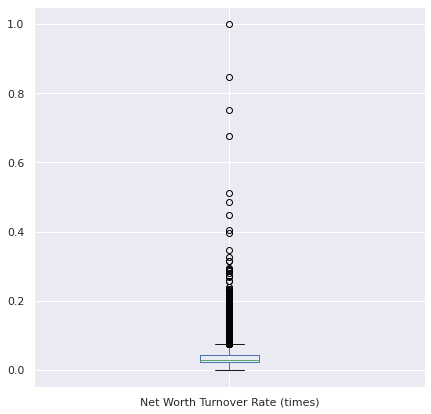

In [ ]:
datos['Net Worth Turnover Rate (times)'].plot(kind='box')    # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

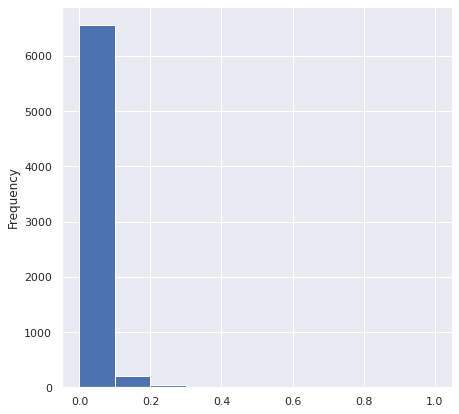

In [ ]:
datos['Net Worth Turnover Rate (times)'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net Worth Turnover Rate (times)'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.02177

0.0217741935483871

In [ ]:
datos['Net Worth Turnover Rate (times)'].quantile(0.5)  # indica que el  50% de las empresas presentan un valor menor o igual a  0.0295

0.0295161290322581

In [ ]:
datos['Net Worth Turnover Rate (times)'].quantile(0.75) # indica que el 75% de las empresas presentan un valor menor o igual a  0.042

0.0429032258064516

In [ ]:
datos['Net Worth Turnover Rate (times)'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Net Worth Turnover Rate (times)'].max()   # el valor mas alto corresponde a 1

1.0

In [ ]:
datos['Net Worth Turnover Rate (times)'].mode()   # el valor que mas se repite 0.028387

0    0.028387
dtype: float64

In [ ]:
datos['Net Worth Turnover Rate (times)'].median()

0.0295161290322581

In [ ]:
datos['Net Worth Turnover Rate (times)'].mean()   # el promedio es de 0.038595

0.03859505461495215

In [ ]:
datos['Net Worth Turnover Rate (times)'].std()    # los valores se alejan del promedio e 0.0366

0.03668034356041346

52.Analisis Exploratorio de la Caracteristica **Revenue per person**

Son los ingresos o las ventas totales que realiza una empresa divididos por las personas a tiempo completo que trabajan allí.
Esta relación se encuentra entre las más universalmente aplicables y se utiliza a menudo para comparar empresas dentro de la misma industria.

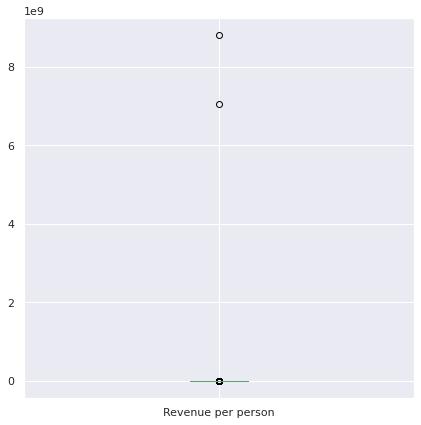

In [ ]:
datos['Revenue per person'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

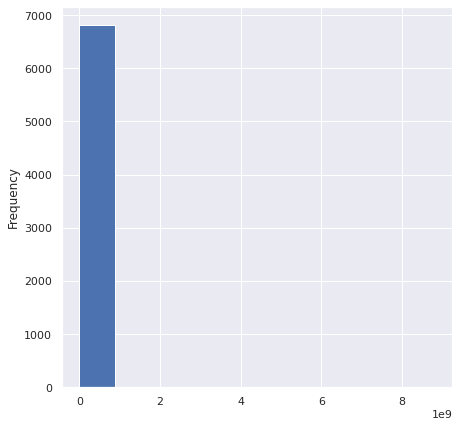

In [ ]:
datos['Revenue per person'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Revenue per person'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a   0.0104

0.010432854016421151

In [ ]:
datos['Revenue per person'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.0186155

0.0186155134174464

In [ ]:
datos['Revenue per person'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a   0.03585

0.0358547655068079

In [ ]:
datos['Revenue per person'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Revenue per person'].max()   # el valor mas alto en la caracterisca es 881000000

8810000000.0

In [ ]:
datos['Revenue per person'].mode()   # el valor que más se repite es 0.01361

0    0.01361
dtype: float64

In [ ]:
datos['Revenue per person'].median()   # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a 0.0186 en revenue per person

0.0186155134174464

In [ ]:
datos['Revenue per person'].mean()   # el valor promedio de la Revenue per person es de  2325854

2325854.266358269

In [ ]:
datos['Revenue per person'].std()    # los valores se alejan del promedio en   1366326554

136632654.38993618

53.Analisis Exploratorio de la Caracteristica **Operating profit per person**

El beneficio por empleado, también conocido como ingreso neto por empleado (NIPE), es una métrica que puede utilizar para calcular el ingreso neto de su empresa dividido por el número total de empleados.

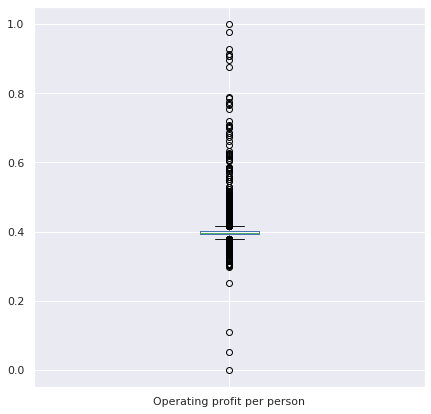

In [ ]:
datos['Operating profit per person'].plot(kind='box')    # se observan valores atipicos, una mediana cercana a  0.4
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

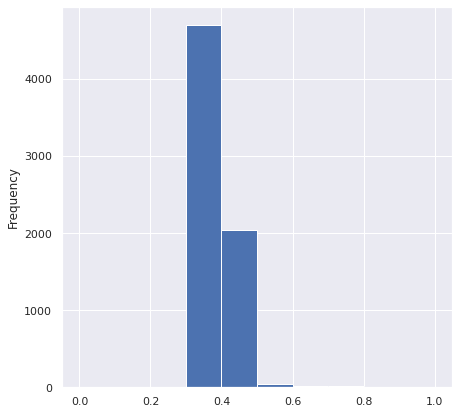

In [ ]:
datos['Operating profit per person'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Operating profit per person'].quantile(0.25)  # indica que el25 % de las empresas presentan un valor menor o igual a  03924

0.392437981954275

In [ ]:
datos['Operating profit per person'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.3958

0.395897876574478

In [ ]:
datos['Operating profit per person'].quantile(0.75)  # indica que el75% de las empresas presentan un valor menor o igual a  0.4018

0.40185093055335697

In [ ]:
datos['Operating profit per person'].min()   # el valor minimo coresponde a 0

0.0

In [ ]:
datos['Operating profit per person'].max()   # el valor mas alto corresponde a 1

1.0

In [ ]:
datos['Operating profit per person'].mode()   # el valor que mas se repite corresponde a 0.394

0    0.394462
dtype: float64

In [ ]:
datos['Operating profit per person'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a   0.39589

0.395897876574478

In [ ]:
datos['Operating profit per person'].mean()  # el valor promedio correspodne a 0.40067

0.4006710150813351

In [ ]:
datos['Operating profit per person'].std()   # los valores se alejan del promedio en 0.032

0.0327201441946995

54.Analisis Exploratorio de la Caracteristica **Allocation rate per person**

Una tasa de asignación es un porcentaje del efectivo o desembolso de capital de un inversionista que se destina a una inversión final. La tasa de asignación se refiere con mayor frecuencia a la cantidad de capital invertido en un producto neto de cualquier tarifa en la que se pueda incurrir a través de la transacción de inversión.

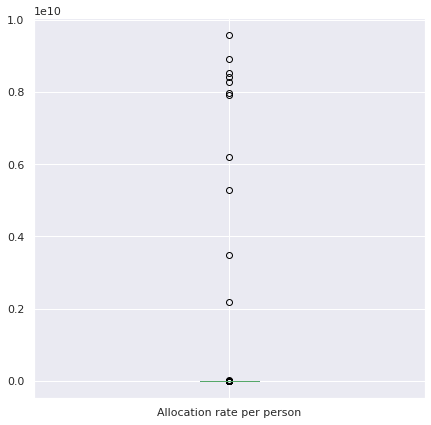

In [ ]:
datos['Allocation rate per person'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

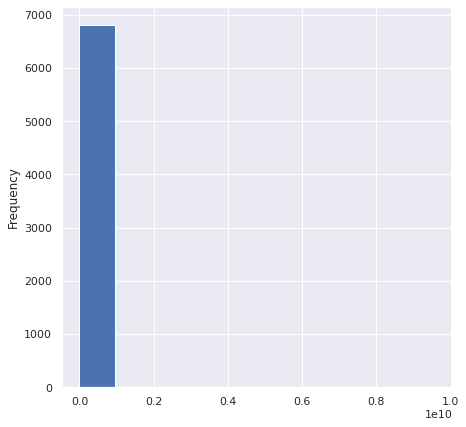

In [ ]:
datos['Allocation rate per person'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Allocation rate per person'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.0041

0.00412052899796365

In [ ]:
datos['Allocation rate per person'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.0078

0.00784437335865574

In [ ]:
datos['Allocation rate per person'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.015

0.015020308976719

In [ ]:
datos['Allocation rate per person'].min()  # el valor minimo 0

0.0

In [ ]:
datos['Allocation rate per person'].max()  # el valor maximo corresponde a 9570000000

9570000000.0

In [ ]:
datos['Allocation rate per person'].mode()   # el valor que mas se repite corresponde  a 0

0    0.0
dtype: float64

In [ ]:
datos['Allocation rate per person'].median()  # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a 0.007844 en Allocation rate per pseron

0.00784437335865574

In [ ]:
datos['Allocation rate per person'].mean()   # el valor promedio corresponde 11255785 en allocation rate per person

11255785.321742103

In [ ]:
datos['Allocation rate per person'].std()   # los valores se desvian del promedio en 294506294

294506294.1167716

55.Analisis Exploratorio de la Caracteristica **Working Capital to Total Assets**

Mide la capacidad de una empresa para cubrir sus obligaciones financieras a corto plazo (pasivos corrientes totales) comparando sus activos corrientes totales con sus activos totales. Esta relación puede proporcionar una idea de la liquidez de la empresa.

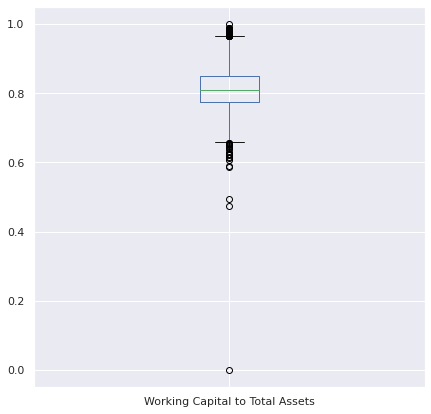

In [ ]:
datos['Working Capital to Total Assets'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

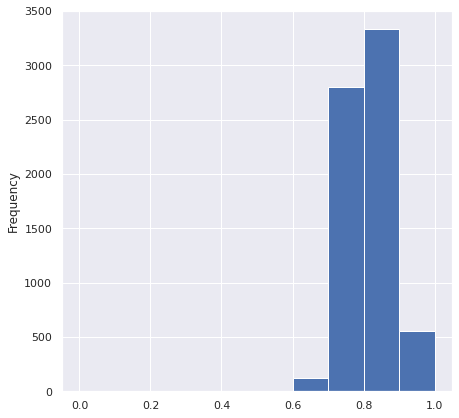

In [ ]:
datos['Working Capital to Total Assets'].plot(kind='hist')    # distribucion con inclinacion hacia la derecha, tipo negativa 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Working Capital to Total Assets'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.7743

0.774308962762401

In [ ]:
datos['Working Capital to Total Assets'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.8102

0.8102752289846601

In [ ]:
datos['Working Capital to Total Assets'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.8503

0.8503828485419614

In [ ]:
datos['Working Capital to Total Assets'].min()  # el valorminimo corresponde a 0

0.0

In [ ]:
datos['Working Capital to Total Assets'].max()   # el valor maximo corresponde a 1

1.0

In [ ]:
datos['Working Capital to Total Assets'].mode()   # multimodal , varios valores que se repiten varias veces

0       0.000000
1       0.475181
2       0.494210
3       0.588283
4       0.588815
          ...   
6814    0.986300
6815    0.988461
6816    0.989152
6817    0.989252
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Working Capital to Total Assets'].median()    # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.8102

0.8102752289846601

In [ ]:
datos['Working Capital to Total Assets'].mean()   # el valor promedio es de 0.814

0.8141251702613322

In [ ]:
datos['Working Capital to Total Assets'].std()   # los valores se alejan del promedio en 0.0590

0.059054402648263365

56.Analisis Exploratorio de la Caracteristica **Quick Assets/Total Assets**

Brinda la información de la participación o peso relativo de los activos circulantes entre el total de los activos.
Los QUICK ASSETS se refieren a los activos propiedad de una empresa con un valor comercial o de cambio que se pueden convertir fácilmente en efectivo o que ya están en forma de efectivo.

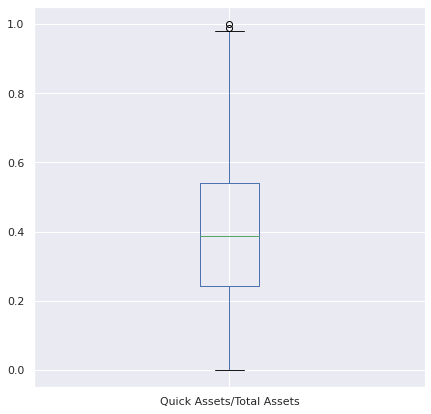

In [ ]:
datos['Quick Assets/Total Assets'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

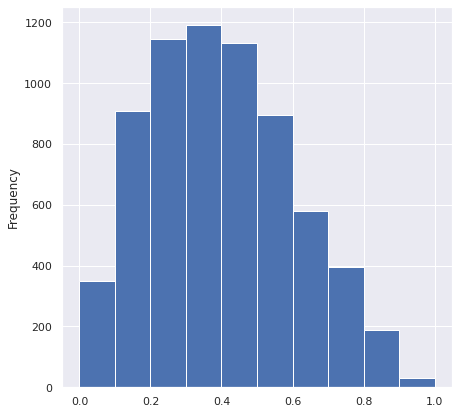

In [ ]:
datos['Quick Assets/Total Assets'].plot(kind='hist')     # distribucion con tipo inclinacion hacia la izquierda, tipo positiva
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Quick Assets/Total Assets'].quantile(0.25)    # indica que el 25% de las empresas presentan un valor menor o igual a 0.24197

0.24197285659393997

In [ ]:
datos['Quick Assets/Total Assets'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.38645

0.386450924981744

In [ ]:
datos['Quick Assets/Total Assets'].quantile(0.75)  # indica que el75 % de las empresas presentan un valor menor o igual a   0.54059

0.540593673285078

In [ ]:
datos['Quick Assets/Total Assets'].min()  # valor mas bajo corresponde a 0

0.0

In [ ]:
datos['Quick Assets/Total Assets'].max()  # el valos mas alto corresponde a 1

1.0

In [ ]:
datos['Quick Assets/Total Assets'].mode()   # multimodal , 

0       0.000000
1       0.001469
2       0.006131
3       0.006310
4       0.011524
          ...   
6814    0.965243
6815    0.978981
6816    0.981009
6817    0.988944
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Quick Assets/Total Assets'].median()  # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a 0.3864

0.386450924981744

In [ ]:
datos['Quick Assets/Total Assets'].mean()

0.40013181236505724

In [ ]:
datos['Quick Assets/Total Assets'].std()   # los valores se desvian del promedio en 0.2019

0.2019980666806821

57.Analisis Exploratorio de la Caracteristica **Current Assets/Total Assets**

Nos brinda el peso de los Activos Circulantes entre el Total de Activos.
El activo corriente total es la suma de todos los activos corrientes. Estos son efectivo, equivalentes de efectivo, gastos pagados por adelantado, inventario o cualquier otro activo que se espera que se convierta en efectivo durante el próximo año.

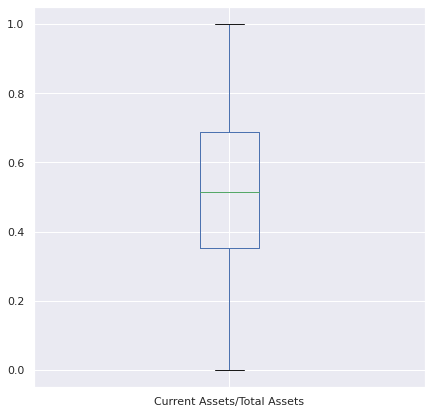

In [ ]:
datos['Current Assets/Total Assets'].plot(kind='box')     # esta distribucion no se observan valores atipicos,  la mediana está cercana a 0.5
sns.set(rc={'figure.figsize':(7,7)})                      # el valor minimo correspnde a 0
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

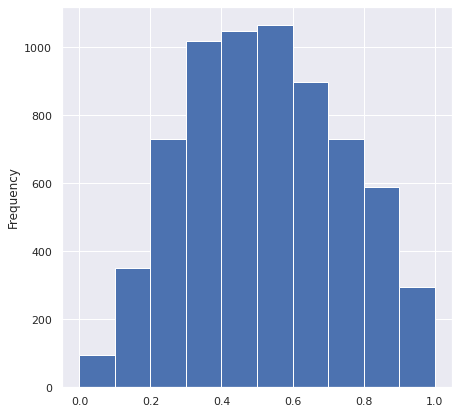

In [ ]:
datos['Current Assets/Total Assets'].plot(kind='hist')    # una distribucion multimodal , 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Assets/Total Assets'].quantile(0.25)  #  # indica que el 25% de las empresas presentan un valor menor o igual a 0.3528 en Current Assets/ total assets

0.35284541721511353

In [ ]:
datos['Current Assets/Total Assets'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.68905

0.514829793890847

In [ ]:
datos['Current Assets/Total Assets'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a 0.68905

0.6890506806831516

In [ ]:
datos['Current Assets/Total Assets'].min()      # el valor minimo es cero

0.0

In [ ]:
datos['Current Assets/Total Assets'].max()   # el valor maximo es uno

1.0

In [ ]:
datos['Current Assets/Total Assets'].mode()   # una distribucion multimodal, varios numeros son los que tinen mayor veces se repiten

0       0.000000
1       0.001407
2       0.006045
3       0.020835
4       0.020920
          ...   
6814    0.991139
6815    0.995453
6816    0.996105
6817    0.998800
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Current Assets/Total Assets'].median()   # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a 0.5148

0.514829793890847

In [ ]:
datos['Current Assets/Total Assets'].mean()  # el valor promedio de la Current Assets / total assets  es de 0.5222

0.5222734467680333

In [ ]:
datos['Current Assets/Total Assets'].std()   # los valores se alejan del promedio en 0.21811

0.21811182151419325

58.Analisis Exploratorio de la Caracteristica **Cash/Total Assets**

Efectivo / Activos totales: mide la parte de los activos de una empresa que se mantiene en efectivo o valores negociables. Aunque una proporción alta puede indicar cierto grado de seguridad desde el punto de vista del acreedor, las cantidades excesivas de efectivo pueden considerarse ineficientes.

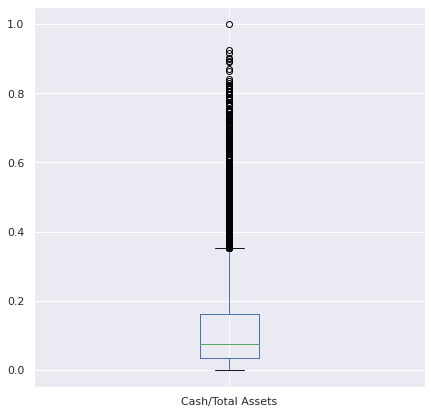

In [ ]:
datos['Cash/Total Assets'].plot(kind='box')   # se observan valores atipicos, la mayor concentracion de valors entre 0 y 0.2
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

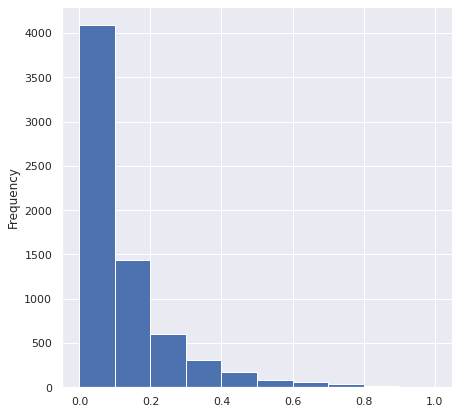

In [ ]:
datos['Cash/Total Assets'].plot(kind='hist')      # una distribucion del tipo positiva , concetracion de datos hacia la izquierda
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash/Total Assets'].quantile(0.25)   #  indica que el 25% de las empresas presentan un valor menor o igual a 0.03354

0.03354322123979425

In [ ]:
datos['Cash/Total Assets'].quantile(0.5)    # indica que el 50% de las empresas presentan un valor menor o igual a 0.07488

0.0748874639354301

In [ ]:
datos['Cash/Total Assets'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a 0.15107

0.1610731518633315

In [ ]:
datos['Cash/Total Assets'].min()  # el valor mas bajo es cero

0.0

In [ ]:
datos['Cash/Total Assets'].max()   # el valor mas alto es de 1

1.0

In [ ]:
datos['Cash/Total Assets'].mode()   # distribucon del tipo multimodal, varios numeros tienen la caracteristica de ser la moda , hay varios numeros que se repiten mucho

0       0.000000
1       0.000184
2       0.000315
3       0.000379
4       0.000409
          ...   
6814    0.898929
6815    0.903032
6816    0.916271
6817    0.925018
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Cash/Total Assets'].median()   # la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.074

0.0748874639354301

In [ ]:
datos['Cash/Total Assets'].mean()  # el promedio de cash/total assets es de 0.12409

0.12409456048965258

In [ ]:
datos['Cash/Total Assets'].std()   #  los valores se alejan del promedio en 0.1392

0.13925058358332654

59.Analisis Exploratorio de la Caracteristica **Quick Assets/Current Liability**

La razón corriente mide la capacidad de una empresa para pagar los pasivos corrientes o de corto plazo (deuda y cuentas por pagar) con sus activos corrientes o de corto plazo (efectivo, inventario y cuentas por cobrar).

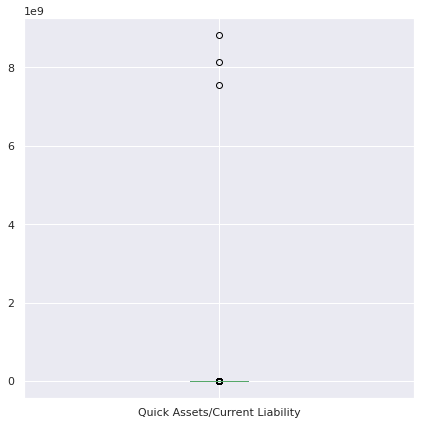

In [ ]:
datos['Quick Assets/Current Liability'].plot(kind='box')    # valors atipicos, valors muy dispersos esta caracteristica, el valor minimo es cero y el valor maximo 
sns.set(rc={'figure.figsize':(7,7)})                        # corresponde a 8820000000
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

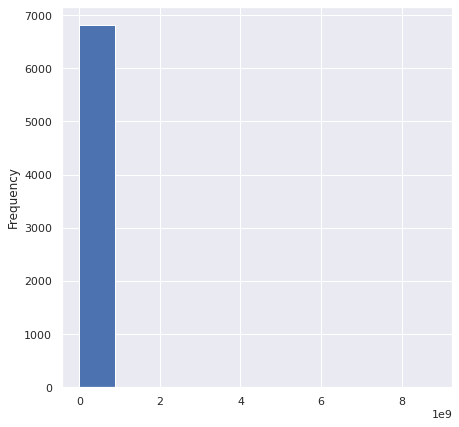

In [ ]:
datos['Quick Assets/Current Liability'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Quick Assets/Current Liability'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0.00523

0.005239775826640915

In [ ]:
datos['Quick Assets/Current Liability'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.0079

0.00790889798045124

In [ ]:
datos['Quick Assets/Current Liability'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a 0.0129

0.0129509103075746

In [ ]:
datos['Quick Assets/Current Liability'].min()

0.0

In [ ]:
datos['Quick Assets/Current Liability'].max()

8820000000.0

In [ ]:
datos['Quick Assets/Current Liability'].mode()   # multimodal, varios numeros que se repiten mucho

0       0.000000e+00
1       1.199931e-04
2       1.204469e-04
3       1.319398e-04
4       1.354058e-04
            ...     
6814    3.251893e-01
6815    1.000000e+00
6816    7.540000e+09
6817    8.140000e+09
6818    8.820000e+09
Length: 6819, dtype: float64

In [ ]:
datos['Quick Assets/Current Liability'].median()  # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a 0.0079

0.00790889798045124

In [ ]:
datos['Quick Assets/Current Liability'].mean()   # el valor promedio de Quick assets / current liabillity es de 3592902

3592902.1968296594

In [ ]:
datos['Quick Assets/Current Liability'].std()    # una desviacion estandar muy alta, demuestra lo dispersos que son los valores en esta caracteristica. 
                                                  # los valores se alejan del promedio en 171620908

171620908.60682204

60.Analisis Exploratorio de la Caracteristica **Cash/Current Liability**

La capacidad de una empresa para liquidar sus pasivos corrientes utilizando solo su efectivo e inversiones de alta liquidez

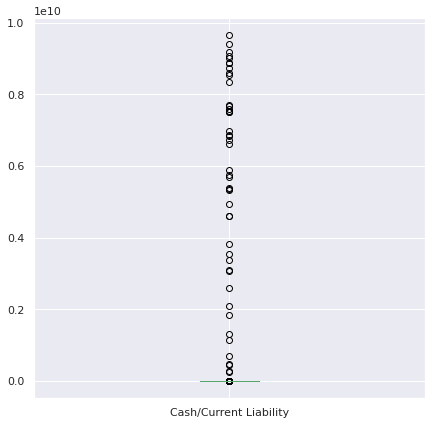

In [ ]:
datos['Cash/Current Liability'].plot(kind='box')    # se observan valores atipicos , valor minimo de cero, y la mediana cercana a 0.0049
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

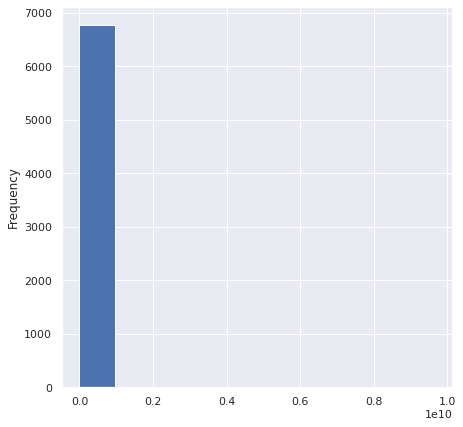

In [ ]:
datos['Cash/Current Liability'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash/Current Liability'].quantile(0.25)    # indica que el 25% de las empresas presentan un valor menor o igual a 0.0019

0.001973007541548905

In [ ]:
datos['Cash/Current Liability'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.0049

0.0049038864700734295

In [ ]:
datos['Cash/Current Liability'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a 0.0128

0.0128055731079178

In [ ]:
datos['Cash/Current Liability'].min()    # el valor minimo es cero

0.0

In [ ]:
datos['Cash/Current Liability'].max()   # el valor maximo es de 9650000000

9650000000.0

In [ ]:
datos['Cash/Current Liability'].mode()   # caracteristica multimodal, tiene tres valores que se repiten mucho

0    4.610000e+09
1    7.510000e+09
2    8.870000e+09
dtype: float64

In [ ]:
datos['Cash/Current Liability'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.0049

0.0049038864700734295

In [ ]:
datos['Cash/Current Liability'].mean()  # el valor promedio de la caracteristica es 37159994

37159994.14713339

In [ ]:
datos['Cash/Current Liability'].std()   # los valores se alejan del promedio en 510350903

510350903.16273266

61.Analisis Exploratorio de la Caracteristica **Current Liability to Assets**

La razón corriente compara todos los activos corrientes de una empresa con sus pasivos corrientes. Por lo general, se definen como activos que son efectivo o que se convertirán en efectivo en un año o menos, y pasivos que se pagarán en un año o menos.


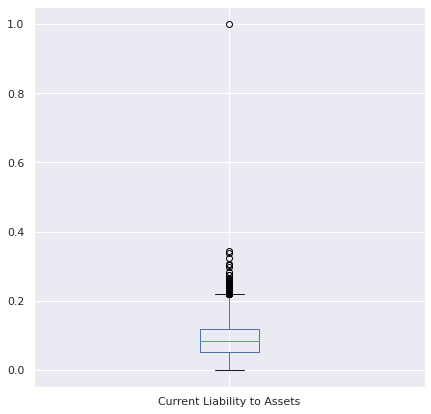

In [ ]:
datos['Current Liability to Assets'].plot(kind='box')   # se observan valores atpicos, la mediana cercana a 0.08, el valor minimo es cero
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

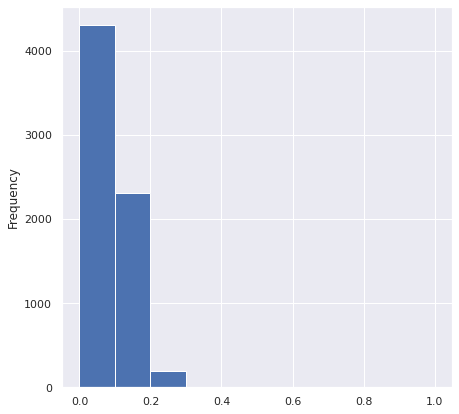

In [ ]:
datos['Current Liability to Assets'].plot(kind='hist')     # distribucion del tipo positiva, valores acumulados hacia la izquierda
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Liability to Assets'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0.053

0.0533012764320206

In [ ]:
datos['Current Liability to Assets'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.082

0.0827047949822228

In [ ]:
datos['Current Liability to Assets'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a   0.1195

0.1195229934695275

In [ ]:
datos['Current Liability to Assets'].min()   # el valormas bajo es cero

0.0

In [ ]:
datos['Current Liability to Assets'].max()   # el valor mas alto es 1

1.0

In [ ]:
datos['Current Liability to Assets'].mode()   # distribucion multimodal, varios numeros que se repiten mucho

0       0.000000
1       0.000784
2       0.000847
3       0.001043
4       0.001481
          ...   
6814    0.307686
6815    0.323917
6816    0.336844
6817    0.343143
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Current Liability to Assets'].median()  #   indica que el 50% de las empresas presentan un valor menor o igual a 0.082

0.0827047949822228

In [ ]:
datos['Current Liability to Assets'].mean()  # el valor del promedio de la caracteristica es 0.096

0.09067279456762385

In [ ]:
datos['Current Liability to Assets'].std()  # los valores se desvian del promedio en 0.0502

0.05028985666891828

62.Analisis Exploratorio de la Caracteristica **Operating Funds to Liability**

¿Qué son las operaciones de financiación?
El término operaciones de financiación se refiere a la conversión de deuda a corto plazo en deuda a largo plazo. Este proceso lo utilizan a menudo las corporaciones junto con los gobiernos para convertir bonos a corto plazo en tenencias de bonos a largo plazo.

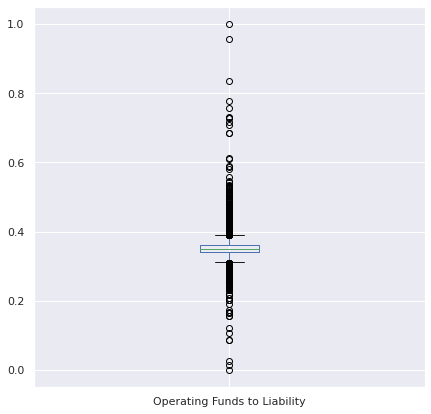

In [ ]:
datos['Operating Funds to Liability'].plot(kind='box')    # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

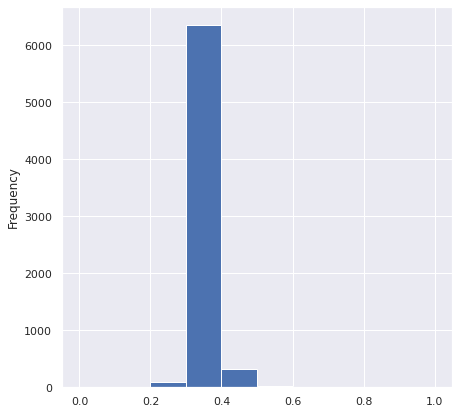

In [ ]:
datos['Operating Funds to Liability'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Operating Funds to Liability'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a   0.3410

0.3410229773557805

In [ ]:
datos['Operating Funds to Liability'].quantile(0.5)    # indica que el 50 % de las empresas presentan un valor menor o igual a   0.3485

0.34859665710613696

In [ ]:
datos['Operating Funds to Liability'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a 0.360914

0.3609148870133705

In [ ]:
datos['Operating Funds to Liability'].min()   # el valor mas bajo es cero

0.0

In [ ]:
datos['Operating Funds to Liability'].max()  # el valor mas alto es 1

1.0

In [ ]:
datos['Operating Funds to Liability'].mode()  # dsitribucion multimodal , varios numeros que se repiten mucho

0       0.000000
1       0.014723
2       0.026274
3       0.086267
4       0.087098
          ...   
6814    0.756949
6815    0.776297
6816    0.835717
6817    0.956425
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Operating Funds to Liability'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a 0.3485

0.34859665710613696

In [ ]:
datos['Operating Funds to Liability'].mean()  # el valor del promedio es 0.3582

0.3538280041215869

In [ ]:
datos['Operating Funds to Liability'].std()   # los valores se alejan del promedio en 0.03514

0.03514718417918804

63.Analisis Exploratorio de la Caracteristica **Inventory/Working Capital**

El inventario al capital de trabajo es un índice de liquidez que mide la cantidad de capital de trabajo que está inmovilizado en el inventario.

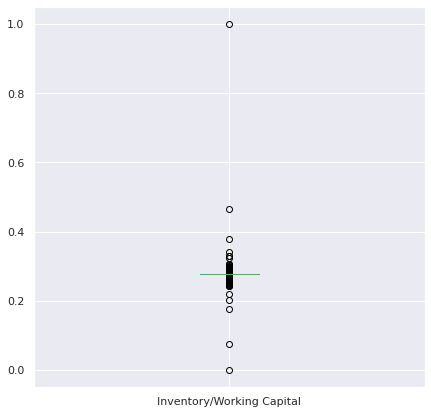

In [ ]:
datos['Inventory/Working Capital'].plot(kind='box')   # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

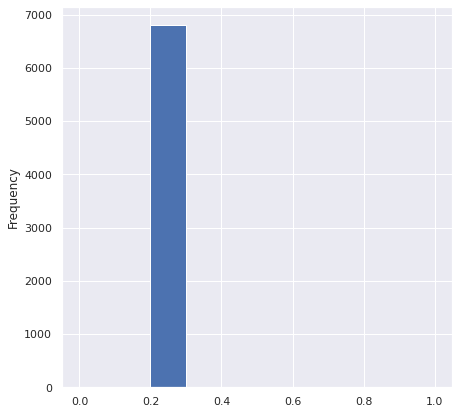

In [ ]:
datos['Inventory/Working Capital'].plot(kind='hist')     # la mayoria de los datos se acumulan cerca de 0.27 y 0.28
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Inventory/Working Capital'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a 0.277033

0.2770339694810945

In [ ]:
datos['Inventory/Working Capital'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.277177

0.277177699032242

In [ ]:
datos['Inventory/Working Capital'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.2774

0.2774287054274715

In [ ]:
datos['Inventory/Working Capital'].min()   # el valor minimo corresponde a 0

0.0

In [ ]:
datos['Inventory/Working Capital'].max()   # el valor maximo corresponde a 1

1.0

In [ ]:
datos['Inventory/Working Capital'].mode()  # el valor que mas se repite es 0.2769

0    0.276975
dtype: float64

In [ ]:
datos['Inventory/Working Capital'].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  0.2771

0.277177699032242

In [ ]:
datos['Inventory/Working Capital'].mean()  # el valor promedio es 0.2773

0.27739510610233076

In [ ]:
datos['Inventory/Working Capital'].std()  # los valores se alejan del promedio en 0.01046

0.010468846972945247

64.Analisis Exploratorio de la Caracteristica **Inventory/Current Liability**

Una proporción rápida baja indica que una organización puede tardar en pagar sus obligaciones. Esta relación calcula cuántos días le toma a la organización recibir el pago de sus clientes.

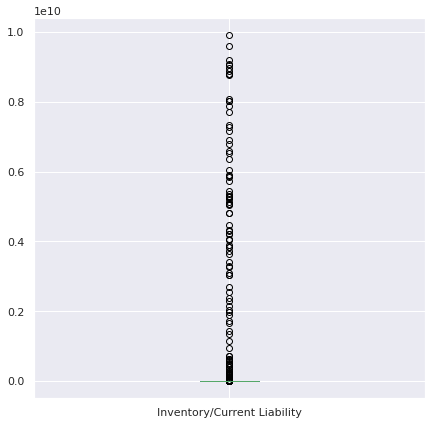

In [ ]:
datos['Inventory/Current Liability'].plot(kind='box')     # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

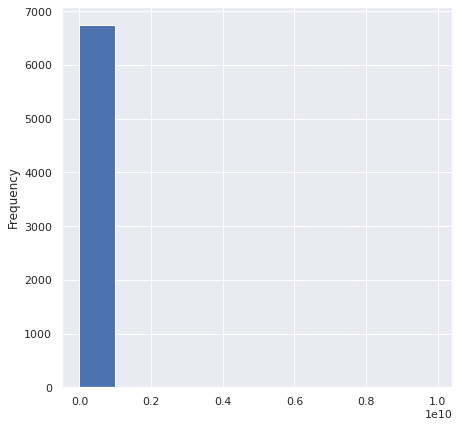

In [ ]:
datos['Inventory/Current Liability'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Inventory/Current Liability'].quantile(0.25)   # indica que el 25 % de las empresas presentan un valor menor o igual a 0.003163

0.00316314767469916

In [ ]:
datos['Inventory/Current Liability'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.0064

0.00649733535347341

In [ ]:
datos['Inventory/Current Liability'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a 0.0111

0.011146766748190151

In [ ]:
datos['Inventory/Current Liability'].min()  # el valor minimo es cero 

0.0

In [ ]:
datos['Inventory/Current Liability'].max() # el valor maximo es 9910000000

9910000000.0

In [ ]:
datos['Inventory/Current Liability'].mode()   # el valor que mas se repite es cero

0    0.0
dtype: float64

In [ ]:
datos['Inventory/Current Liability'].median()

0.00649733535347341

In [ ]:
datos['Inventory/Current Liability'].mean()  # el valor promedio es 55806804

55806804.52577965

In [ ]:
datos['Inventory/Current Liability'].std()  # los valores se alejan del promedio en 582051554

582051554.6194199

65.Analisis Exploratorio de la Caracteristica **Current Liabilities/Liability**

La razón corriente mide la capacidad de una empresa para pagar sus deudas u obligaciones financieras a corto plazo.

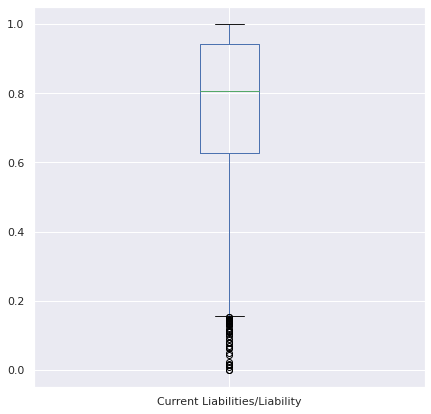

In [ ]:
datos['Current Liabilities/Liability'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

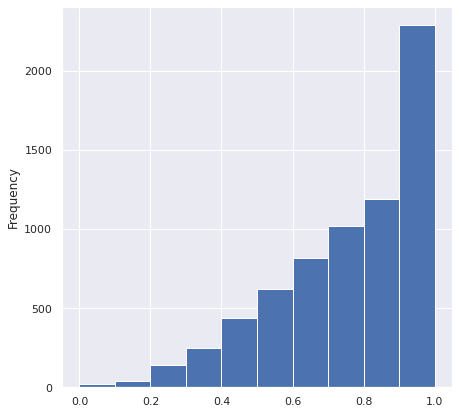

In [ ]:
datos['Current Liabilities/Liability'].plot(kind='hist')    # distribucion negativa, valores acumulados hacia la derecha
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Liabilities/Liability'].quantile(0.25)  # indica que el  25% de las empresas presentan un valor menor o igual a   0.6269

0.6269807662218725

In [ ]:
datos['Current Liabilities/Liability'].quantile(0.5)  # indica que el  50% de las empresas presentan un valor menor o igual a 0.8068

0.8068814047133329

In [ ]:
datos['Current Liabilities/Liability'].quantile(0.75)  # indica que el 75 % de las empresas presentan un valor menor o igual a 0.94202

0.9420266937000692

In [ ]:
datos['Current Liabilities/Liability'].min()   # el valor minimo es cero 

0.0

In [ ]:
datos['Current Liabilities/Liability'].max()   # el valor maximo es uno

1.0

In [ ]:
datos['Current Liabilities/Liability'].mode()  # el valor que mas se repite es 1

0    1.0
dtype: float64

In [ ]:
datos['Current Liabilities/Liability'].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  0.8068

0.8068814047133329

In [ ]:
datos['Current Liabilities/Liability'].mean()  # el promedio es 0.7615

0.761598877585336

In [ ]:
datos['Current Liabilities/Liability'].std()  # los valores se alejan del promedio en 0.2066

0.20667676768344168

66.Analisis Exploratorio de la Caracteristica **Working Capital/Equity**

¿Qué es el capital de trabajo?
El capital de trabajo, también conocido como capital de trabajo neto (NWC), es la diferencia entre los activos corrientes de una empresa (efectivo, cuentas por cobrar / facturas impagas de los clientes, inventarios de materias primas y productos terminados) y sus pasivos corrientes, como cuentas por pagar y deudas.

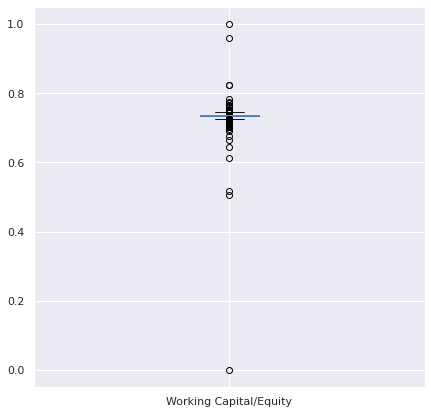

In [ ]:
datos['Working Capital/Equity'].plot(kind='box')    # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

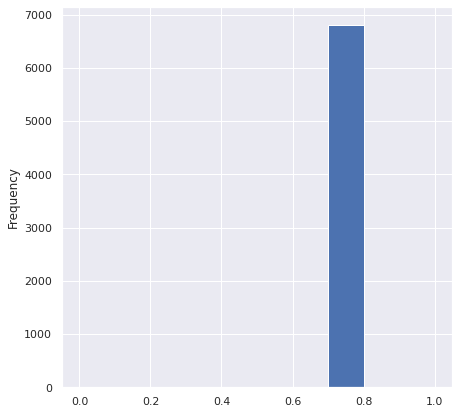

In [ ]:
datos['Working Capital/Equity'].plot(kind='hist')     # valores concentados entre 0.7 y 0.8
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Working Capital/Equity'].quantile(0.25)    # indica que el   25 % de las empresas presentan un valor menor o igual a  0.733

0.7336118185643419

In [ ]:
datos['Working Capital/Equity'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a   0.73601

0.736012732265696

In [ ]:
datos['Working Capital/Equity'].quantile(0.75)   # indica que el  75 % de las empresas presentan un valor menor o igual a   0.7385

0.738559910578823

In [ ]:
datos['Working Capital/Equity'].min()   # el valor minimo corresponde a cero

0.0

In [ ]:
datos['Working Capital/Equity'].max()   # el valor más alto en la caracteristica es 1

1.0

In [ ]:
datos['Working Capital/Equity'].mode()  # distribucion multimodal , varios valores que se repiten mucho

0       0.000000
1       0.507149
2       0.517571
3       0.612578
4       0.645339
          ...   
6814    0.782322
6815    0.824317
6816    0.825197
6817    0.961070
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Working Capital/Equity'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.73601

0.736012732265696

In [ ]:
datos['Working Capital/Equity'].mean()  # el promedio del working capital / equity  es de 0.7358

0.7358165257322186

In [ ]:
datos['Working Capital/Equity'].std()   # los valores se desvian del promedio en 0.01167

0.011678026475599061

67.Analisis Exploratorio de la Caracteristica **Current Liabilities/Equity**

El ratio compara los pasivos circulantes de una empresa con el capital contable y se puede utilizar para evaluar cuánto apalancamiento está utilizando una empresa.

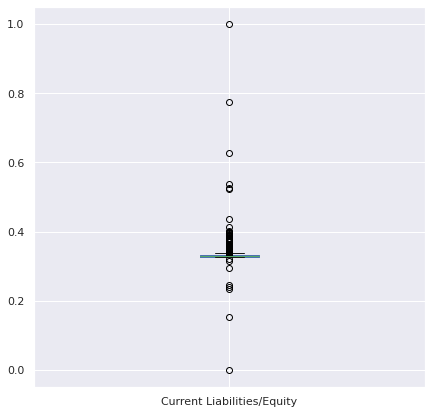

In [ ]:
datos['Current Liabilities/Equity'].plot(kind='box')   # se observan valores atipicos y el valor minimo igual a cero, con una mediana cercana a 0.32
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

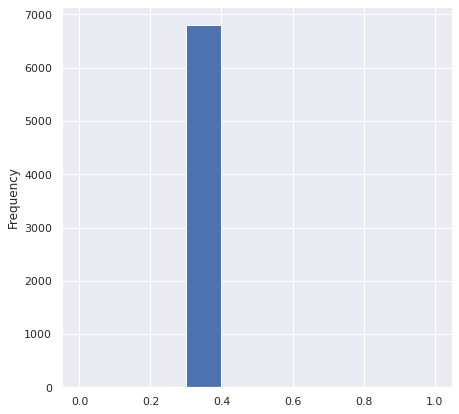

In [ ]:
datos['Current Liabilities/Equity'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Liabilities/Equity'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.3280

0.328095841686878

In [ ]:
datos['Current Liabilities/Equity'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.3296

0.32968513313592895

In [ ]:
datos['Current Liabilities/Equity'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.3323

0.332322404809702

In [ ]:
datos['Current Liabilities/Equity'].min()  # el valor más bajo de la caracteristica es cero

0.0

In [ ]:
datos['Current Liabilities/Equity'].max() # el valor más alto es 1

1.0

In [ ]:
datos['Current Liabilities/Equity'].mode()  # distribucion multimodal, varios numeros que se repiten bastante

0       0.000000
1       0.153811
2       0.234391
3       0.241053
4       0.246325
          ...   
6814    0.526052
6815    0.536635
6816    0.627817
6817    0.775890
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Current Liabilities/Equity'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.3296

0.32968513313592895

In [ ]:
datos['Current Liabilities/Equity'].mean()  # el promedio de la caracteristica es de 0.3314

0.33140980061698955

In [ ]:
datos['Current Liabilities/Equity'].std()  # los valores se alejan del promedio en 0.0134

0.013488027908897839

68.Analisis Exploratorio de la Caracteristica **Long-term Liability to Current Assets**

Es un índice de cobertura o solvencia que se utiliza para calcular el monto del apalancamiento de una empresa. El resultado de la relación muestra el porcentaje de los activos de una empresa que tendría que liquidar para pagar su deuda a largo plazo.

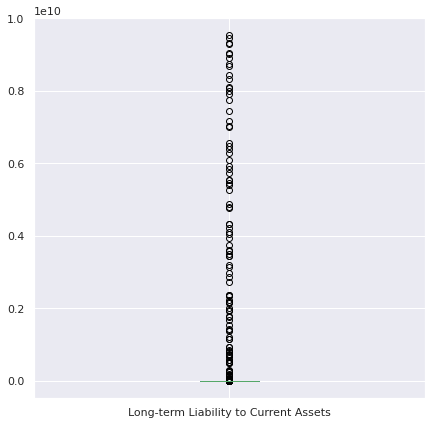

In [ ]:
datos['Long-term Liability to Current Assets'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

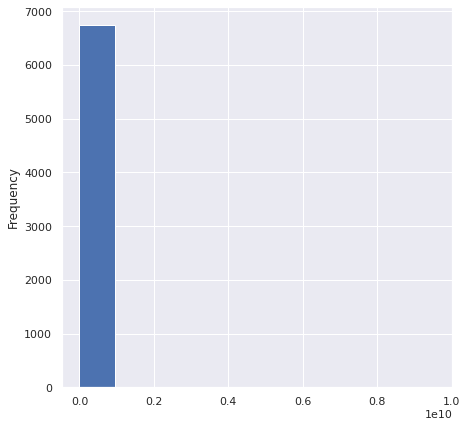

In [ ]:
datos['Long-term Liability to Current Assets'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Long-term Liability to Current Assets'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor igual a  0

0.0

In [ ]:
datos['Long-term Liability to Current Assets'].quantile(0.5)   # indica que el 50 % de las empresas presentan un valor menor o igual a   0.0019

0.0019746187761809

In [ ]:
datos['Long-term Liability to Current Assets'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a   0.009

0.00900594594425662

In [ ]:
datos['Long-term Liability to Current Assets'].min()   # el valor minimo es cero

0.0

In [ ]:
datos['Long-term Liability to Current Assets'].max()  # el valor mas alto es 9540000000

9540000000.0

In [ ]:
datos['Long-term Liability to Current Assets'].mode()  # el valor que mas se repite es cero

0    0.0
dtype: float64

In [ ]:
datos['Long-term Liability to Current Assets'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.0019

0.0019746187761809

In [ ]:
datos['Long-term Liability to Current Assets'].mean()   # el promedio de la carcteristica long-term liability  54160038

54160038.13589435

In [ ]:
datos['Long-term Liability to Current Assets'].std()   # los valores se alejan del promedio en 570270621

570270621.9592273

69.Analisis Exploratorio de la Caracteristica **Retained Earnings to Total Assets**

Es la relación que mide la ganancia acumulada sobre el activo total de una empresa. Muestra el porcentaje del activo total que se financia con las ganancias retenidas.

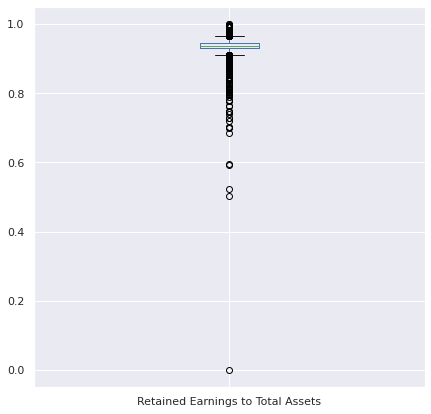

In [ ]:
datos['Retained Earnings to Total Assets'].plot(kind='box')    # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

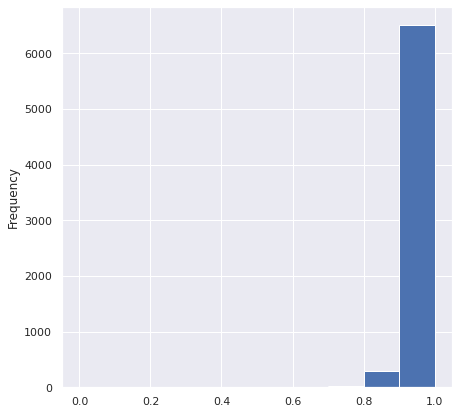

In [ ]:
datos['Retained Earnings to Total Assets'].plot(kind='hist')    # concentracion de los valores entre 0.9 y 1
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Retained Earnings to Total Assets'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.93109

0.9310965081459854

In [ ]:
datos['Retained Earnings to Total Assets'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.9376

0.937672322031461

In [ ]:
datos['Retained Earnings to Total Assets'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.9448

0.9448112860939986

In [ ]:
datos['Retained Earnings to Total Assets'].min()    # el valor mas bajo es 0

0.0

In [ ]:
datos['Retained Earnings to Total Assets'].max()   # el valor mas alto es 1

1.0

In [ ]:
datos['Retained Earnings to Total Assets'].mode()   # distribucion multimodal , varios numeros que se repiten mucho

0       0.000000
1       0.502084
2       0.523823
3       0.592447
4       0.594171
          ...   
6814    0.995112
6815    0.995602
6816    0.996616
6817    0.998858
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Retained Earnings to Total Assets'].median()  # la mediana de Retained Earnings,  indica que el 50% de las empresas presentan un valor menor o igual a   0.93767

0.937672322031461

In [ ]:
datos['Retained Earnings to Total Assets'].mean()  # el promedio de la caracteristica es de 0.93473

0.9347327541270045

In [ ]:
datos['Retained Earnings to Total Assets'].std()  # los valores se alejan del promedio en 0.02554

0.02556422169064309

70.Analisis Exploratorio de la Caracteristica **Total income/Total expense**

Es la comparación de los gastos totales de una empresa con los ingresos o las ventas netas generadas.

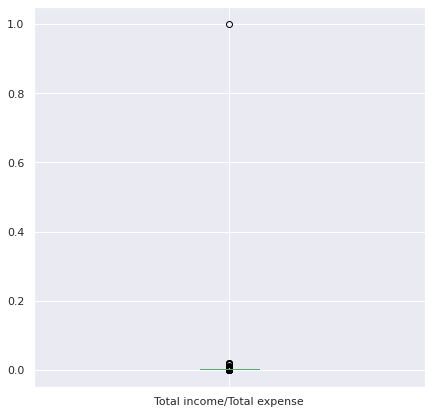

In [ ]:
datos['Total income/Total expense'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

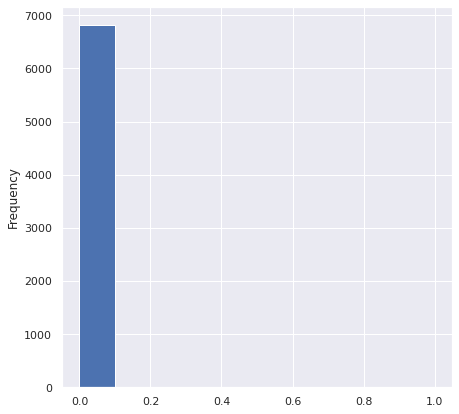

In [ ]:
datos['Total income/Total expense'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Total income/Total expense'].quantile(0.25)    # indica que el 25% de las empresas presentan un valor menor o igual a  0.002235

0.002235596209657765

In [ ]:
datos['Total income/Total expense'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.002336

0.00233617093104482

In [ ]:
datos['Total income/Total expense'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.002491

0.0024918511193838646

In [ ]:
datos['Total income/Total expense'].min()  # el valor mas bajo es cero

0.0

In [ ]:
datos['Total income/Total expense'].max()  # el valor mas alto es 1

1.0

In [ ]:
datos['Total income/Total expense'].mode()   # distribucion multimodal , aparecen varios numeros que se repiten varias veces

0       0.000000
1       0.000772
2       0.000971
3       0.001163
4       0.001257
          ...   
6814    0.015928
6815    0.017451
6816    0.018872
6817    0.021153
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Total income/Total expense'].median()   # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.0023361

0.00233617093104482

In [ ]:
datos['Total income/Total expense'].mean()   # el promedio de es de 0.00254

0.0025489455673864563

In [ ]:
datos['Total income/Total expense'].std()     #los valores se alejan del promedio en 0.012

0.012092814696218009

71.Analisis Exploratorio de la Caracteristica **Total expense/Assets**

Estos costos consisten principalmente en honorarios de administración y gastos adicionales, como honorarios de negociación, honorarios legales, honorarios de auditor y otros gastos operativos.
El TER proporciona una forma de cubrir los costos anuales de funcionamiento de un fondo en particular.

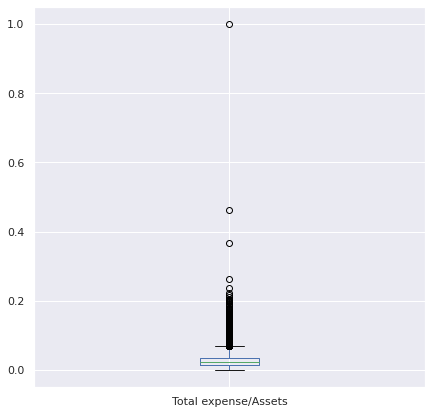

In [ ]:
datos['Total expense/Assets'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

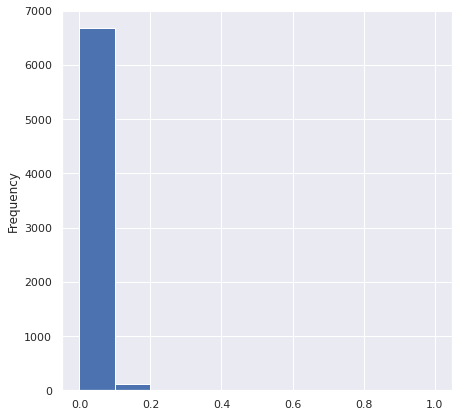

In [ ]:
datos['Total expense/Assets'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Total expense/Assets'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.01456

0.01456705658927065

In [ ]:
datos['Total expense/Assets'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.02267

0.0226739487842648

In [ ]:
datos['Total expense/Assets'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.03593

0.035930137895265155

In [ ]:
datos['Total expense/Assets'].min()  # el vlaor mas bajo es cero

0.0

In [ ]:
datos['Total expense/Assets'].max()  # el valor mas alto es 1

1.0

In [ ]:
datos['Total expense/Assets'].mode()  # distribucion multimodal, varios numeros que se repiten mucho

0       0.000000
1       0.000853
2       0.000895
3       0.001032
4       0.001044
          ...   
6814    0.236415
6815    0.262269
6816    0.368382
6817    0.463483
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Total expense/Assets'].median()  # la mediana de Total expense/assets indica que el 50% de las empresas presentan un valor menor o igual a  0.0226

0.0226739487842648

In [ ]:
datos['Total expense/Assets'].mean()  # el promedio es de 0.0291

0.029184099255860615

In [ ]:
datos['Total expense/Assets'].std()  # los valores se alejan del promedio en 0.02714

0.027148776792861564

72.Analisis Exploratorio de la Caracteristica **Current Asset Turnover Rate**

El índice de rotación de activos corrientes muestra la relación entre las ventas netas y los activos corrientes. Cuando dividimos las ventas netas con los activos corrientes y las multiplicamos por 100.
En el sector minorista, un índice de rotación de activos de 2,5 o más podría considerarse bueno, mientras que una empresa del sector de servicios públicos tiene más probabilidades de apuntar a un índice de rotación de activos de entre 0,25 y 0,5.

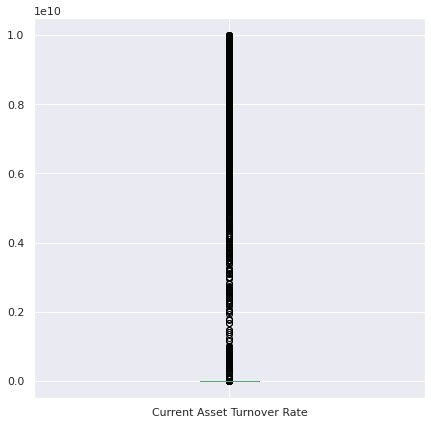

In [ ]:
datos['Current Asset Turnover Rate'].plot(kind='box')    # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

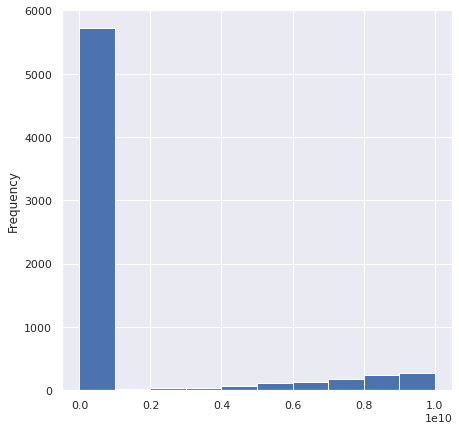

In [ ]:
datos['Current Asset Turnover Rate'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Asset Turnover Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.000145

0.00014562362973872248

In [ ]:
datos['Current Asset Turnover Rate'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.000198

0.000198781556663143

In [ ]:
datos['Current Asset Turnover Rate'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a  0.00045

0.000452594540757913

In [ ]:
datos['Current Asset Turnover Rate'].min()  # el valor mas bajo es cero

0.0

In [ ]:
datos['Current Asset Turnover Rate'].max()   # el valor mas alto es de 10000000000

10000000000.0

In [ ]:
datos['Current Asset Turnover Rate'].mode()  # el valor que mas se repite es 8.580000e+09

0    8.580000e+09
dtype: float64

In [ ]:
datos['Current Asset Turnover Rate'].median()  # la mediana de Current Asset Turnover rate indica que el 50% de las empresas presentan un valor menor o igual a  0.000198

0.000198781556663143

In [ ]:
datos['Current Asset Turnover Rate'].mean()   # el promedio es de 1195855763

1195855763.308841

In [ ]:
datos['Current Asset Turnover Rate'].std()   # los valores se aljena del promedio en 2821161238

2821161238.2624574

73.Analisis Exploratorio de la Caracteristica **Quick Asset Turnover Rate**

Generalmente, se favorece una relación más alta porque implica que la empresa es eficiente en generar ventas o ingresos a partir de su base de activos.

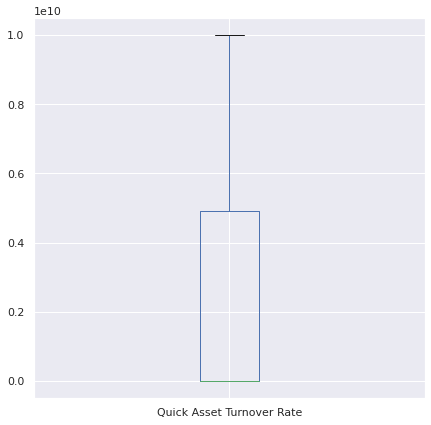

In [ ]:
datos['Quick Asset Turnover Rate'].plot(kind='box')   
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

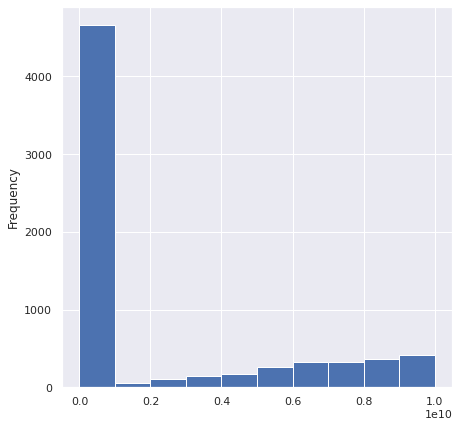

In [ ]:
datos['Quick Asset Turnover Rate'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Quick Asset Turnover Rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.000141

0.00014171486236357698

In [ ]:
datos['Quick Asset Turnover Rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.000224

0.000224772787835798

In [ ]:
datos['Quick Asset Turnover Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  4900000000

4900000000.0

In [ ]:
datos['Quick Asset Turnover Rate'].min()  # el valor mas bajo es cero

0.0

In [ ]:
datos['Quick Asset Turnover Rate'].max()   # el valor mas alto es de 10000000000

10000000000.0

In [ ]:
datos['Quick Asset Turnover Rate'].mode()  

0    6.460000e+09
dtype: float64

In [ ]:
datos['Quick Asset Turnover Rate'].median()  # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a   0.000224

0.000224772787835798

In [ ]:
datos['Quick Asset Turnover Rate'].mean()  # el valor promedio de la caracteristica es de 2163735272

2163735272.034319

In [ ]:
datos['Quick Asset Turnover Rate'].std()   # los valores se alejan del promedio en 3374944402

3374944402.1661186

74.Analisis Exploratorio de la Caracteristica **Working capitcal Turnover Rate**

El índice de rotación del capital de trabajo se calcula dividiendo las ventas anuales netas de la empresa por su capital de trabajo promedio.

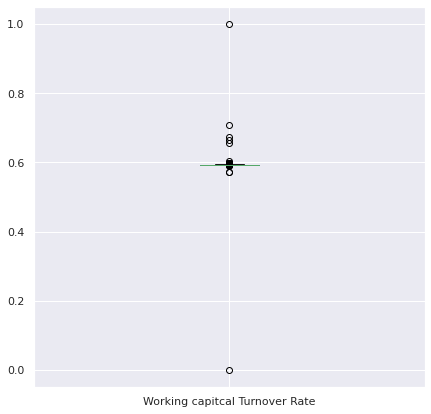

In [ ]:
datos['Working capitcal Turnover Rate'].plot(kind='box')   # se observan valores tipicos, valor minimo igual a cero, y la mediana cercana a 0.6
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

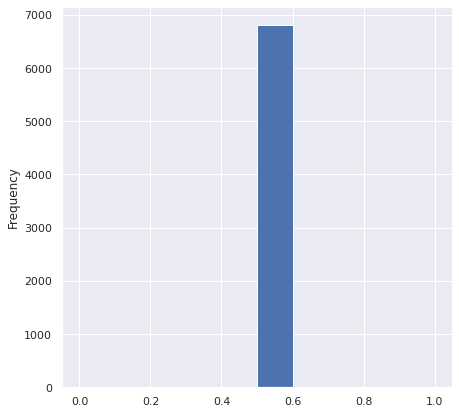

In [ ]:
datos['Working capitcal Turnover Rate'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Working capitcal Turnover Rate'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.59393

0.5939344215587965

In [ ]:
datos['Working capitcal Turnover Rate'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.5939

0.593962767104877

In [ ]:
datos['Working capitcal Turnover Rate'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.594

0.5940023454696104

In [ ]:
datos['Working capitcal Turnover Rate'].min()  # el valor minimo es cero

0.0

In [ ]:
datos['Working capitcal Turnover Rate'].max()   # el valor mas alto 1

1.0

In [ ]:
datos['Working capitcal Turnover Rate'].mode()   # distribucion multimodal 

0       0.000000
1       0.572892
2       0.573381
3       0.588417
4       0.593136
          ...   
6814    0.656489
6815    0.665518
6816    0.674234
6817    0.706978
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Working capitcal Turnover Rate'].median()  # la mediana indica que el 50% de las empresas presentan un valor menor o igual a  0.593

0.593962767104877

In [ ]:
datos['Working capitcal Turnover Rate'].mean()  # el promedio de la caracteristica es 0.594

0.5940062655659166

In [ ]:
datos['Working capitcal Turnover Rate'].std()  # los valores se alejan en 0.0089 del promedio 

0.008959384178922208

75.Analisis Exploratorio de la Caracteristica **Cash Turnover Rate**

El índice de rotación de efectivo es un índice de eficiencia que revela la cantidad de veces que se entrega efectivo en un período contable.

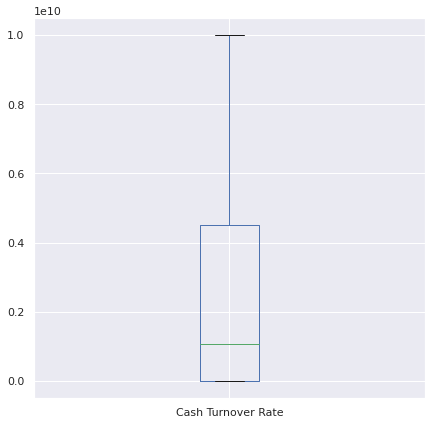

In [ ]:
datos['Cash Turnover Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

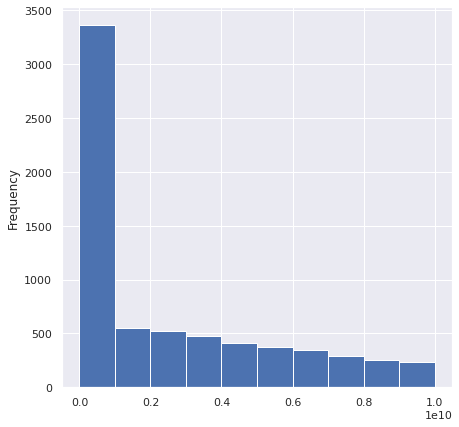

In [ ]:
datos['Cash Turnover Rate'].plot(kind='hist')    # distribucion del tipo positiva
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash Turnover Rate'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.00027

0.00027353373967812047

In [ ]:
datos['Cash Turnover Rate'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  1080000000

1080000000.0

In [ ]:
datos['Cash Turnover Rate'].quantile(0.75)  # indica que el % de las empresas presentan un valor menor o igual a 4510000000

4510000000.0

In [ ]:
datos['Cash Turnover Rate'].min()  # el valor minimo es cero

0.0

In [ ]:
datos['Cash Turnover Rate'].max()   # el valor maximo es de 10000000000

10000000000.0

In [ ]:
datos['Cash Turnover Rate'].mode()   # el valor que mas se repite es 1.940000e+09

0    1.940000e+09
dtype: float64

In [ ]:
datos['Cash Turnover Rate'].median()  # la mediana  indica que el 50% de las empresas presentan un valor menor o igual a  108000000

1080000000.0

In [ ]:
datos['Cash Turnover Rate'].mean()  # el promedio es de 2471976967

2471976967.444247

In [ ]:
datos['Cash Turnover Rate'].std()   # los valores se alejan del promedio en 2938623226

2938623226.6788096

76.Analisis Exploratorio de la Caracteristica **Cash Flow to Sales**
El índice de flujo de efectivo a ventas revela la capacidad de una empresa para generar flujo de efectivo en proporción a su volumen de ventas.

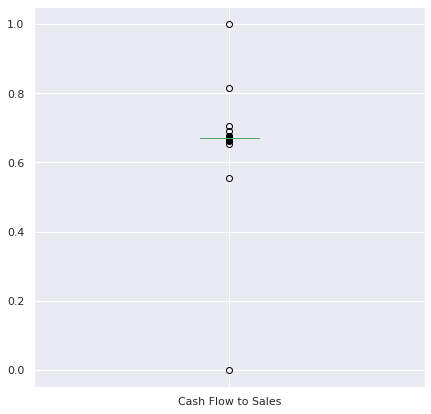

In [ ]:
datos['Cash Flow to Sales'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

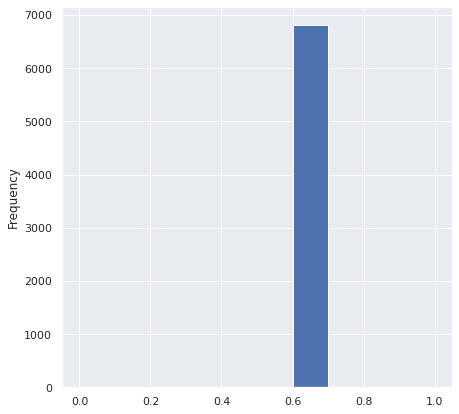

In [ ]:
datos['Cash Flow to Sales'].plot(kind='hist')    # valores concentrados entre 0.65 y 0.7
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash Flow to Sales'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.6715652

0.6715652592532749

In [ ]:
datos['Cash Flow to Sales'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.6715739

0.671573958092574

In [ ]:
datos['Cash Flow to Sales'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.671586

0.6715865804171581

In [ ]:
datos['Cash Flow to Sales'].min()  # el valor minimo es cero 

0.0

In [ ]:
datos['Cash Flow to Sales'].max()  # el valor maximo es 1

1.0

In [ ]:
datos['Cash Flow to Sales'].mode()  # distribucion multimodal, varios numeros se repiten varias veces

0       0.000000
1       0.556054
2       0.652037
3       0.661814
4       0.665617
          ...   
6814    0.675956
6815    0.690841
6816    0.705789
6817    0.814676
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Cash Flow to Sales'].median()  # la mediana ndica que el 50% de las empresas presentan un valor menor o igual a   0.671573

0.671573958092574

In [ ]:
datos['Cash Flow to Sales'].mean()   # el promedio de la caracteristica es 0.671307

0.6715307810992105

In [ ]:
datos['Cash Flow to Sales'].std()   # los valores se alejan del promedio en 0.00934134

0.0093413456183006

77.Analisis Exploratorio de la Caracteristica **Fixed Assets to Assets**

Es una técnica de análisis financiero que muestra en términos porcentuales la parte de los activos totales de su empresa que está vinculada a los activos fijos

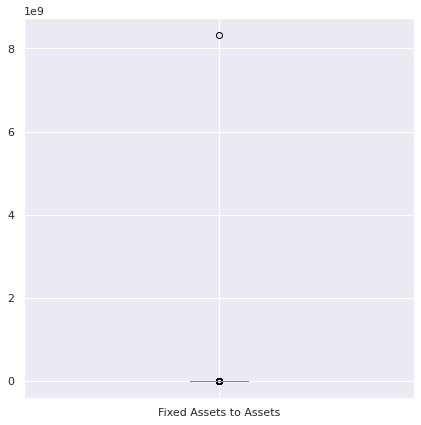

In [ ]:
datos['Fixed Assets to Assets'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

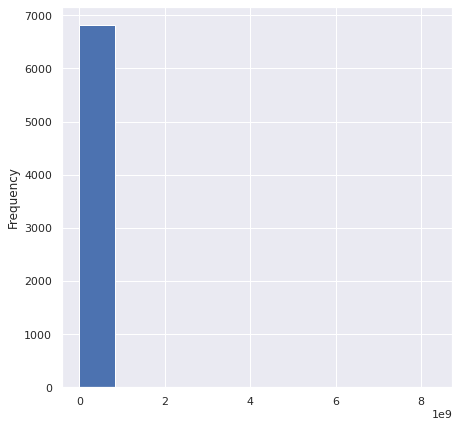

In [ ]:
datos['Fixed Assets to Assets'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Fixed Assets to Assets'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.085

0.0853603651897917

In [ ]:
datos['Fixed Assets to Assets'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1968

0.19688104822441102

In [ ]:
datos['Fixed Assets to Assets'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.37221

0.3721999782647555

In [ ]:
datos['Fixed Assets to Assets'].min()  # el valor minimo es cero

0.0

In [ ]:
datos['Fixed Assets to Assets'].max()  # el valor maximo es 8320000000

8320000000.0

In [ ]:
datos['Fixed Assets to Assets'].mode()  # el valor que mas se repite es cero

0    0.0
dtype: float64

In [ ]:
datos['Fixed Assets to Assets'].median() # # indica que el 50% de las empresas presentan un valor menor o igual a  0.1968

0.19688104822441102

In [ ]:
datos['Fixed Assets to Assets'].mean()  # el promedio es de 1220120

1220120.5015895523

In [ ]:
datos['Fixed Assets to Assets'].std()  # los valores se alejan del promedio en 100754158

100754158.71316805

78.Analisis Exploratorio de la Caracteristica **Current Liability to Liability**

Los pasivos corrientes son obligaciones financieras de una entidad comercial que vencen y son pagaderas dentro de un año.
Este Ratio brinda una proporción del peso de los Current liability sobre el total de los compromisos

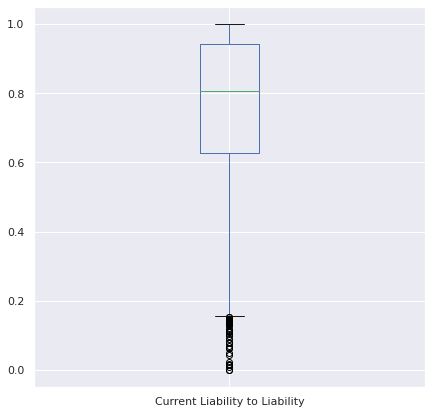

In [ ]:
datos['Current Liability to Liability'].plot(kind='box')   # se observan valores atipicos , median acercana a  0.8
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

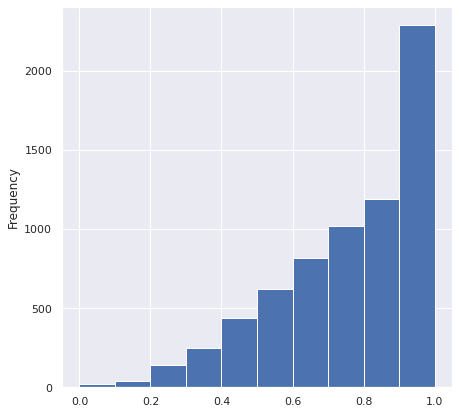

In [ ]:
datos['Current Liability to Liability'].plot(kind='hist')    # distribucion del tipo negativa, concentrcion de valores hacia la derecha
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Liability to Liability'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.6269

0.6269807662218725

In [ ]:
datos['Current Liability to Liability'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.8068

0.8068814047133329

In [ ]:
datos['Current Liability to Liability'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.9420

0.9420266937000692

In [ ]:
datos['Current Liability to Liability'].min()   # el valos minimo es cero

0.0

In [ ]:
datos['Current Liability to Liability'].max()   # el valor mas alto es 1

1.0

In [ ]:
datos['Current Liability to Liability'].mode()   # el valor que mas se repite es 1

0    1.0
dtype: float64

In [ ]:
datos['Current Liability to Liability'].median()   # indica que el 50% de las empresas presentan un valor menor o igual a  0.8068

0.8068814047133329

In [ ]:
datos['Current Liability to Liability'].mean()   # el promedio es de 0.76159

0.761598877585336

In [ ]:
datos['Current Liability to Liability'].std()   # los valores se alejan del promedio en 0.20667

0.20667676768344168

79.Analisis Exploratorio de la Caracteristica **Current Liability to Equity**

La relación D / E es una métrica importante utilizada en las finanzas corporativas. Es una medida del grado en que una empresa está financiando sus operaciones a través de deuda frente a fondos de propiedad total.

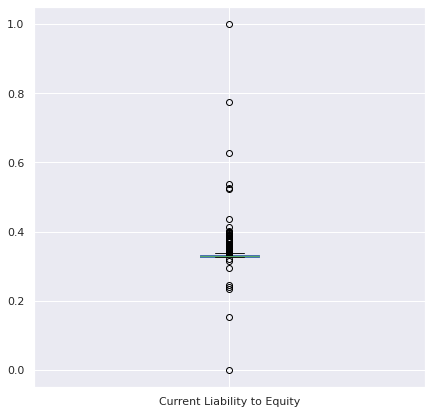

In [ ]:
datos['Current Liability to Equity'].plot(kind='box')   # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

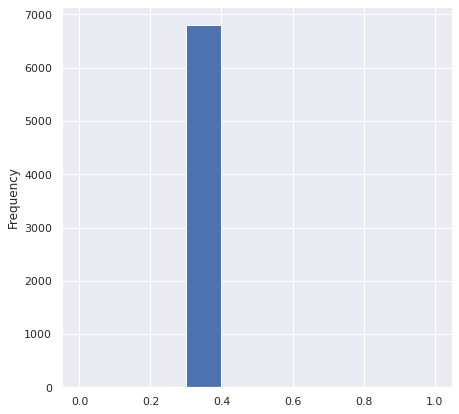

In [ ]:
datos['Current Liability to Equity'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Liability to Equity'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.32809

0.328095841686878

In [ ]:
datos['Current Liability to Equity'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.3296

0.32968513313592895

In [ ]:
datos['Current Liability to Equity'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.3323

0.332322404809702

In [ ]:
datos['Current Liability to Equity'].min()  # el valor minimo es cero

0.0

In [ ]:
datos['Current Liability to Equity'].max()   # l valor mas alto es 1

1.0

In [ ]:
datos['Current Liability to Equity'].mode()   # distriucion multimodal , valores que se repiten muchas veces

0       0.000000
1       0.153811
2       0.234391
3       0.241053
4       0.246325
          ...   
6814    0.526052
6815    0.536635
6816    0.627817
6817    0.775890
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Current Liability to Equity'].median()  # indica que el 50 de las empresas presentan un valor menor o igual a   0.929685

0.32968513313592895

In [ ]:
datos['Current Liability to Equity'].mean()   # el promedio es de 0.3314

0.33140980061698955

In [ ]:
datos['Current Liability to Equity'].std()  # los valores se alejan del promedio en 0.0134

0.013488027908897839

80.Analisis Exploratorio de la Caracteristica **Equity to Long-term Liability**

Un índice de apalancamiento que compara el monto total de la deuda a largo plazo con el capital contable de una empresa. El objetivo de esta relación es determinar cuánto apalancamiento está tomando la empresa.

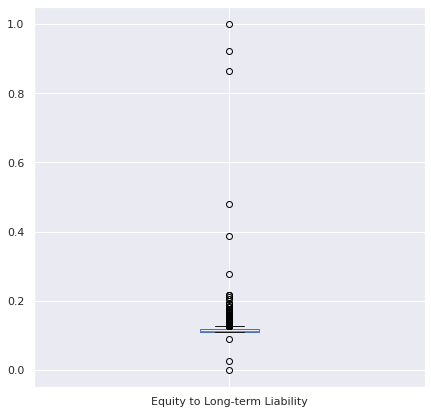

In [ ]:
datos['Equity to Long-term Liability'].plot(kind='box')   # presenta valores atipicos
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

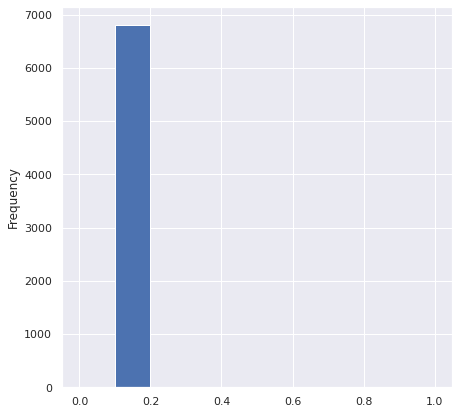

In [ ]:
datos['Equity to Long-term Liability'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Equity to Long-term Liability'].quantile(0.25)   # indica que el 25% de las empresas presentan un valor menor o igual a  0.1109

0.11093323366346801

In [ ]:
datos['Equity to Long-term Liability'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1123

0.11234000402497199

In [ ]:
datos['Equity to Long-term Liability'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.1171

0.11710609107562599

In [ ]:
datos['Equity to Long-term Liability'].min()  # el valor minimo es uno

0.0

In [ ]:
datos['Equity to Long-term Liability'].max()   # el valos mas alto es 1

1.0

In [ ]:
datos['Equity to Long-term Liability'].mode()  # el valor que mas se repite es 0.1109

0    0.110933
dtype: float64

In [ ]:
datos['Equity to Long-term Liability'].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  0.1123

0.11234000402497199

In [ ]:
datos['Equity to Long-term Liability'].mean()  # el promedio es 0.1156

0.11564465149636367

In [ ]:
datos['Equity to Long-term Liability'].std()  # los valores se alejan del promedio en 0.0195

0.019529176275314326

81.Analisis Exploratorio de la Caracteristica **Cash Flow to Total Assets**

El flujo de efectivo sobre los activos totales es un índice de eficiencia que califica realmente los flujos de efectivo a los activos de la empresa sin verse afectado por el reconocimiento de ingresos o las mediciones de ingresos.

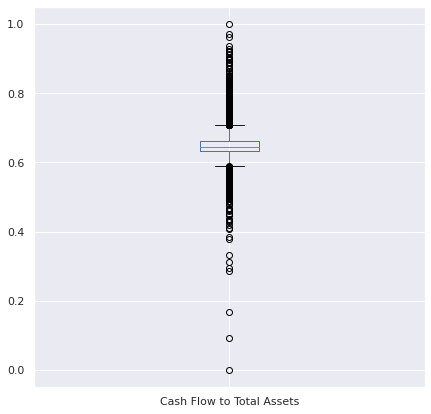

In [ ]:
datos['Cash Flow to Total Assets'].plot(kind='box')   # se presentan valores atipicos, con una median cercana a 0.64
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

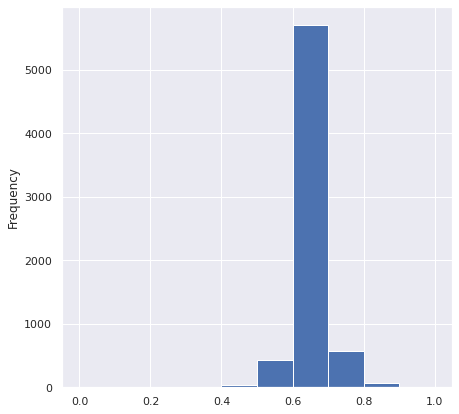

In [ ]:
datos['Cash Flow to Total Assets'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash Flow to Total Assets'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.6332

0.633265319013864

In [ ]:
datos['Cash Flow to Total Assets'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.6453

0.6453664602707211

In [ ]:
datos['Cash Flow to Total Assets'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a 0.663

0.6630618534616088

In [ ]:
datos['Cash Flow to Total Assets'].min()  # el valor minimo es cero

0.0

In [ ]:
datos['Cash Flow to Total Assets'].max()  # el valos mas alto 1

1.0

In [ ]:
datos['Cash Flow to Total Assets'].mode()   # multimodal, varios valores que se repiten mucho

0       0.000000
1       0.092089
2       0.167678
3       0.284804
4       0.295268
          ...   
6814    0.928821
6815    0.935312
6816    0.963456
6817    0.970411
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Cash Flow to Total Assets'].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  0.6453

0.6453664602707211

In [ ]:
datos['Cash Flow to Total Assets'].mean()  # el promedio es 0.6497

0.6497305901792345

In [ ]:
datos['Cash Flow to Total Assets'].std()  # los valores se alejan del promedio en 0.0473

0.047372131914504984

82.Analisis Exploratorio de la Caracteristica **Cash Flow to Liability**

La relación entre el flujo de efectivo y la deuda compara el flujo de efectivo generado por las operaciones de una empresa con su deuda total. La relación flujo de efectivo a deuda indica cuánto tiempo le tomaría a una empresa pagar toda su deuda si utilizara todo su flujo de efectivo operativo para el pago de la deuda.

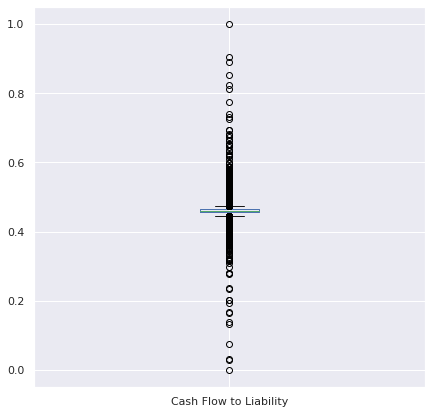

In [ ]:
datos['Cash Flow to Liability'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

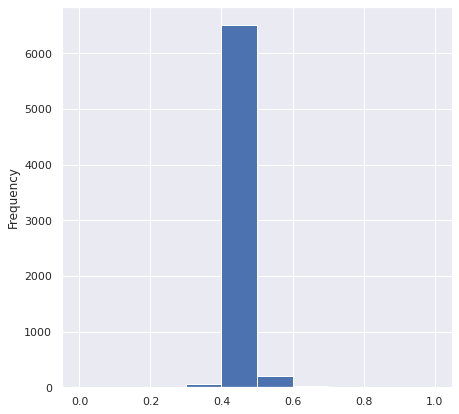

In [ ]:
datos['Cash Flow to Liability'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash Flow to Liability'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.4571

0.4571164765642225

In [ ]:
datos['Cash Flow to Liability'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.45975

0.459750137932885

In [ ]:
datos['Cash Flow to Liability'].quantile(0.75)   # indica que el 75% de las empresas presentan un valor menor o igual a   0.464

0.4642358469715285

In [ ]:
datos['Cash Flow to Liability'].min()  # el valor mas bajo es cero

0.0

In [ ]:
datos['Cash Flow to Liability'].max()  # el valor mas alto es 1

1.0

In [ ]:
datos['Cash Flow to Liability'].mode()  # multimodal , varios numeros que se repiten mucho

0       0.000000
1       0.028056
2       0.032583
3       0.073969
4       0.132339
          ...   
6814    0.823793
6815    0.851406
6816    0.889652
6817    0.905120
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Cash Flow to Liability'].median() # indica que el 50% de las empresas presentan un valor menor o igual a  04597

0.459750137932885

In [ ]:
datos['Cash Flow to Liability'].mean()  # el promedio es de 0.461849

0.46184925329225796

In [ ]:
datos['Cash Flow to Liability'].std()  # los valores se alejan del promedio en 0.02994

0.029942680345244797

83.Analisis Exploratorio de la Caracteristica **CFO to Assets**

Es un índice de eficiencia que califica los flujos de efectivo a los activos de la empresa sin verse afectado por el reconocimiento de ingresos o las mediciones de ingresos.

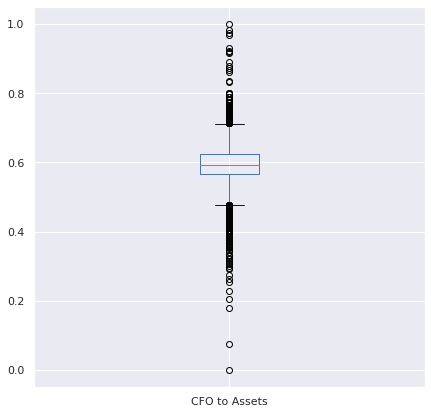

In [ ]:
datos['CFO to Assets'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

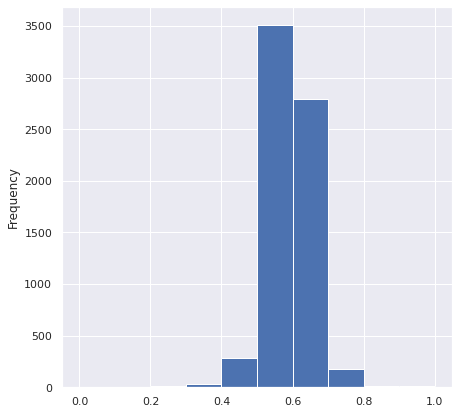

In [ ]:
datos['CFO to Assets'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['CFO to Assets'].quantile(0.25)  # indica que el  25% de las empresas presentan un valor menor o igual a  0.565

0.5659869401753584

In [ ]:
datos['CFO to Assets'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.5932

0.5932662740835439

In [ ]:
datos['CFO to Assets'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.624

0.6247688757833556

In [ ]:
datos['CFO to Assets'].min()  # el valor mas bajo es 0

0.0

In [ ]:
datos['CFO to Assets'].max()   # el valor mas alto es 1

1.0

In [ ]:
datos['CFO to Assets'].mode()   # multimodal ,  valores que se repiten varias veces

0       0.000000
1       0.074249
2       0.178074
3       0.205248
4       0.227030
          ...   
6814    0.931068
6815    0.967086
6816    0.975197
6817    0.983205
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['CFO to Assets'].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  0.593

0.5932662740835439

In [ ]:
datos['CFO to Assets'].mean()  # el promedio es 0.593

0.5934150861096208

In [ ]:
datos['CFO to Assets'].std()  # la desviacion indica en cuanto se alejan los valores del promedio en 0.0585

0.05856055014224863

84.Analisis Exploratorio de la Caracteristica **Cash Flow to Equity**

El flujo de efectivo a capital es una medida de cuánto efectivo está disponible para los accionistas de capital de una empresa después de que se paguen todos los gastos, reinversiones y deudas.

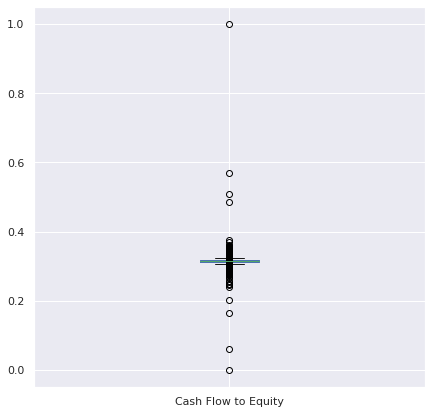

In [ ]:
datos['Cash Flow to Equity'].plot(kind='box')   # se observan valores atipicos  Q1 = 0.3112  Q3 0.3177, concetracion de valores entre 0.3 y 0.4
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

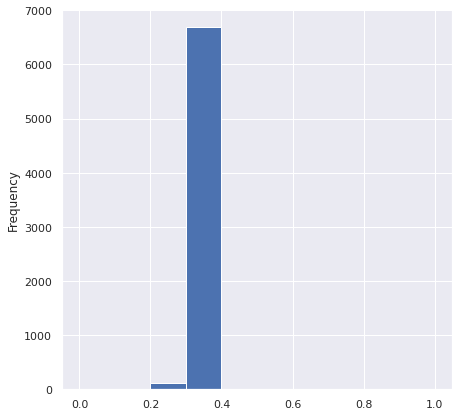

In [ ]:
datos['Cash Flow to Equity'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Cash Flow to Equity'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a 0.3129

0.312994699600273

In [ ]:
datos['Cash Flow to Equity'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a 0.3149

0.314952752072916

In [ ]:
datos['Cash Flow to Equity'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.3177

0.317707188742567

In [ ]:
datos['Cash Flow to Equity'].min()   # el valor minimo 0 

0.0

In [ ]:
datos['Cash Flow to Equity'].max()  # valor maximo es 1 

1.0

In [ ]:
datos['Cash Flow to Equity'].mode()  # varios numeros que se repiten varias veces

0       0.000000
1       0.061964
2       0.165342
3       0.202312
4       0.240450
          ...   
6814    0.376404
6815    0.485367
6816    0.508866
6817    0.569231
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Cash Flow to Equity'].median()  # indica que el  50 % de las empresas presentan un valor menor o igual a 0.3149

0.314952752072916

In [ ]:
datos['Cash Flow to Equity'].mean()  # el prdio de cash flow to equity es de 0.31558

0.31558238989957665

In [ ]:
datos['Cash Flow to Equity'].std()   # los valores se alejan del promedio en 0.012

0.012960892401647255

85.Analisis Exploratorio de la Caracteristica **Current Liability to Current Assets**

Realiza una comparación de los compromisos circulantes con los Activos circulantes.

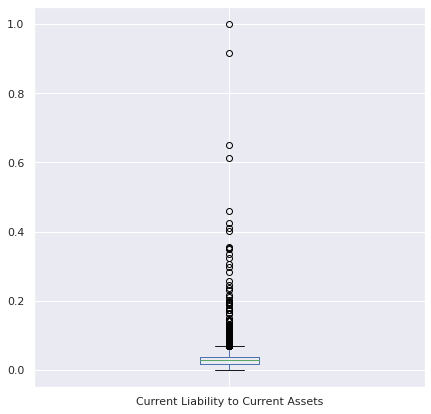

In [ ]:
datos['Current Liability to Current Assets'].plot(kind='box')   # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

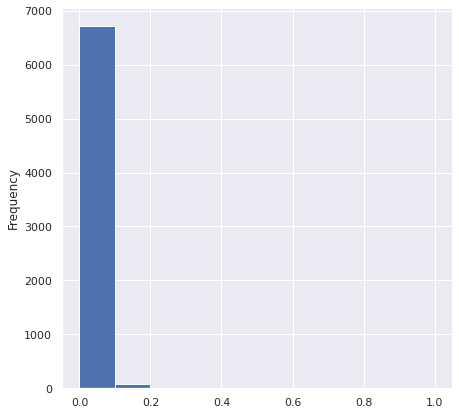

In [ ]:
datos['Current Liability to Current Assets'].plot(kind='hist')    # dsitribucion del tipo positiva
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Current Liability to Current Assets'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.018

0.018033665707965

In [ ]:
datos['Current Liability to Current Assets'].quantile(0.5)   # indica que el 50% de las empresas presentan un valor menor o igual a  0.02759

0.0275971428517009

In [ ]:
datos['Current Liability to Current Assets'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.0383

0.0383746158541899

In [ ]:
datos['Current Liability to Current Assets'].min()  # el valor mas bajo es 0

0.0

In [ ]:
datos['Current Liability to Current Assets'].max()  # el valor mas alto es de 1

1.0

In [ ]:
datos['Current Liability to Current Assets'].mode()  # multimodal varios numeros que se repiten mucho

0       0.000000
1       0.000122
2       0.000214
3       0.000220
4       0.000279
          ...   
6814    0.460675
6815    0.611724
6816    0.650661
6817    0.916814
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Current Liability to Current Assets'].median() # indica que el 50% de las empresas presentan un valor menor o igual a  0.0275

0.0275971428517009

In [ ]:
datos['Current Liability to Current Assets'].mean()  # el promedio es de 0.0315

0.031506365747440715

In [ ]:
datos['Current Liability to Current Assets'].std()  # los valores se alejan del promedio en 0.03084

0.030844688453563838

86.Analisis Exploratorio de la Caracteristica **Liability-Assets Flag**

indica el estado de una organización, donde si el pasivo total excede los activos totales, el valor marcado será 1, de lo contrario el valor es 0. La mayoría de las veces, los activos de las organizaciones / empresas son más que sus pasivo.

Una bandera roja es una advertencia o indicador que sugiere que existe un problema o amenaza potencial con las acciones, los estados financieros o los informes de noticias de una empresa. Las señales de alerta pueden ser cualquier característica indeseable que se destaque para un analista o inversor.

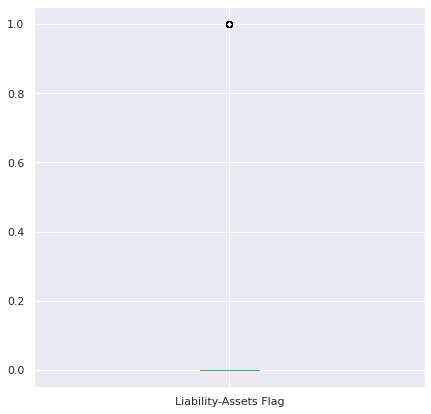

In [ ]:
datos['Liability-Assets Flag'].plot(kind='box')    # caracteristica binaria , la moda es 0
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

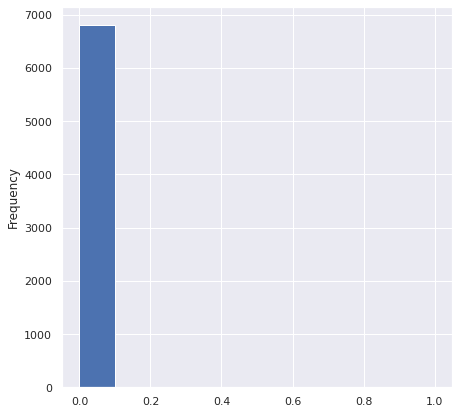

In [ ]:
datos['Liability-Assets Flag'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Liability-Assets Flag'].quantile(0.25)

0.0

In [ ]:
datos['Liability-Assets Flag'].quantile(0.5)

0.0

In [ ]:
datos['Liability-Assets Flag'].quantile(0.75)

0.0

In [ ]:
datos['Liability-Assets Flag'].mode()  # el valor que mas se repite es 0

0    0
dtype: int64

87.Analisis Exploratorio de la Caracteristica **Net Income to Total Assets**

El rendimiento de los activos (ROA) es un índice financiero que muestra el porcentaje de ganancias que obtiene una empresa en relación con sus recursos generales. Se define comúnmente como el ingreso neto dividido por los activos totales.

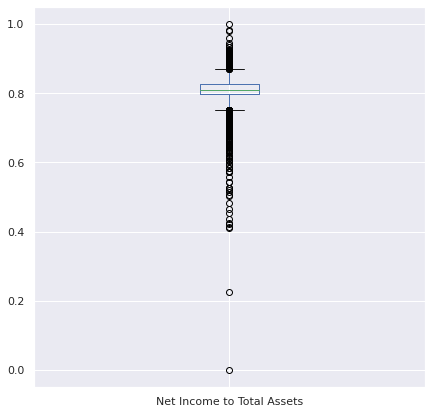

In [ ]:
datos['Net Income to Total Assets'].plot(kind='box')  # se observan valores atipicos , con una mediana cercana a 0.8
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

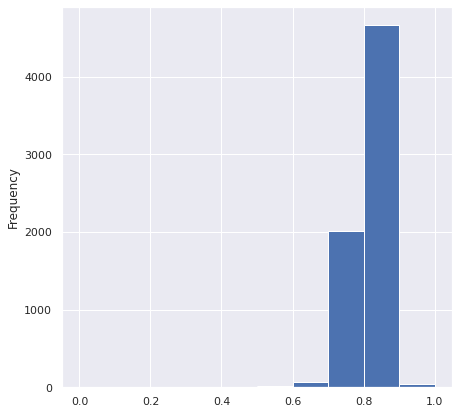

In [ ]:
datos['Net Income to Total Assets'].plot(kind='hist')    # distribucion tipo negativa
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Net Income to Total Assets'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.796

0.7967498491931704

In [ ]:
datos['Net Income to Total Assets'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.8106

0.8106190420751009

In [ ]:
datos['Net Income to Total Assets'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.8264

0.8264545295408714

In [ ]:
datos['Net Income to Total Assets'].min()  # el valor mas bajo es 0

0.0

In [ ]:
datos['Net Income to Total Assets'].max()  # el valor es mas alto es 1

1.0

In [ ]:
datos['Net Income to Total Assets'].mode()   # multimodal, varios valores que se repitan mucho

0       0.000000
1       0.224792
2       0.411809
3       0.412621
4       0.420995
          ...   
6814    0.944328
6815    0.959320
6816    0.981315
6817    0.982879
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Net Income to Total Assets'].median() # indica que el 50% de las empresas presentan un valor menor o igual a  0.8106

0.8106190420751009

In [ ]:
datos['Net Income to Total Assets'].mean()  # el promedio es de 0.8077

0.807760220036551

In [ ]:
datos['Net Income to Total Assets'].std()  # los valores se alejan del promedio en 0.0403

0.0403321915314262

88.Analisis Exploratorio de la Caracteristica **Total assets to GNP price**

Esta caracteristica parece ser un proceso reexpresión por efecto de moneda.
(Índice de nivel de precios de activos totales / PNB), una medida de activos reales (RASSET) y Talla. Dado que los activos totales se informan en dólares

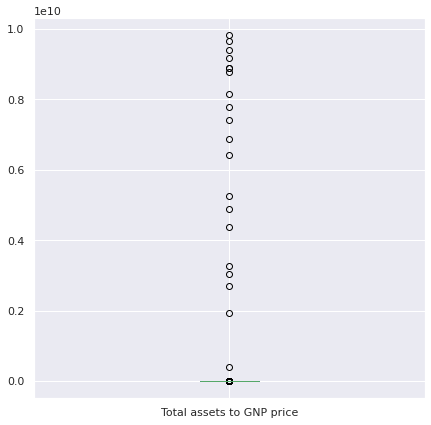

In [ ]:
datos['Total assets to GNP price'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})                    # se observa valores atipicos 
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

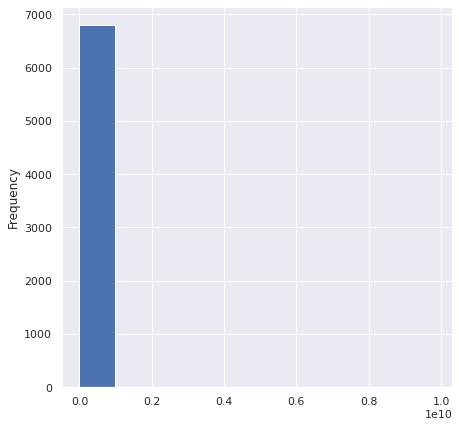

In [ ]:
datos['Total assets to GNP price'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Total assets to GNP price'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.000903

0.000903620481330612

In [ ]:
datos['Total assets to GNP price'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.002085

0.00208521270881575

In [ ]:
datos['Total assets to GNP price'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.00826

0.0052697768568805495

In [ ]:
datos['Total assets to GNP price'].min()  # valor mas bajo es 0

0.0

In [ ]:
datos['Total assets to GNP price'].max()  # el valor mas alto es 9820000000

9820000000.0

In [ ]:
datos['Total assets to GNP price'].mode()  # el valos que mas se repite es 0.003661

0    0.003661
dtype: float64

In [ ]:
datos['Total assets to GNP price'].median()   # indica que el 50 % de las empresas presentan un valor menor o igual a  0.00208

0.00208521270881575

In [ ]:
datos['Total assets to GNP price'].mean()   # el promedio es de 18629417

18629417.811835933

In [ ]:
datos['Total assets to GNP price'].std()  # los valores se pueden alejar del promedio en 376450059

376450059.74582857

89.Analisis Exploratorio de la Caracteristica **No-credit Interval**

Indica durante cuánto tiempo la empresa podría satisfacer las necesidades operativas de su stock de activos defensivos después de liquidar todos los pasivos corrientes existentes y pagar en efectivo todas las adquisiciones futuras.


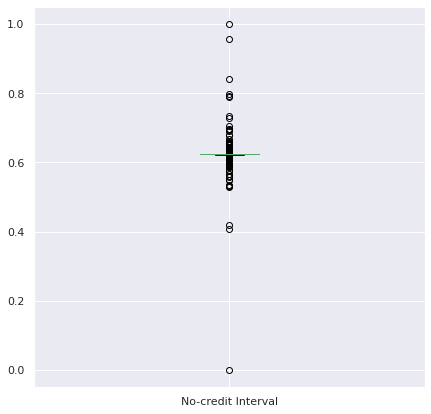

In [ ]:
datos['No-credit Interval'].plot(kind='box')     # se observan valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

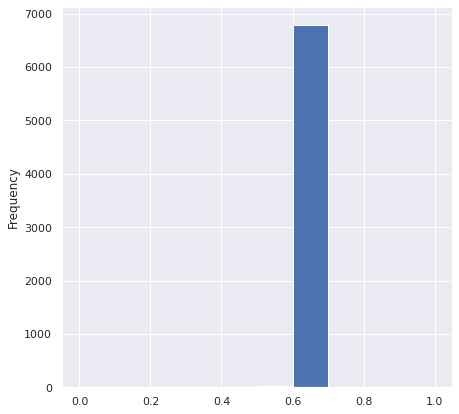

In [ ]:
datos['No-credit Interval'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['No-credit Interval'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.6236

0.6236363049739091

In [ ]:
datos['No-credit Interval'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.6238

0.6238792259877121

In [ ]:
datos['No-credit Interval'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a 0.624

0.6241681927893561

In [ ]:
datos['No-credit Interval'].min()   # el valor minimo es cero

0.0

In [ ]:
datos['No-credit Interval'].max()  # el valor mas alto es 1

1.0

In [ ]:
datos['No-credit Interval'].mode()  # distribucion multimodal 

0       0.000000
1       0.408682
2       0.419045
3       0.528279
4       0.531839
          ...   
6814    0.792048
6815    0.797385
6816    0.841360
6817    0.956387
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['No-credit Interval'].median() # indica que el 50% de las empresas presentan un valor menor o igual a  0.6238

0.6238792259877121

In [ ]:
datos['No-credit Interval'].mean()   # el promedio es 0.623914

0.623914574767535

In [ ]:
datos['No-credit Interval'].std()  # los valores se desbian del promedio en 0.6239

0.012289548007412275

90.Analisis Exploratorio de la Caracteristica **Gross Profit to Sales**

La ganancia bruta sirve como métrica financiera utilizada para determinar la rentabilidad bruta de una operación comercial.

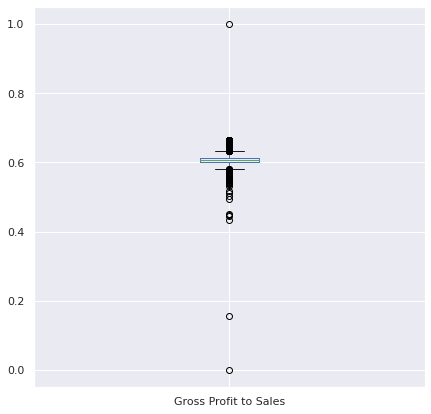

In [ ]:
datos['Gross Profit to Sales'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

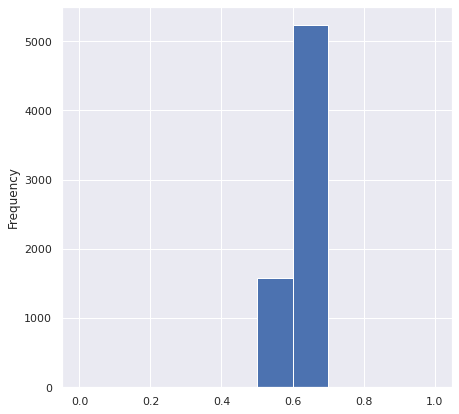

In [ ]:
datos['Gross Profit to Sales'].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Gross Profit to Sales'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.6004

0.6004428952063054

In [ ]:
datos['Gross Profit to Sales'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.6059

0.605998288167218

In [ ]:
datos['Gross Profit to Sales'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.6139

0.613913271038147

In [ ]:
datos['Gross Profit to Sales'].min()  # valos minimo es 0

0.0

In [ ]:
datos['Gross Profit to Sales'].max()   # el valor mas alto es 1

1.0

In [ ]:
datos['Gross Profit to Sales'].mode()  # el valor que mas se repite es 0.665149

0    0.665149
dtype: float64

In [ ]:
datos['Gross Profit to Sales'].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  .6059

0.605998288167218

In [ ]:
datos['Gross Profit to Sales'].mean()   # el promedio es 0.6079

0.6079463402707161

In [ ]:
datos['Gross Profit to Sales'].std()  # los valores se desvian del promedio en 0.0169

0.01693380779567362

91.Analisis Exploratorio de la Caracteristica **Net Income to Stockholder's Equity**

El rendimiento sobre el capital (ROE) es una medida del desempeño financiero que se calcula dividiendo la utilidad neta por el capital contable. Dado que el capital contable es igual a los activos de una empresa menos su deuda, el ROE se considera el rendimiento de los activos netos.

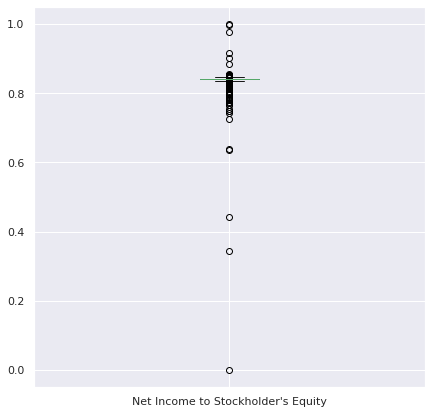

In [ ]:
datos["Net Income to Stockholder's Equity"].plot(kind='box')   # se observan valores atipicos , mediana cercana a 0.84
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

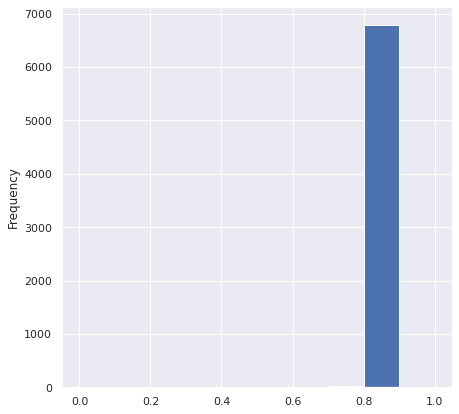

In [ ]:
datos["Net Income to Stockholder's Equity"].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos["Net Income to Stockholder's Equity"].quantile(0.25) # indica que el 25% de las empresas presentan un valor menor o igual a  0.84101

0.8401148040637194

In [ ]:
datos["Net Income to Stockholder's Equity"].quantile(0.5) # indica que el 50% de las empresas presentan un valor menor o igual a  0.84117

0.841178760250192

In [ ]:
datos["Net Income to Stockholder's Equity"].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.8423

0.8423569700412374

In [ ]:
datos["Net Income to Stockholder's Equity"].min()  # el valor mas bajo es cero

0.0

In [ ]:
datos["Net Income to Stockholder's Equity"].max()   # el valor mas alto es 1

1.0

In [ ]:
datos["Net Income to Stockholder's Equity"].mode()  # distribucion multimodal 

0       0.000000
1       0.344652
2       0.442176
3       0.634587
4       0.637576
          ...   
6814    0.902744
6815    0.916329
6816    0.976180
6817    0.996912
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos["Net Income to Stockholder's Equity"].median() # indica que el 50% de las empresas presentan un valor menor o igual a  0.8411

0.841178760250192

In [ ]:
datos["Net Income to Stockholder's Equity"].mean()  # el promedio es 0.8404

0.8404020646301001

In [ ]:
datos["Net Income to Stockholder's Equity"].std()  # los valores se desvian e 0.01452

0.014522526082524962

92.Analisis Exploratorio de la Caracteristica **Liability to Equity**

compara los pasivos totales de una empresa con el capital contable y se puede utilizar para evaluar cuánto apalancamiento está utilizando una empresa

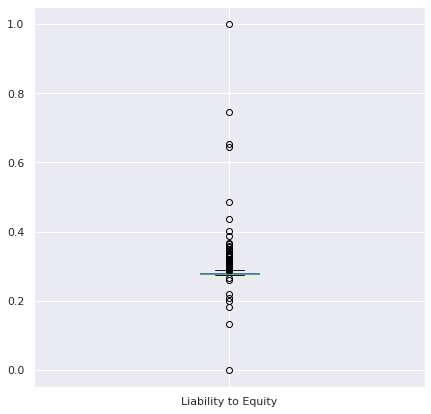

In [ ]:
datos["Liability to Equity"].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

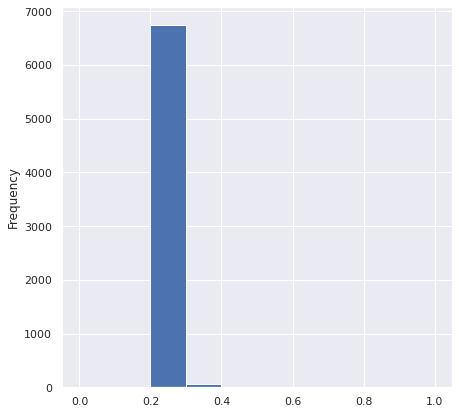

In [ ]:
datos["Liability to Equity"].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos["Liability to Equity"].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.2769

0.276944242646329

In [ ]:
datos["Liability to Equity"].quantile(0.5) # indica que el 50% de las empresas presentan un valor menor o igual a  0.2787

0.27877758362963695

In [ ]:
datos["Liability to Equity"].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.2814

0.28144918560882654

In [ ]:
datos["Liability to Equity"].min()   # el valor minimo es cero

0.0

In [ ]:
datos["Liability to Equity"].max()  # el valor mas alto es 1

1.0

In [ ]:
datos["Liability to Equity"].mode()   # multimodal, varios numeros que se repiten varias veces

0       0.000000
1       0.133503
2       0.182790
3       0.199162
4       0.209222
          ...   
6814    0.484318
6815    0.643692
6816    0.652347
6817    0.745352
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos["Liability to Equity"].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  0.2787

0.27877758362963695

In [ ]:
datos["Liability to Equity"].mean()  # el promedio de la caracteristica es 0.28036

0.28036515383339244

In [ ]:
datos["Liability to Equity"].std()   # los valores se alejan del promedio en 0.014

0.01446322357559402

93.Analisis Exploratorio de la Caracteristica **Degree of Financial Leverage (DFL)**

El grado de apalancamiento financiero (DFL) es un índice de apalancamiento que mide la sensibilidad de las ganancias por acción de una empresa a las fluctuaciones en sus ingresos operativos, como resultado de cambios en su estructura de capital.

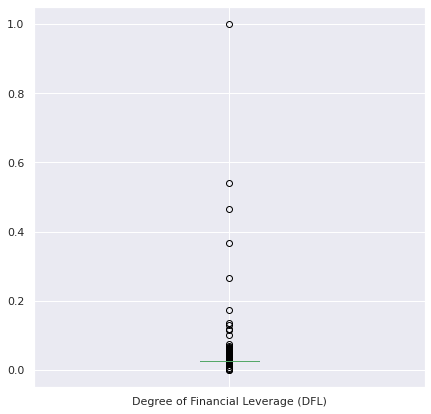

In [ ]:
datos["Degree of Financial Leverage (DFL)"].plot(kind='box')   # valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

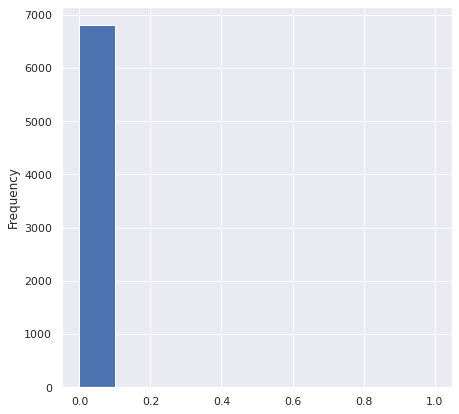

In [ ]:
datos["Degree of Financial Leverage (DFL)"].plot(kind='hist')    # distribucion del tipo positiva , valores concentrados hacia la izquierda
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos["Degree of Financial Leverage (DFL)"].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.02679

0.0267911566924924

In [ ]:
datos["Degree of Financial Leverage (DFL)"].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.02680

0.0268081258982465

In [ ]:
datos["Degree of Financial Leverage (DFL)"].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.02691

0.026913184214613348

In [ ]:
datos["Degree of Financial Leverage (DFL)"].min()  # el valor minimo es 0

0.0

In [ ]:
datos["Degree of Financial Leverage (DFL)"].max()  # el valor maximo es 1

1.0

In [ ]:
datos["Degree of Financial Leverage (DFL)"].mode()   # el valor que mas se repite es 0.026

0    0.026791
dtype: float64

In [ ]:
datos["Degree of Financial Leverage (DFL)"].median() # indica que el 50 % de las empresas presentan un valor menor o igual a  0.026

0.0268081258982465

In [ ]:
datos["Degree of Financial Leverage (DFL)"].mean()  # el promedio es de 0.0275

0.02754111942120396

In [ ]:
datos["Degree of Financial Leverage (DFL)"].std()  # los valores se alejan del promedio en 0.0156

0.01566794186642957

94.Analisis Exploratorio de la Caracteristica **Interest Coverage Ratio (Interest expense to EBIT)**

El índice de cobertura de intereses se calcula dividiendo las ganancias de una empresa antes de intereses e impuestos (EBIT) por su gasto por intereses durante un período determinado. El índice de cobertura de intereses a veces se denomina índice multiplicado por intereses devengados (TIE).

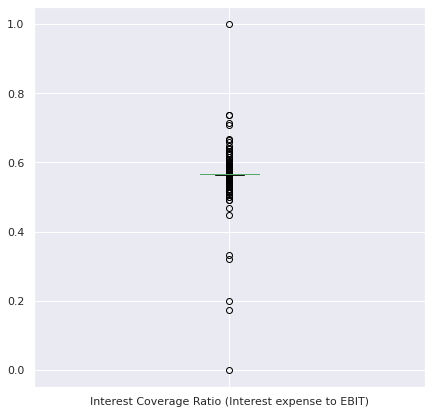

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].plot(kind='box')   # valores atipicios 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

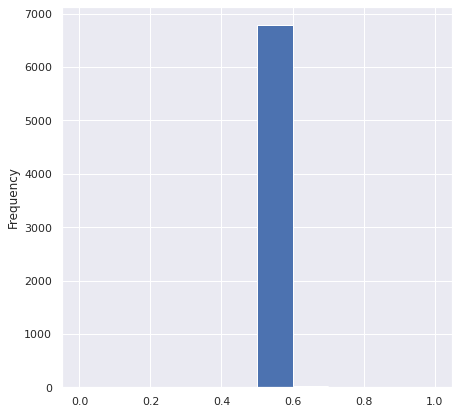

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a  0.56515

0.5651583957576041

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.56525

0.565251928758969

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.05657

0.565724709506105

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].min()   # el valor minimo es 0

0.0

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].max()  # el valor maximo es 1

1.0

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].mode()  # el valor que mas se repite es 0.565158

0    0.565158
dtype: float64

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].median()  # indica que el 50% de las empresas presentan un valor menor o igual a  0.56525192

0.565251928758969

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].mean()  # el promedio la caracteristica es 0.56535793

0.5653579335465493

In [ ]:
datos["Interest Coverage Ratio (Interest expense to EBIT)"].std()  # los valores se alejan del promedio en 0.0132142

0.013214239761962017

95.Analisis Exploratorio de la Caracteristica **Net Income Flag**

La bandera de "Ingresos netos" denota el estado de los ingresos de una organización en los últimos dos años, donde si los ingresos netos son negativos durante los últimos dos años, el valor marcado será 1, de lo contrario el valor es 0. Observamos que todos los Los registros han estado mostrando pérdidas durante los últimos dos años.

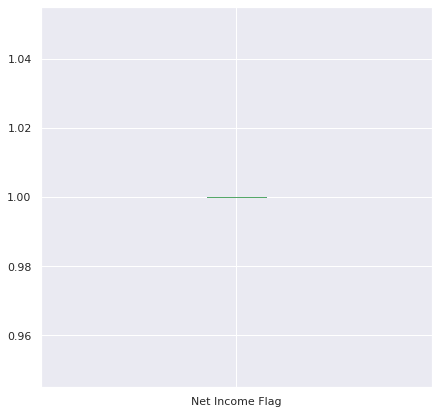

In [ ]:
datos["Net Income Flag"].plot(kind='box')   # caracteristica binaria
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

In [ ]:
datos['Net Income Flag'].quantile(0.25)

1.0

In [ ]:
datos['Net Income Flag'].quantile(0.5)

1.0

In [ ]:
datos['Net Income Flag'].quantile(0.75)

1.0

In [ ]:
datos['Net Income Flag'].mode()   # el valor que mas se repite es 1

0    1
dtype: int64

96.Analisis Exploratorio de la Caracteristica **Equity to Liability**

La relación deuda-capital (D / E) se utiliza para evaluar el apalancamiento financiero de una empresa y se calcula dividiendo los pasivos totales de una empresa por su capital social.

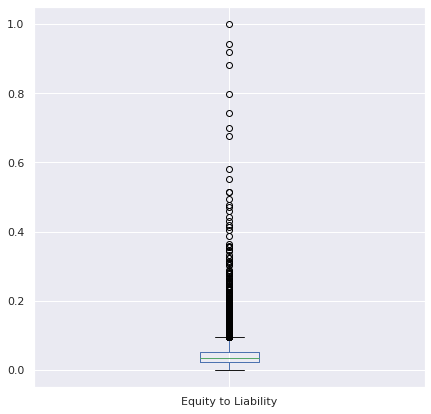

In [ ]:
datos["Equity to Liability"].plot(kind='box')   # valores atipicos 
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Histograma y Medidas de tendencia central y otros valores de relevancia en el análisis

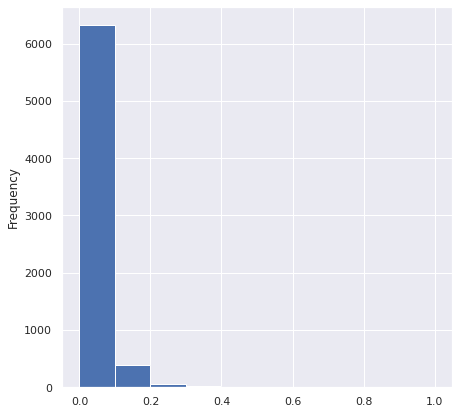

In [ ]:
datos["Equity to Liability"].plot(kind='hist')  
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [ ]:
datos['Equity to Liability'].quantile(0.25)  # indica que el 25% de las empresas presentan un valor menor o igual a   0.0244

0.024476693570910098

In [ ]:
datos['Equity to Liability'].quantile(0.5)  # indica que el 50% de las empresas presentan un valor menor o igual a  0.03379

0.0337976972031022

In [ ]:
datos['Equity to Liability'].quantile(0.75)  # indica que el 75% de las empresas presentan un valor menor o igual a  0.05283

0.052837817459331596

In [ ]:
datos['Equity to Liability'].min()   # el valor minimo es cero

0.0

In [ ]:
datos['Equity to Liability'].max()  # el valor mas alto es 1

1.0

In [ ]:
datos['Equity to Liability'].mode()  # distribucion de los valores multimodal, varios valores se repiten mucho

0       0.000000
1       0.003946
2       0.008500
3       0.008753
4       0.008950
          ...   
6814    0.798122
6815    0.881018
6816    0.920638
6817    0.942729
6818    1.000000
Length: 6819, dtype: float64

In [ ]:
datos['Equity to Liability'].median()  # indica que el 50 % de las empresas presentan un valor menor o igual a  0.033797

0.0337976972031022

In [ ]:
datos['Equity to Liability'].mean()   # el promedio es de 0.0475

0.04757835652949777

In [ ]:
datos['Equity to Liability'].std()   # los valores se alejan del promedio en 0.05001

0.05001371618013793

## Tablas Pivote y Gráficas

Recordemos que **Bankrupt?**: Aparece como una caracteristica binaria, en donde si indica cero 0, nos dice que la empresa es competente, mientras que si el valor es 1, nos indica que es probable que la empresa caiga en banca rota.

Tabla #1  Ver Según la Categoria de **Bankrupt**

In [ ]:
print(datos["Bankrupt?"].value_counts())         # se representa como se encuentra distribuida las empresas , tenemos 6599 empresas como competente
                                                  # mientras que empresas no competente corresponden a 220

0    6599
1     220
Name: Bankrupt?, dtype: int64


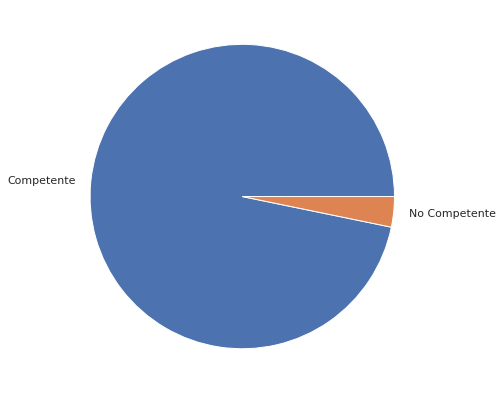

In [ ]:
labelsbank= ['Competente', 'No Competente']
plt.pie(datos["Bankrupt?"].value_counts(),labels = labelsbank)
plt.show()

Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


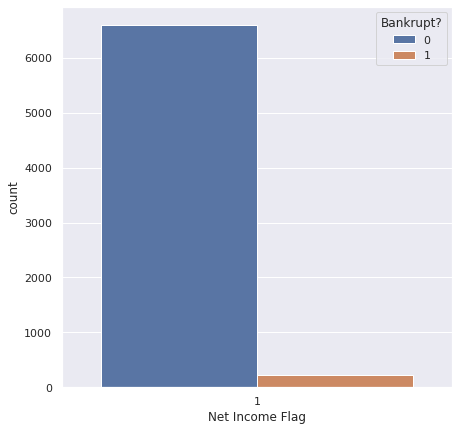

In [ ]:
print(datos[['Net Income Flag','Bankrupt?']].value_counts())     # distribucion de las emrpesas segun la caracteristica de Net Income Flag, la mayoria de las 
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?', data=datos)   # empresas de tipo que no tienen riesgo de bancarrota segun net income son 6599

In [ ]:
datos.groupby(['Bankrupt?']).mean()    # se procede a presentar los valores promedio de las caracteristicas segun si la empresa tiene o no riesfo de caer en bancarrota

ROA(C) before interest and depreciation before interest  ...  Equity to Liability
Bankrupt?                                                           ...                     
0                                                   0.508069        ...             0.048337
1                                                   0.418503        ...             0.024832

[2 rows x 95 columns]

In [ ]:
datos.pivot_table('Accounts Receivable Turnover', index= 'Operating Gross Margin', columns= 'Bankrupt?', aggfunc='mean',fill_value=0)

Bankrupt?                          0             1
Operating Gross Margin                            
0.000000                4.935631e-02  0.000000e+00
0.156308                1.793595e-03  0.000000e+00
0.432653                2.982135e-01  0.000000e+00
0.445646                1.637365e-03  0.000000e+00
0.448342                8.562182e-04  0.000000e+00
...                              ...           ...
0.664553                7.446258e-04  0.000000e+00
0.664560                7.182494e-04  0.000000e+00
0.664870                7.588285e-04  0.000000e+00
0.665151                1.718050e-02  1.220000e+09
1.000000                4.870000e+09  0.000000e+00

[3781 rows x 2 columns]

<Figure size 1440x1440 with 0 Axes>

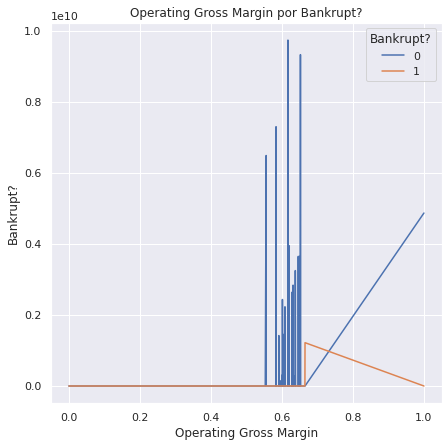

In [ ]:
plt.figure(figsize = (20,20))
datos.pivot_table('Accounts Receivable Turnover', index= 'Operating Gross Margin', columns= 'Bankrupt?', aggfunc='mean',fill_value=0).plot()
plt.title("Operating Gross Margin por Bankrupt?")
plt.ylabel("Bankrupt?")
plt.xlabel("Operating Gross Margin")
plt.show();

# se busca ver como se comporta os valores del gross margin y accounts recivable , segun si la empresa tiene o no riesgo de bancarrota, parece que las empresas
# que son mas competentes o no tienen riesgo de caer en bancarrota tienen un valor en estas caracteristicas mayor que aquellas que si tienen riesgo de bancarrota

In [ ]:
datos.pivot_table('Operating Profit Growth Rate', index= 'Operating Gross Margin', columns= 'Bankrupt?', aggfunc='mean',fill_value=0)

Bankrupt?                      0        1
Operating Gross Margin                   
0.000000                0.847191  0.00000
0.156308                0.847906  0.00000
0.432653                0.831638  0.00000
0.445646                0.847889  0.00000
0.448342                0.846758  0.00000
...                          ...      ...
0.664553                0.848025  0.00000
0.664560                0.848005  0.00000
0.664870                0.847966  0.00000
0.665151                0.848059  0.84778
1.000000                0.848075  0.00000

[3781 rows x 2 columns]

<Figure size 1440x1440 with 0 Axes>

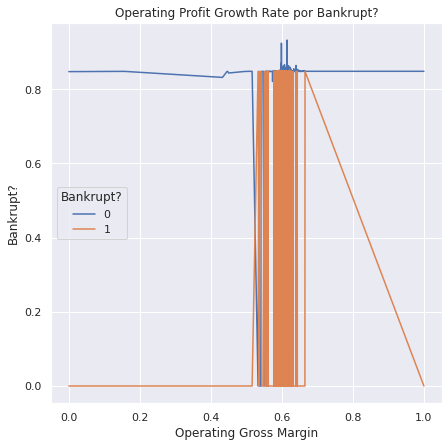

In [ ]:
plt.figure(figsize = (20,20))
datos.pivot_table('Operating Profit Growth Rate', index= 'Operating Gross Margin', columns= 'Bankrupt?', aggfunc='mean',fill_value=0).plot()
plt.title("Operating Profit Growth Rate por Bankrupt?")
plt.ylabel("Bankrupt?")
plt.xlabel("Operating Gross Margin")
plt.show();

#  segun si la empresa tiene o no riesgo de bancarrota, parece que las empresas
# que son mas competentes o no tienen riesgo de caer en bancarrota tienen un valor en estas caracteristicas mayor que aquellas que si tienen riesgo de bancarrota

##Verificar si a patir de la **ROA(A) before interest and % after tax** se oberva comportamiento de las empresas

Primero se toman o eligen caracteristicas de interes, luego se ordan según orden descendente y /o  ascendente para ver las empresas que (datos) que aparecen .Según la matriz de correlación   ROA(A) before interest and % after tax y Bankrupt tienen una correlación de 0.282941.

Ver resultados de Tabla 1 ROA(A) before interest and % after tax descendente junto con tabla 2 ROA(A) before interest and % after tax ascendente

In [ ]:
prueba1= datos.iloc[:,[0,1,2,6,21,22,25,29,30,35,36]]

In [ ]:
table1 = prueba1.sort_values('ROA(A) before interest and % after tax',ascending=False)

In [ ]:
table1.head(30)   # Las empresas que tienne el valor de ROA(A) before interest and % after tax más alto pertenecen a la categoría Bankrupt 0 (competente)

Bankrupt?  ...  Total debt/Total net worth
4877          0  ...                    0.003080
3682          0  ...                    0.000866
3532          0  ...                    0.001018
6610          0  ...                    0.007519
3385          0  ...                    0.001930
4734          0  ...                    0.004972
5393          0  ...                    0.001749
4481          0  ...                    0.003039
4530          0  ...                    0.002046
4114          0  ...                    0.004760
3207          0  ...                    0.002373
4636          0  ...                    0.006577
4621          0  ...                    0.003754
6565          0  ...                    0.004686
3365          0  ...                    0.001693
4824          0  ...                    0.001261
5163          0  ...                    0.004882
4618          0  ...                    0.000881
3374          0  ...                    0.003012
5609          0  ...                    0.003938
4217          0  ...                    0.005160
3433          0  ...                    0.003101
2290          0  ...                    0.002235
6018          0  ...                    0.027216
4766          0  ...                    0.002518
3517          0  ...                    0.002950
3571          0  ...                    0.002371
2123          0  ...                    0.005011
2242          0  ...                    0.001907
3726          0  ...                    0.002059

[30 rows x 11 columns]

Tabla 2 ROA(A) before interest and % after tax Ascendente 

In [ ]:
table2 = prueba1.sort_values('ROA(A) before interest and % after tax',ascending=True)

In [ ]:
table2.head(30)   # Una vez que se coloca el orden para observar los valores más bajos en la caracteristica OA(A) before interest and % after tax
                 # aparecen empresas en categoría 1 (que podrían caer en Bankrupt)

Bankrupt?  ...  Total debt/Total net worth
1443          1  ...                    0.002850
1035          0  ...                    0.014798
56            1  ...                    0.126572
1684          0  ...                    0.013659
2001          1  ...                    0.090127
2435          0  ...                    0.001093
3392          0  ...                    0.004692
4918          1  ...                    0.041594
3597          1  ...                    0.002866
3595          1  ...                    0.016879
5228          1  ...                    0.012950
1951          1  ...                    0.048233
2009          0  ...                    0.021436
1938          0  ...                    0.002819
3540          0  ...                    0.027471
1755          1  ...                    0.037611
3695          0  ...                    0.222178
3749          1  ...                    0.006436
3224          0  ...                    0.000653
1753          1  ...                    0.017482
2293          1  ...                    0.015423
6640          1  ...                    0.021102
2470          1  ...                    0.076939
3171          0  ...                    0.003926
1865          1  ...                    0.508690
6641          1  ...                    0.085128
1688          0  ...                    0.001737
5033          0  ...                    0.039994
1686          0  ...                    0.002043
5096          0  ...                    0.003955

[30 rows x 11 columns]

##Verificar si a patir de la Operating Profit Growth Rate se oberva comportamiento de las empresas

In [ ]:
table3 = prueba1.sort_values('Operating Profit Growth Rate',ascending=False)

In [ ]:
table3.head(30) 

Bankrupt?  ...  Total debt/Total net worth
1575          0  ...                    0.027573
3238          0  ...                    0.007149
1810          0  ...                    0.010960
1004          0  ...                    0.004541
1309          0  ...                    0.018100
6283          0  ...                    0.004533
4951          0  ...                    0.005217
5550          0  ...                    0.008206
1852          0  ...                    0.005831
1514          0  ...                    0.012126
4877          0  ...                    0.003080
5315          0  ...                    0.008609
3182          0  ...                    0.026929
2318          0  ...                    0.020664
1884          0  ...                    0.010757
1911          0  ...                    0.001065
1362          0  ...                    0.013028
4838          0  ...                    0.006990
973           0  ...                    0.007182
5901          0  ...                    0.004083
3989          0  ...                    0.000984
2266          0  ...                    0.022247
5966          0  ...                    0.005934
4636          0  ...                    0.006577
501           0  ...                    0.007174
4178          0  ...                    0.010880
977           0  ...                    0.004901
3586          0  ...                    0.001356
4171          0  ...                    0.008298
6791          0  ...                    0.007148

[30 rows x 11 columns]

In [ ]:
table4 = prueba1.sort_values('Operating Profit Growth Rate',ascending=True)

In [ ]:
table4.head(30)  # Al presentar la caracteristica Operating Profit Growth Rate con los primeros 30 más bajos, aparecen algunas empresas en categoría de Bankrupt? = 1

Bankrupt?  ...  Total debt/Total net worth
4447          0  ...                    0.019031
2001          1  ...                    0.090127
337           0  ...                    0.006094
4476          0  ...                    0.000577
5436          0  ...                    0.005498
1132          1  ...                    0.035590
4294          0  ...                    0.009622
1630          0  ...                    0.001267
6785          0  ...                    0.007850
6275          0  ...                    0.001651
1598          0  ...                    0.006165
3845          0  ...                    0.007673
3952          0  ...                    0.001293
1951          1  ...                    0.048233
3848          0  ...                    0.007415
1639          1  ...                    0.010556
5054          0  ...                    0.007987
4066          0  ...                    0.003090
2544          0  ...                    0.009153
2536          1  ...                    0.006812
33            0  ...                    0.002449
239           0  ...                    0.001595
459           0  ...                    0.002840
6344          0  ...                    0.041999
3168          0  ...                    0.001037
3750          0  ...                    0.002647
3842          0  ...                    0.081796
2816          0  ...                    0.012228
3803          0  ...                    0.016475
1823          0  ...                    0.018493

[30 rows x 11 columns]

Selección de Caracteristicas con algún Interes

In [ ]:
prueba2 = datos.iloc[:,[0,1,6,25,29,34,45,46,48,71,74,81,89,94]]   # Vamos a tomar algunas caracteristicas que representan ratios de Liquidez, Solvencia y  Rentabilidad, 
                                                                   # así como el indicador de la income flag

In [ ]:
prueba2.head(3)

Bankrupt?  ...  Net Income Flag
0          1  ...                1
1          1  ...                1
2          1  ...                1

[3 rows x 14 columns]

##Correlaciones: 
Según nos indican las **Correlaciones** si son **negativas** o inversas, una sube y l aotra nisminuye, mientras que las **positivas** una sube y la otra también sube.
Entre más cercano se encuentre a -1 o 1 la correlación es más fuerte, si se aceerca a cero 0 o da cero, indica que no son dependientes entre sí

In [ ]:
datos.corr()  # Vamos  a elegir variables o caracteristicas que permitan llegar a alguna conclusión y que sean relevantes
              # Bankrupt?,ROA(C) before interest and depreciation before interest, 

Bankrupt?  ...  Equity to Liability
Bankrupt?                                            1.000000  ...            -0.083048
ROA(C) before interest and depreciation before ...  -0.260807  ...             0.052416
ROA(A) before interest and % after tax              -0.282941  ...             0.057887
ROA(B) before interest and depreciation after tax   -0.273051  ...             0.056430
Operating Gross Margin                              -0.100043  ...             0.120029
...                                                       ...  ...                  ...
Liability to Equity                                  0.166812  ...            -0.159654
Degree of Financial Leverage (DFL)                   0.010508  ...            -0.016739
Interest Coverage Ratio (Interest expense to EBIT)  -0.005509  ...            -0.008339
Net Income Flag                                           NaN  ...                  NaN
Equity to Liability                                 -0.083048  ...             1.000000

[96 rows x 96 columns]

Según nos indican las **Correlaciones** si son **negativas** o inversas, una sube y l aotra nisminuye, mientras que las **positivas** una sube y la otra también sube.
Entre más cercano se encuentre a -1 o 1 la correlación es más fuerte, si se aceerca a cero 0 o da cero, indica que no son dependientes entre sí

In [ ]:
cor_matrix = datos.corr().abs()   # esta versión permite colorear aquellas correlaciones que nos llaman la atención tanto positivas como negativas
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))   # código tomado de la web en que aplican este método, es muy útil ayuda cuando hay muchas variables

In [ ]:
cor_matrix = prueba2.corr().abs()   # esta versión permite colorear aquellas correlaciones que nos llaman la atención tanto positivas como negativas
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))   # código tomado de la web en que aplican este método, es muy útil ayuda cuando hay muchas variables

Se observan correlaciones fuertes entre varias caracteristicas, en lo que respecta a las correlaciones posivitas , endonde si una aumenta la otra tambien se encuentra por ejemplo:

La característica que indica el comportamiento de las empesas Bankrupt?, presenta una correlación media co n las características del tipo de ROA  before interest , presentando con las tres valores de 0.26 , 0.28  y  0.27 

La característica que indica el comportamiento de las empesas Bankrupt?, presenta una correlación media  con la característica Debt ratio %, con un valor de 0.25
Bankrupt?, presenta una correlación media  con la característica Net worth/Assets con un valor de 0.25

Bankrupt?, presenta una correlación media  con la característica  Net profit before tax/Paid-in capital con un valor de 0.2


ROA(C) before interest and depreciation before interest junto a las caracteristicas similares que corresponden ROA(A) before interest and % after tax y ROA(B) before interest and depreciation after tax, presentan una correlación alta. 

Realized Sales Gross Margin y la característica Operating Gross Margin tienen una correlación alta de  0.999

Persistent EPS in the Last Four Seasons tiene una correlacion alta con las characteristicas OA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax y ROA(B) before interest and depreciation after tax, para valores de  alrrededor de 0.76

Persistent EPS in the Last Four Seasons presenta una correlacion alta con las caracteristicas de Net Value Per Share, con un valor de 0.75

Operating profit/Paid-in capital presenta una correlacion alta con Persistent EPS in the Last Four Seasons

Net Income to Total Assets presenta alta correlacion con las características ROA (las tres características de similitud)  con valores de 0.88, 096 y 0.91

Current Liabilities/Equity presenta una alta correlación con la característica de Borrowing dependency y Contingent liabilities/Net worth, con valors de 0.89 y 0.62 respectivamente 

Cash Flow to Total Assets presenta una alta correlacion con Cash Flow to Liability y la caracteristica Cash Flow to Equity


##Gráfica de  Correlación

In [ ]:
corrdat = datos.iloc[:,[0,1,2,3,4,5,6,7,8,9]]

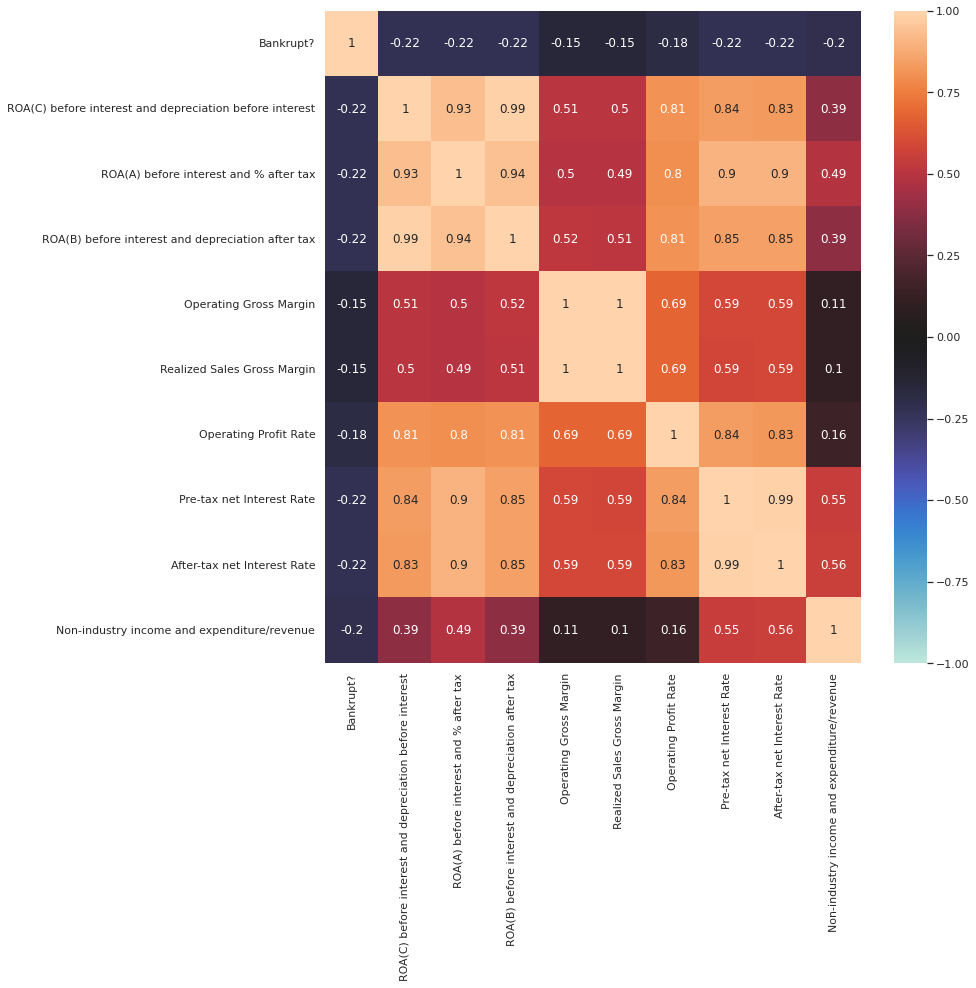

In [ ]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrdat.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

In [ ]:
corrdat1 = prueba2

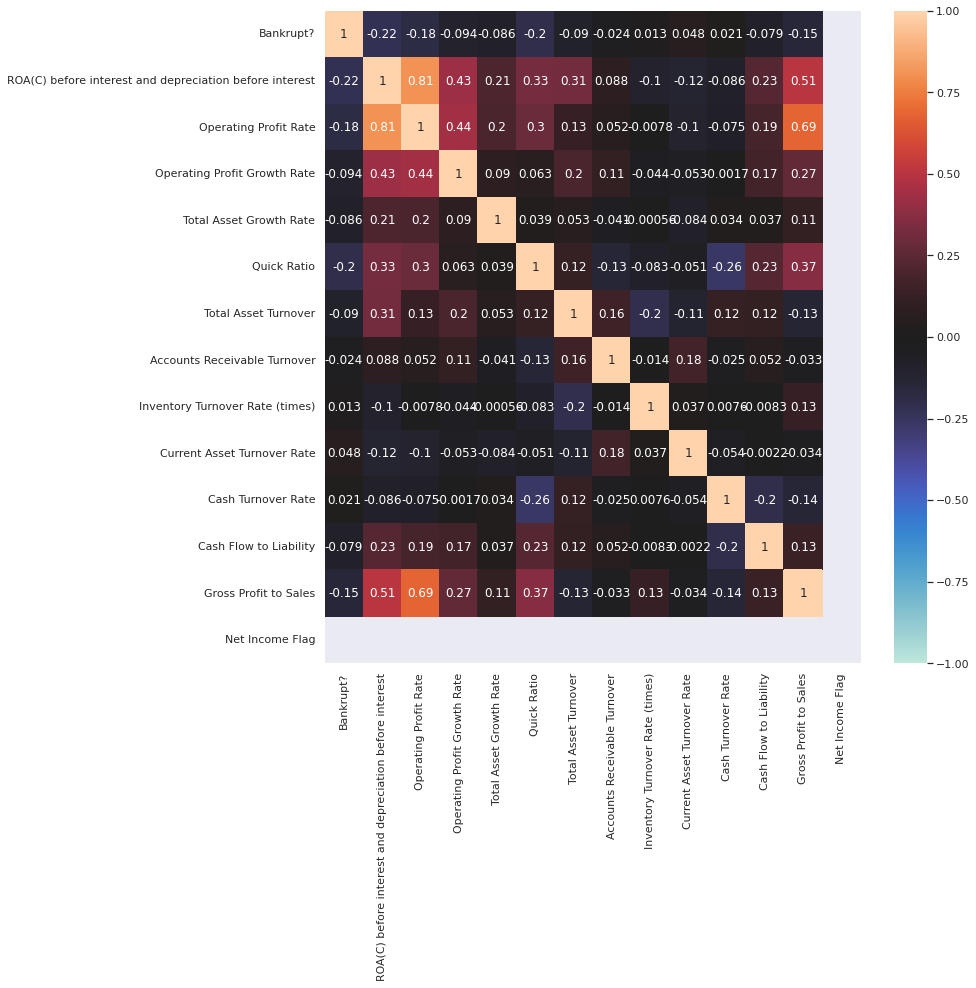

In [ ]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrdat1.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

In [ ]:
corrdat2= datos.iloc[:,[19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]

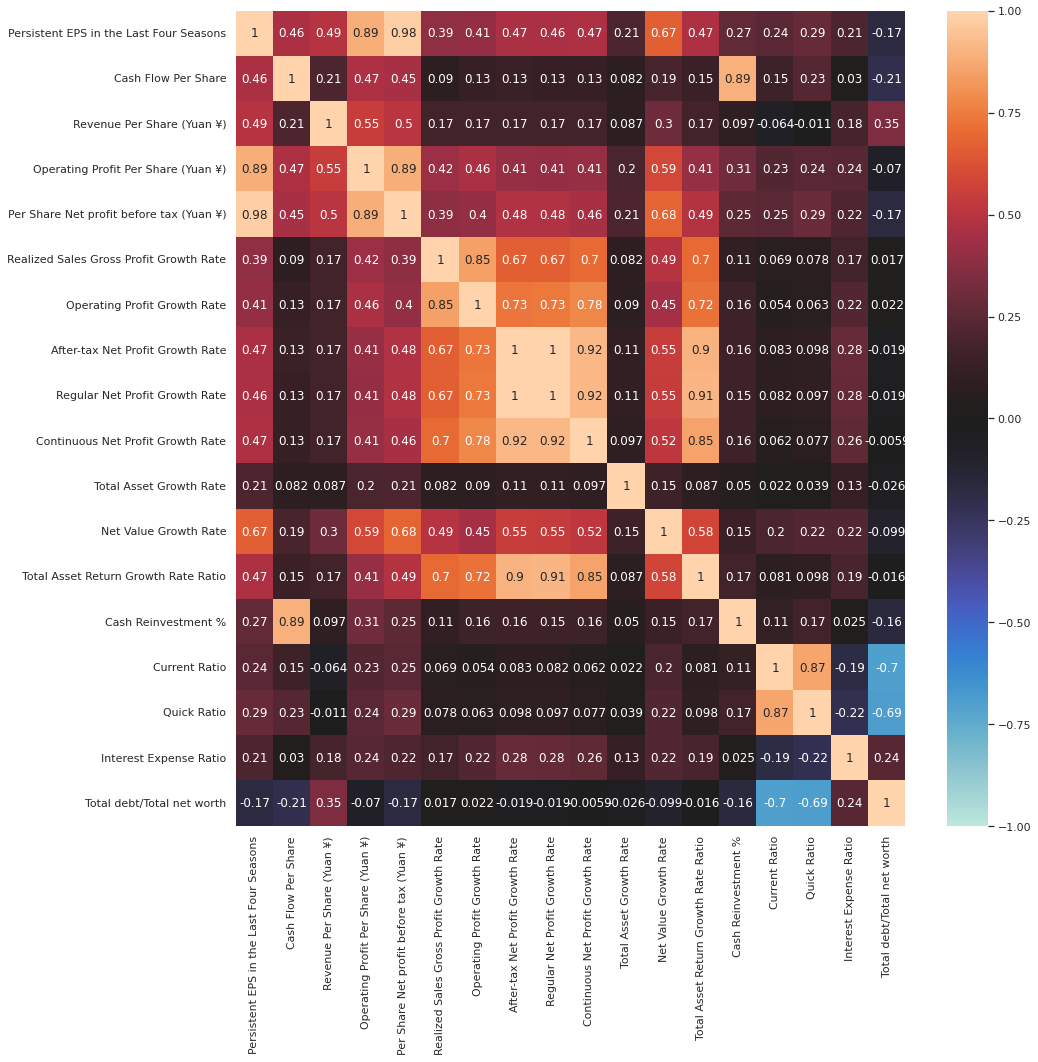

In [ ]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrdat2.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

ROA(C) before interest and depreciation before interest junto a las caracteristicas similares que corresponden ROA(A) before interest and % after tax y ROA(B) before interest and depreciation after tax, presentan una correlación alta. 

Realized Sales Gross Margin y la característica Operating Gross Margin tienen una correlación alta de  0.999

Persistent EPS in the Last Four Seasons tiene una correlacion alta con las characteristicas OA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax y ROA(B) before interest and depreciation after tax, para valores de  alrrededor de 0.76

Persistent EPS in the Last Four Seasons presenta una correlacion alta con las caracteristicas de Net Value Per Share, con un valor de 0.75

Operating profit/Paid-in capital presenta una correlacion alta con Persistent EPS in the Last Four Seasons

Net Income to Total Assets presenta alta correlacion con las características ROA (las tres características de similitud)  con valores de 0.88, 096 y 0.91

Current Liabilities/Equity presenta una alta correlación con la característica de Borrowing dependency y Contingent liabilities/Net worth, con valors de 0.89 y 0.62 respectivamente 

Cash Flow to Total Assets presenta una alta correlacion con Cash Flow to Liability y la caracteristica Cash Flow to Equity

In [ ]:
f,ax = plt.subplots(figsize=(60,60))
sns.heatmap(datos.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

##Grafico de Scattermatrix

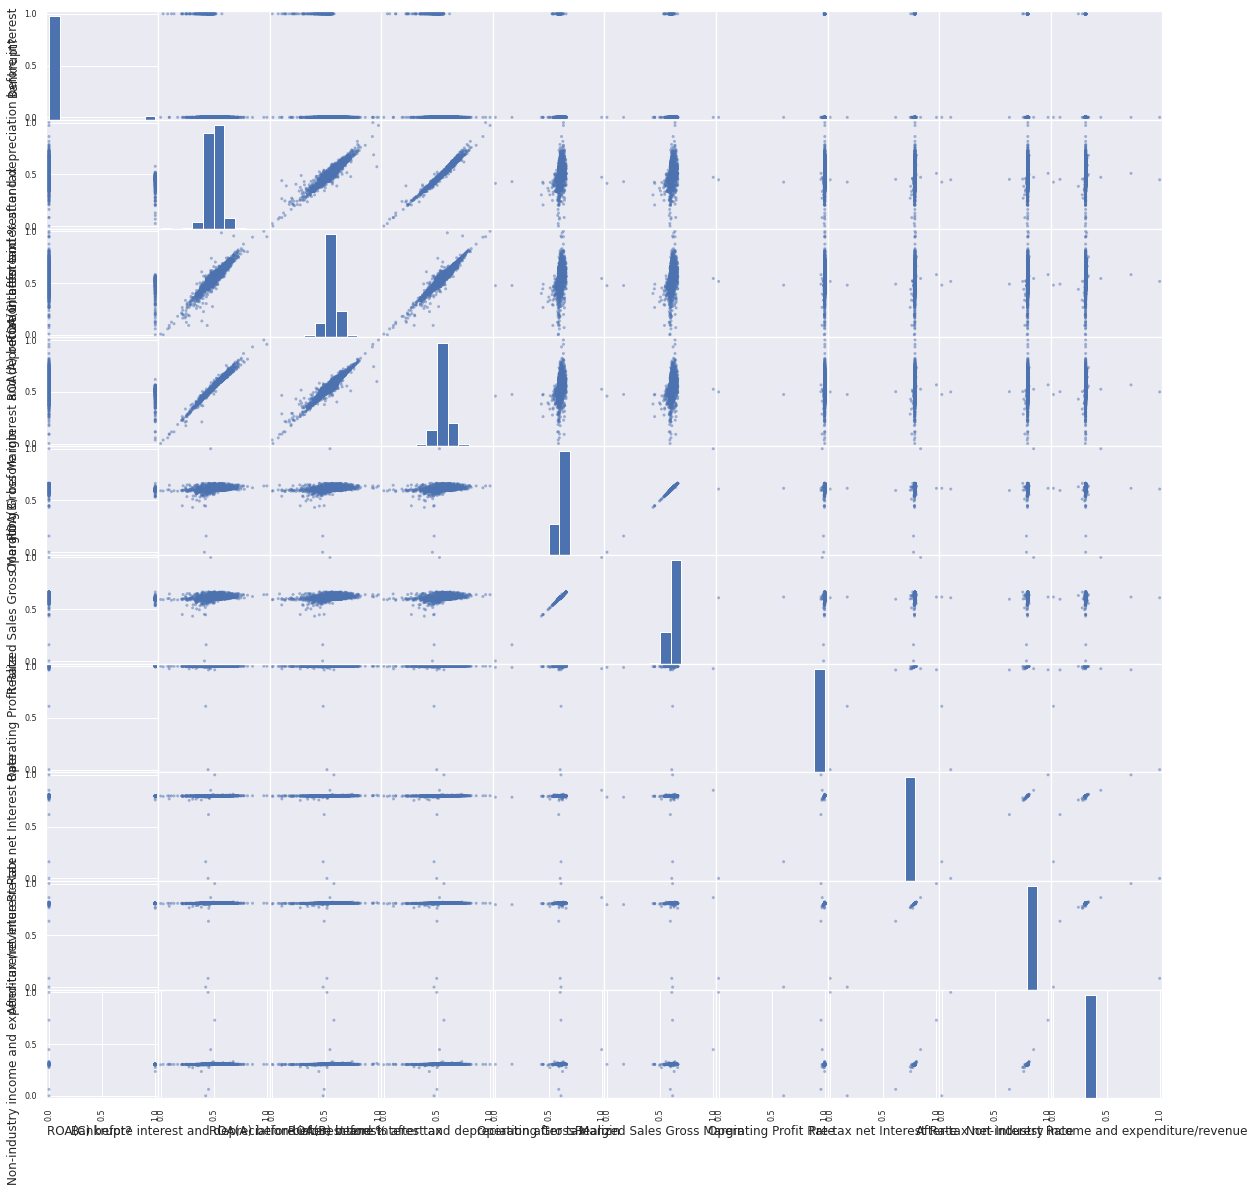

In [ ]:
from pandas.plotting import scatter_matrix 
scatter_matrix((datos[['Bankrupt?','ROA(C) before interest and depreciation before interest','ROA(A) before interest and % after tax','ROA(B) before interest and depreciation after tax','Operating Gross Margin','Realized Sales Gross Margin','Operating Profit Rate','Pre-tax net Interest Rate','After-tax net Interest Rate','Non-industry income and expenditure/revenue']]),figsize = (20, 20));

## ANOVA

Por el tipo de variables, el cálculo de los ANOVAS y PV values, no aportarian resultados manejables o para interpretar, por lo tanto no se proceden a calcular

##Modelo de Machine Learning

In [ ]:
datos

Bankrupt?  ...  Equity to Liability
0             1  ...             0.016469
1             1  ...             0.020794
2             1  ...             0.016474
3             1  ...             0.023982
4             1  ...             0.035490
...         ...  ...                  ...
6814          0  ...             0.029890
6815          0  ...             0.038284
6816          0  ...             0.097649
6817          0  ...             0.044009
6818          0  ...             0.233902

[6819 rows x 96 columns]

In [ ]:
datos1= datos.copy()

In [ ]:
datos1

Bankrupt?  ...  Equity to Liability
0             1  ...             0.016469
1             1  ...             0.020794
2             1  ...             0.016474
3             1  ...             0.023982
4             1  ...             0.035490
...         ...  ...                  ...
6814          0  ...             0.029890
6815          0  ...             0.038284
6816          0  ...             0.097649
6817          0  ...             0.044009
6818          0  ...             0.233902

[6819 rows x 96 columns]

In [ ]:
X = datos1  # Renombrando variable para utilizarla en Scikit-Learn

In [ ]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Importando PCA
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
evr = pca.explained_variance_ratio_
evr

array([1.33042166e-01, 7.14465593e-02, 4.98367820e-02, 4.67479217e-02,
       4.19014322e-02, 3.20225577e-02, 3.01736399e-02, 2.90447308e-02,
       2.77447020e-02, 2.17370993e-02, 2.04660876e-02, 1.96530569e-02,
       1.77015032e-02, 1.58731924e-02, 1.56520395e-02, 1.51904806e-02,
       1.50085780e-02, 1.38279479e-02, 1.30104538e-02, 1.27572697e-02,
       1.23498325e-02, 1.20564755e-02, 1.14881093e-02, 1.10985600e-02,
       1.10009084e-02, 1.08883190e-02, 1.06603272e-02, 1.06275640e-02,
       1.06004458e-02, 1.03706253e-02, 1.02927816e-02, 1.01646543e-02,
       1.00868539e-02, 1.00290756e-02, 9.88952674e-03, 9.76477906e-03,
       9.59715552e-03, 9.56999428e-03, 9.37446960e-03, 9.03690397e-03,
       8.94770210e-03, 8.74886056e-03, 8.59701472e-03, 8.39475742e-03,
       8.18583438e-03, 7.96219210e-03, 7.52916062e-03, 7.22034546e-03,
       6.91752439e-03, 6.29399599e-03, 5.94511957e-03, 5.68656898e-03,
       5.66684496e-03, 5.24580781e-03, 4.89225207e-03, 4.45266105e-03,
      

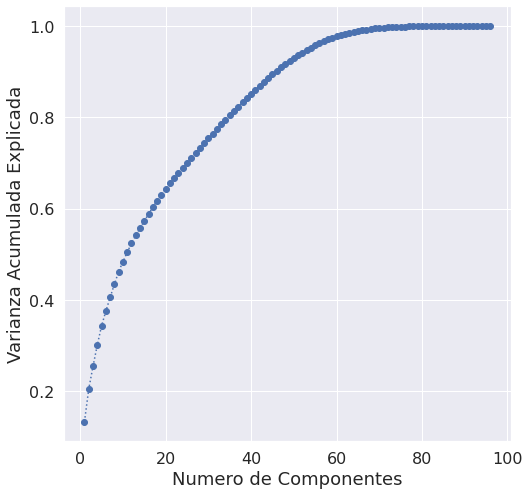

In [ ]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 35


###Algoritmo K-means

In [ ]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 10


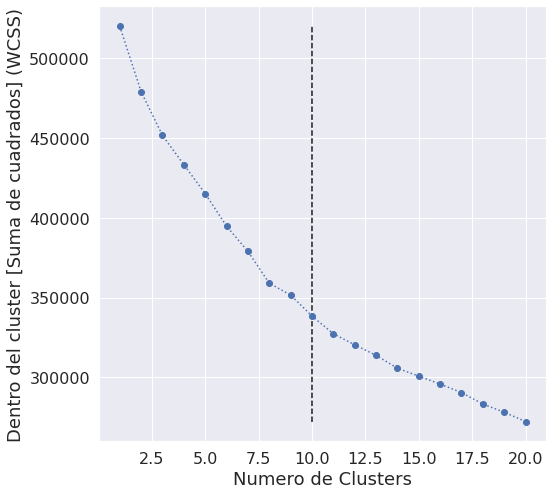

In [ ]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Analisis y Visualización

In [ ]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [ ]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

Bankrupt?  ...  Cluster
0          1  ...        2
1          1  ...        5
2          1  ...        2
3          1  ...        2
4          1  ...        2

[5 rows x 132 columns]

# Creando visualizacion de los datos con PCA

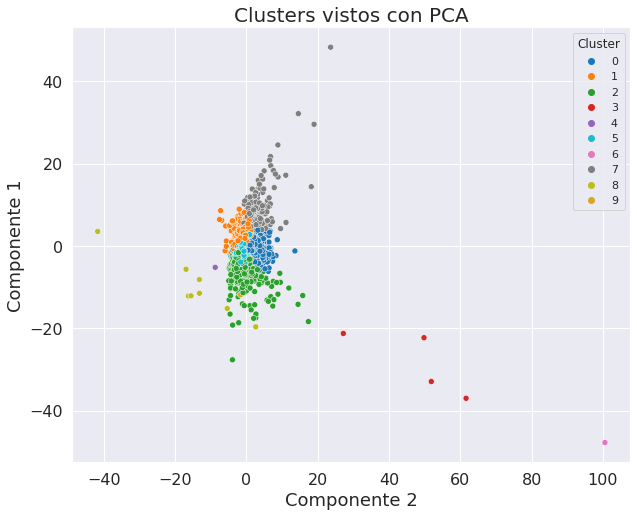

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:gray', 'tab:olive', 'goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();


Ests aplicacion del modelo de clusterizacion se realizó con la selección automatica de las caracteristicas, los cluster o grupos generados no quedan claramente, se procederá a realizar una selección de caracteristicas y aplicación de limpieza de atipicos para observar los cambios en la clusterizacioón

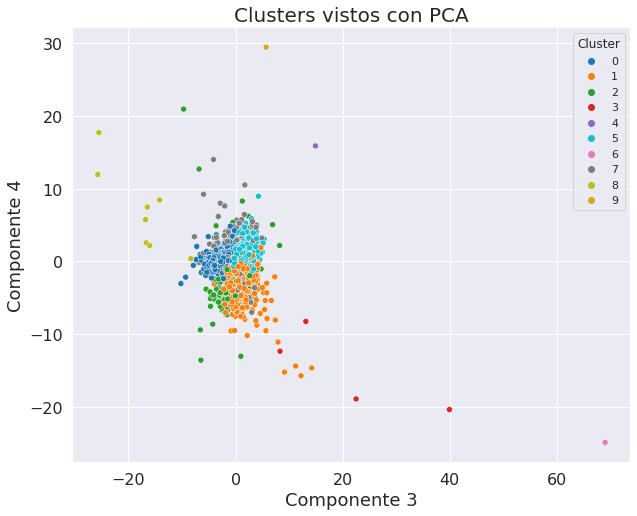

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 3']
y = df_seg_pca_kmeans['Component 4']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:gray', 'tab:olive','goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 3", fontsize=18)
plt.ylabel("Componente 4", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

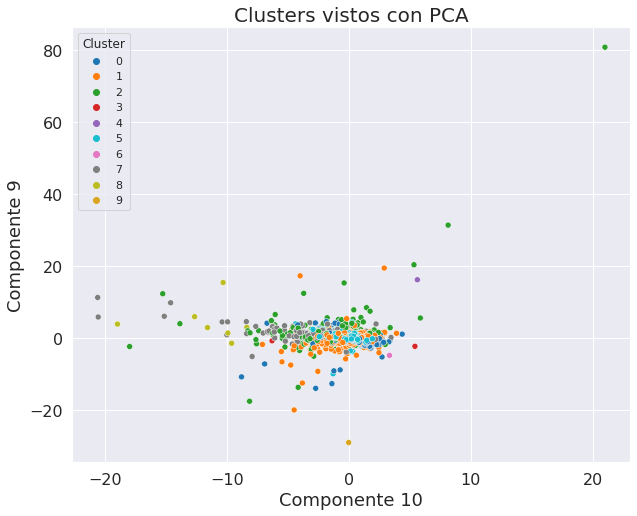

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 10']
y = df_seg_pca_kmeans['Component 9']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:gray', 'tab:olive','goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 10", fontsize=18)
plt.ylabel("Componente 9", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

Prueba de Modelo Cluster Con Caracteristicas Seleccionadas

In [1322]:
prueba3 = datos.iloc[:,[0,1,6,25,29,34,45,46,48,71,74,81,89,94]] 

In [1323]:
prueba3.head(3)

Bankrupt?     ROA_C  ...  Gross Profit to Sales  Net Income Flag
0          1  0.370594  ...               0.601453                1
1          1  0.464291  ...               0.610237                1
2          1  0.426071  ...               0.601449                1

[3 rows x 14 columns]

In [1332]:
# Renombrando variable para utilizarla en Scikit-Learn

X = prueba3

In [1333]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [1334]:
# Importando PCA

pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [1335]:
# El atributo muestra cuanta varianza es explicada por cada uno de las 13 variables
evr = pca.explained_variance_ratio_
evr

array([0.12317891, 0.11939467, 0.09048244, 0.07914099, 0.07727208,
       0.07667167, 0.07488617, 0.07195694, 0.06773481, 0.06601067,
       0.06360467, 0.05058042, 0.03908555, 0.        ])

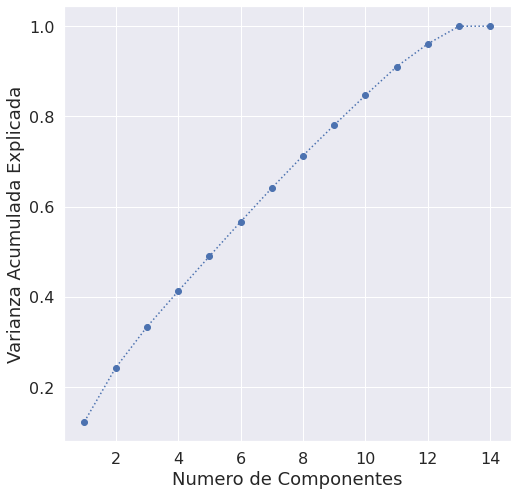

In [1336]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [1337]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 10


In [1339]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 9


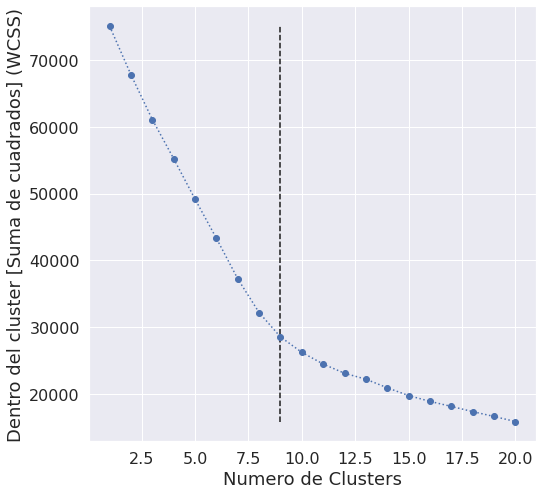

In [1340]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [1341]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [1342]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

Bankrupt?     ROA_C  ...  Component 10  Cluster
0          1  0.370594  ...     -2.664271        1
1          1  0.464291  ...     -2.577807        1
2          1  0.426071  ...     -2.796544        1
3          1  0.399844  ...     -1.675766        1
4          1  0.465022  ...     -2.699567        1

[5 rows x 25 columns]

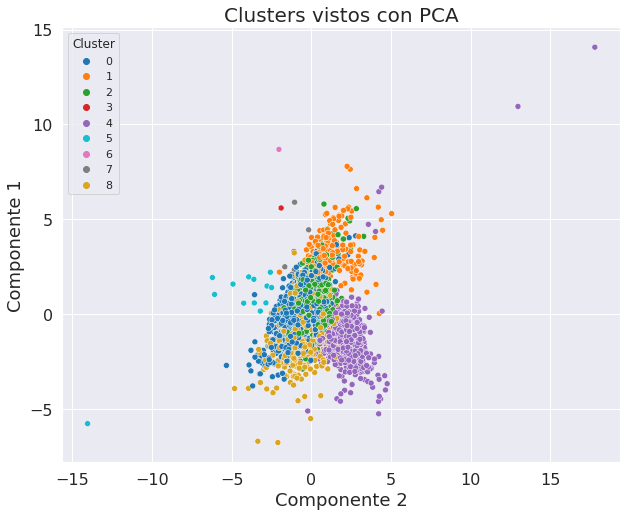

In [1344]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:gray', 'goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

Se observan cluster sobrepuestos así como no claramente definidos, se procederá a realizar la prueba de limpieza de los atipicos para observar el cambio en los cluster.

## ML Supervisado

In [ ]:
# Importando bibliotecas
from pandas import read_csv 
import pandas as pd #manejo y estructuracion de datos y su manipulación
from pandas.plotting import scatter_matrix #diagramas de correlacción
from matplotlib import pyplot #Hacer gráficos en python
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.model_selection import cross_val_score #validación cruzada score 
from sklearn.model_selection import StratifiedKFold #validacion cruzada 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #matriz de confusión
from sklearn.metrics import accuracy_score #score de validación cruzada 

In [ ]:
# Modelos de ML con que se va a trabajar
from sklearn.metrics import accuracy_score #score de validación cruzada 
from sklearn.linear_model import LogisticRegression #regresion logística
from sklearn.tree import DecisionTreeClassifier #arboles de decision
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Análisis discriminante lineal 
from sklearn.naive_bayes import GaussianNB #Gauss Bayesiana
from sklearn.svm import SVC # Maquinas de Soporte Vectorial
from sklearn.model_selection import train_test_split

##Crear un conjunto de datos de Validación

In [ ]:
# Conjunto de datos de validación dividida
# Con el 80% se crea el modelo y con el 20% se entrena

array = prueba2.values #los datos ahora se transforman en un arreglo

X = array[:,1:13]  # se toman los datos, sin la clase de clasificación, son 4 posiciones, por eso 4
y = array[:,0] # se toman los datos después de la posición 4, en este caso las clases.

# Se dividen los datos en conjunto de entrenamiento y prueba, se utiliza random_state = 0 para que no dé
# resultados diferentes si se vuelve a correr. 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

Se va a probar con los siguientes algoritmos:

1.   Regresión logística (LR)
2.   Análisis discriminante lineal (LDA)
3.   K Vecinos más cercanos (KNN).
4.   Árboles de clasificación y regresión (CART).
5.   Gauss Bayesiana (NB).


In [ ]:
# Algoritmos de Comprobación, se guardan en una lista
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

In [ ]:
#Se debe seleccionar el mejor modelo, ya que ahora se tienen 6 modelos y estimaciones de precisión para cada uno,
#por ello se necesita comparar los modelos entre sí y seleccionar el más preciso.
import warnings
warnings.filterwarnings('ignore')

resultados = []
names = []


# Si se necesita tanto el índice o nombre, así como el elemento, se usa for indice, elemento en lista
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # Declaracion de la validación cruzada, las características
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en lista
    resultados.append(cv_resultados)  # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en matrices, esto para hacer el boxplot.
    names.append(name) # names en matrices
    print('%s: %f (%f)' % (name, cv_resultados.mean(), cv_resultados.std()))

LR: 0.967920 (0.000899)
LDA: 0.965904 (0.003670)
KNN: 0.966821 (0.002366)
CART: 0.948123 (0.013037)
NB: 0.035380 (0.002721)
SVC: 0.968103 (0.000874)


In [ ]:
# vamos a elegir el SVC

In [ ]:
# Haciendo predicciones y evaluación del dataset

model = SVC()
model.fit(X_train, Y_train)
prediccion = model.predict(X_test)

In [ ]:
mc =pd.DataFrame(confusion_matrix(Y_test, prediccion, labels=[0,1]), 
                 index = [0,1],  
                 columns = [0,1])  
 
# Evaluando Predicciones
print("ROC:", accuracy_score(Y_test, prediccion),sep='\n')
print("")
print("Matriz de Confusión:", mc,sep='\n')

ROC:
0.966275659824047

Matriz de Confusión:
      0  1
0  1318  0
1    46  0


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)    # vemos una identificación de 1318  identificados correctamente, mientras que se identificaron 46 falss negativos
print(cm)

[[1318    0]
 [  46    0]]


In [ ]:
empresa1 =  classifier.predict([[0.37,0.95,0.85,5.667,0.003,0.002,0.0126,1.0667,5.45,3.85,0.385,0]])     # predicción
print(empresa1)

[0.]


## Prueba Limpiando los Outliers

In [ ]:
prueba2.head(3)

Bankrupt?     ROA_C  ...  Gross Profit to Sales  Net Income Flag
0          1  0.370594  ...               0.601453                1
1          1  0.464291  ...               0.610237                1
2          1  0.426071  ...               0.601449                1

[3 rows x 14 columns]

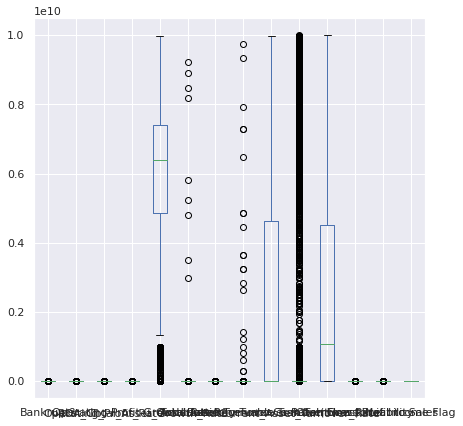

In [ ]:
prueba2.plot(kind='box')    # vamos a limpiar los atipicos sin afectar materialmente (no quitar de más) el contenido de los datos en este dataset
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
datos = datos.rename(columns={"ROA(C) before interest and depreciation before interest":"ROA_C", 'Operating Profit Rate':'Operating_Profit_Rate', 'Total Asset Growth Rate':'Total_Asset_Growth_Rate','Current Asset Turnover Rate':'Current_Asset_Turnover_Rate', 'Cash Flow to Liability':'Cash_Flow_to_Liability', 'Operating Profit Growth Rate':'Operating_Profit_Growth_Rate','Accounts Receivable Turnover':'Accounts_Receivable_Turnover','Quick Ratio':'Quick_Ratio'})

In [ ]:
datos.columns

Index(['Bankrupt?', 'ROA_C', 'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating_Profit_Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating_Profit_Growth_Rate', 'After-tax Net Profit Growth Rate',
       'Regular Net Profit Grow

In [ ]:
prueba2 = datos.iloc[:,[0,1,6,25,29,34,45,46,48,71,74,81,89,94]]   # Vamos a tomar algunas caracteristicas que representan ratios de Liquidez, Solvencia y  Rentabilidad, 
                                                                   # así como el indicador de la income flag

In [ ]:
prueba2.head(3)

Bankrupt?     ROA_C  ...  Gross Profit to Sales  Net Income Flag
0          1  0.370594  ...               0.601453                1
1          1  0.464291  ...               0.610237                1
2          1  0.426071  ...               0.601449                1

[3 rows x 14 columns]

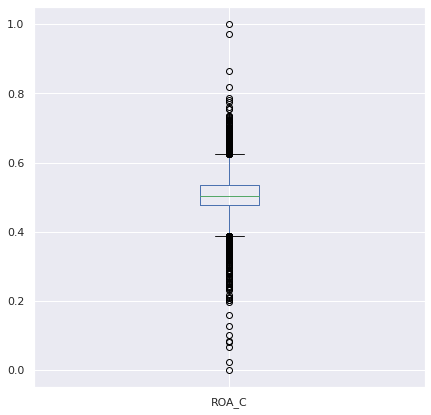

In [ ]:
prueba2['ROA_C'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['ROA_C'], [25,50,75])
quantiles

array([0.47652708, 0.5027056 , 0.53556281])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(ROA_C > @median - 2*@sigma) & (ROA_C < @median + 2*@sigma)")

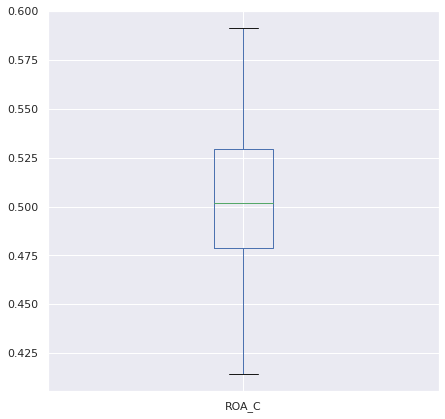

In [ ]:
prueba2['ROA_C'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

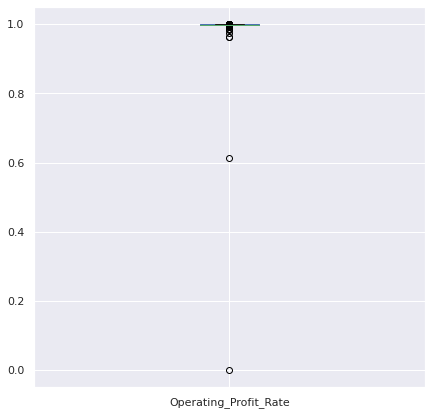

In [ ]:
prueba2['Operating_Profit_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['Operating_Profit_Rate'], [25,50,75])
quantiles

array([0.99897383, 0.99902097, 0.99908094])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(Operating_Profit_Rate > @median - 2*@sigma) & (Operating_Profit_Rate < @median + 2*@sigma)")

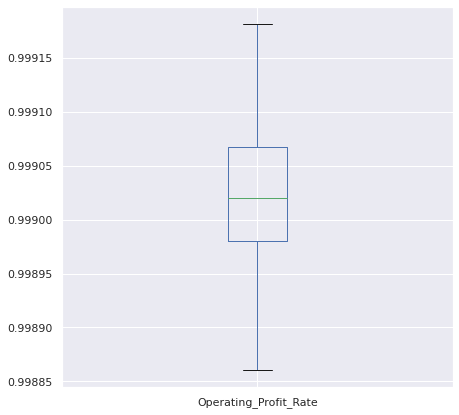

In [ ]:
prueba2['Operating_Profit_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

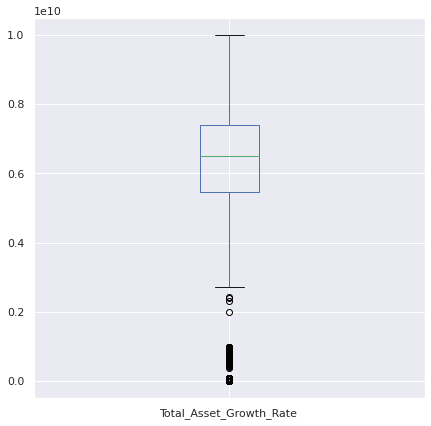

In [ ]:
prueba2['Total_Asset_Growth_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['Total_Asset_Growth_Rate'], [25,50,75])
quantiles

array([5.45e+09, 6.51e+09, 7.39e+09])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(Total_Asset_Growth_Rate> @median - 2*@sigma) & (Total_Asset_Growth_Rate < @median + 2*@sigma)")

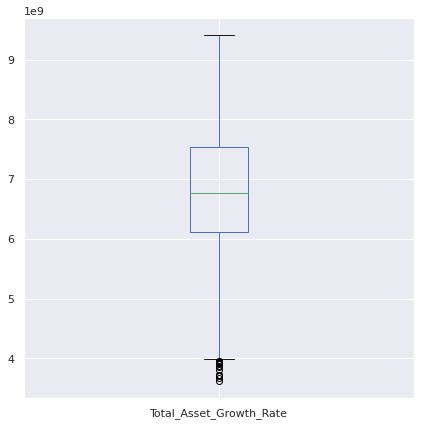

In [ ]:
prueba2['Total_Asset_Growth_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

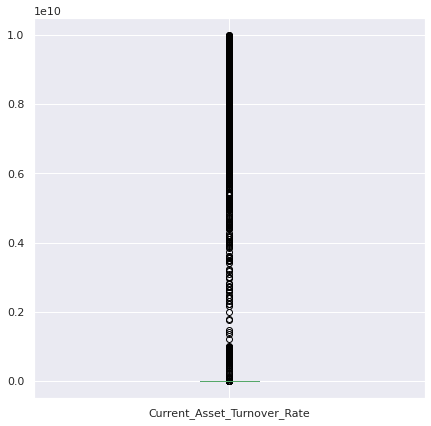

In [ ]:
prueba2['Current_Asset_Turnover_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['Current_Asset_Turnover_Rate'], [25,50,75])
quantiles

array([0.00013986, 0.00018676, 0.00039851])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(Current_Asset_Turnover_Rate> @median - 1*@sigma) & (Current_Asset_Turnover_Rate < @median + 1*@sigma)")

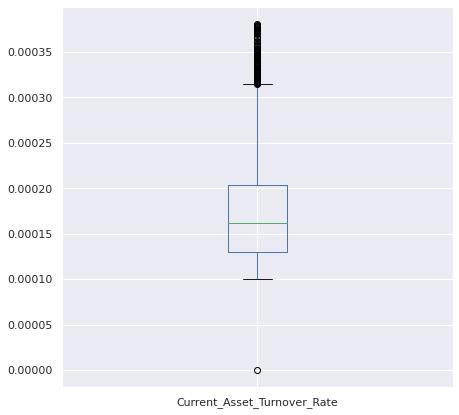

In [ ]:
prueba2['Current_Asset_Turnover_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Cash_Flow_to_Liability

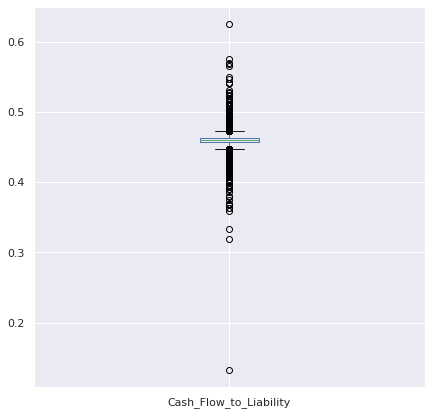

In [ ]:
prueba2['Cash_Flow_to_Liability'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['Cash_Flow_to_Liability'], [25,50,75])
quantiles

array([0.45697726, 0.45971628, 0.46339865])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(Cash_Flow_to_Liability> @median - 2*@sigma) & (Cash_Flow_to_Liability < @median + 2*@sigma)")

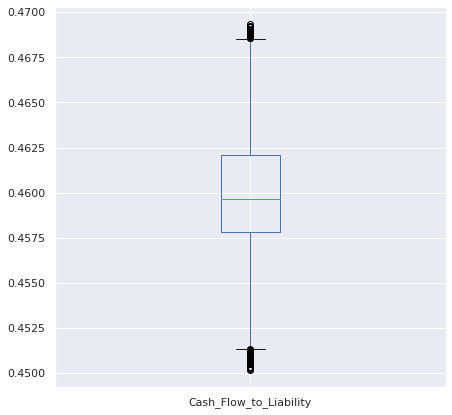

In [ ]:
prueba2['Cash_Flow_to_Liability'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Operating Profit Growth Rate

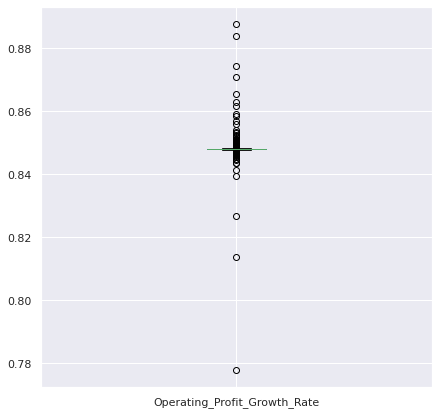

In [ ]:
prueba2['Operating_Profit_Growth_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['Operating_Profit_Growth_Rate'], [25,50,75])
quantiles

array([0.8479869 , 0.84804088, 0.84812266])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(Operating_Profit_Growth_Rate > @median - 2*@sigma) & (Operating_Profit_Growth_Rate < @median + 2*@sigma)")

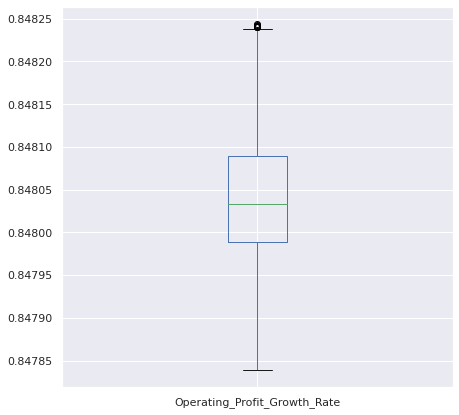

In [ ]:
prueba2['Operating_Profit_Growth_Rate'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Accounts_Receivable_Turnover

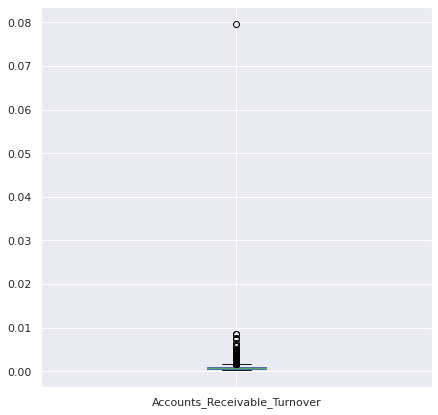

In [ ]:
prueba2['Accounts_Receivable_Turnover'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['Accounts_Receivable_Turnover'], [25,50,75])
quantiles

array([0.00064521, 0.00081361, 0.00109361])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(Accounts_Receivable_Turnover > @median - 2*@sigma) & (Accounts_Receivable_Turnover < @median + 2*@sigma)")

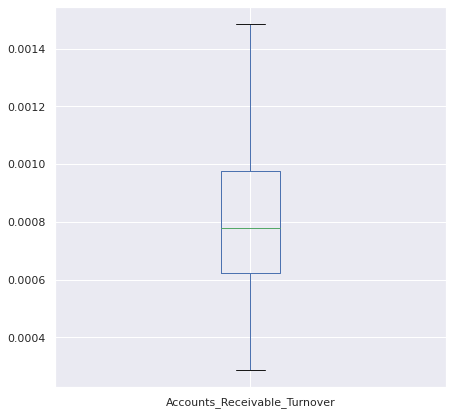

In [ ]:
prueba2['Accounts_Receivable_Turnover'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Quick_Ratio

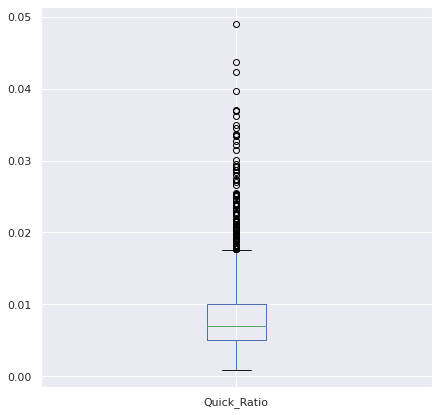

In [ ]:
prueba2['Quick_Ratio'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

In [ ]:
quantiles = np.percentile(prueba2['Quick_Ratio'], [25,50,75])
quantiles

array([0.00501926, 0.00694272, 0.01001482])

In [ ]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [ ]:
prueba2 = prueba2.query("(Quick_Ratio > @median - 3*@sigma) & (Quick_Ratio < @median + 3*@sigma)")

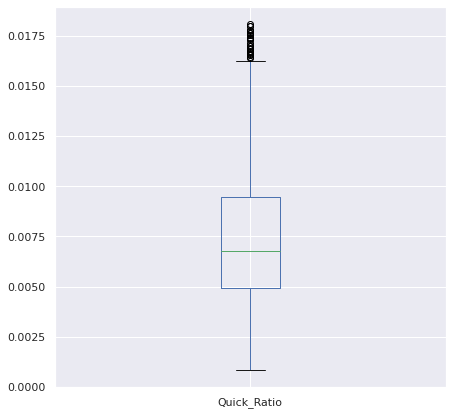

In [ ]:
prueba2['Quick_Ratio'].plot(kind='box')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

## Revision de la aplicación sobre los Atípicos

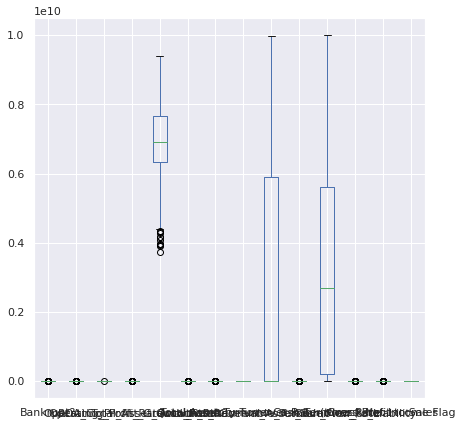

In [ ]:
prueba2.plot(kind='box')    # vamos a limpiar los atipicos sin afectar materialmente (no quitar de más) el contenido de los datos en este dataset
sns.set(rc={'figure.figsize':(12,12)})
plt.show()

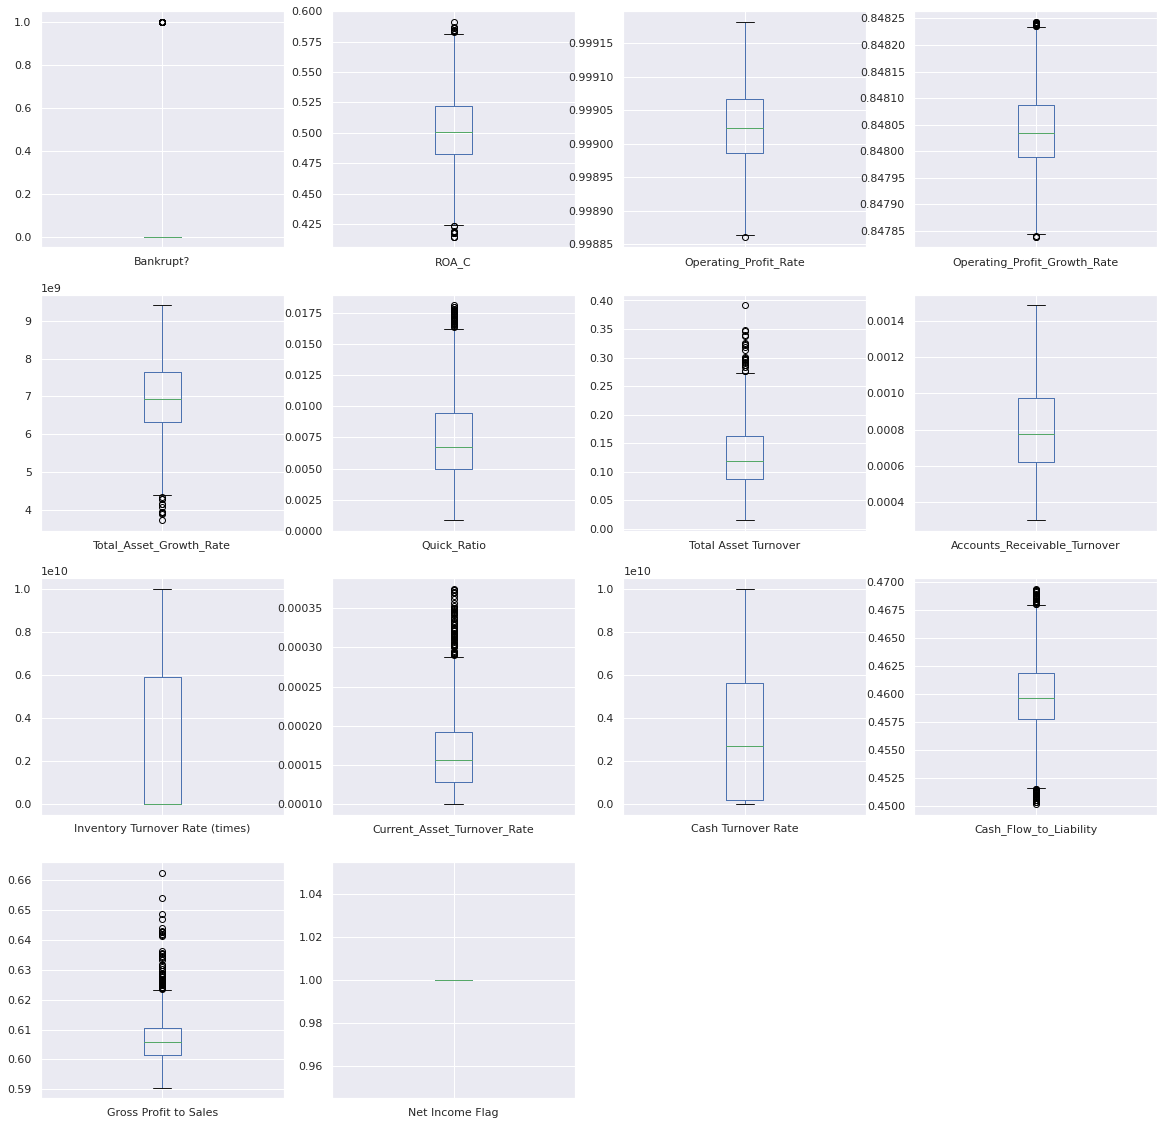

In [ ]:
prueba2.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [ ]:
X = prueba2  # Renombrando variable para utilizarla en Scikit-Learn

In [ ]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Importando PCA

pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# El atributo muestra cuanta varianza es explicada por cada uno de las 13 variables
evr = pca.explained_variance_ratio_
evr

array([0.1998169 , 0.14067149, 0.09706887, 0.08421156, 0.07719616,
       0.07622867, 0.06969375, 0.06914001, 0.05593517, 0.04734506,
       0.03892548, 0.02805176, 0.01571513, 0.        ])

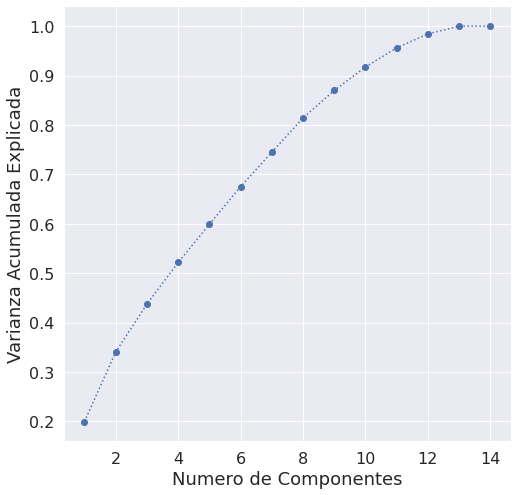

In [ ]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 8


## Algoritmo k-means

In [ ]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 6


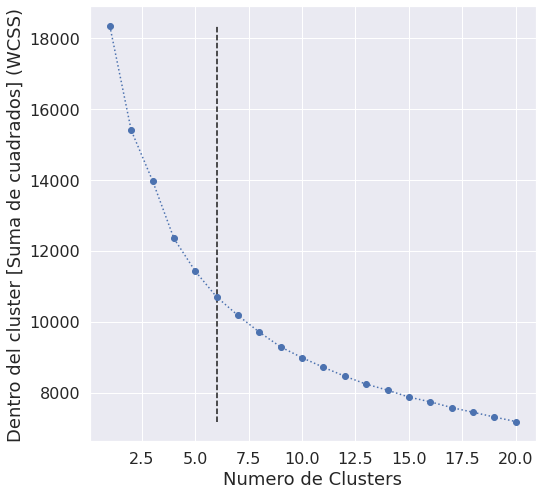

In [ ]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

##Analisis y Visualizacion

In [ ]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

Bankrupt?     ROA_C  ...  Component 8  Cluster
0          1  0.464291  ...     3.557385        2
1          0  0.488519  ...    -1.325033        0
2          0  0.444401  ...    -0.078540        1
3          0  0.535953  ...     0.114445        4
4          0  0.487398  ...     0.890274        4

[5 rows x 23 columns]

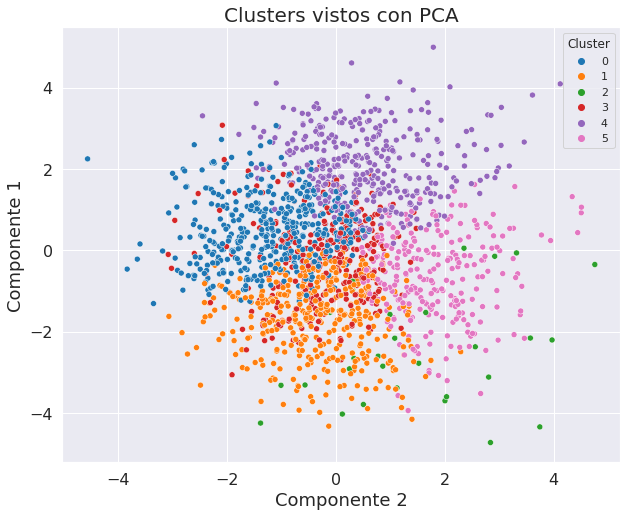

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();


Se observa  mas disperso los cluster en esta prueba realizada posteriormente a la limpieza de los valores atipicios 

## Conclusiones

Por medio del uso de modelos de Machine Learning Se pueden evaluar las variables que influyen en la determinación o no de la posibilidad que una empresa presente bancarrota. Estas posibilidades que se aplican a la determinación de las posibilidades financieras de una empresa, pueden aplicarse a individuos en procesos de clasificación o aprobación de créditos.

##Resumen

Se recibió un dataset con información financiera que ayduda al proceso de análisis crediticio, apra determinar si las empresas podrían o no caer en bancarota.

Por lo que en el proceso de este análisis formuláos las siguientes preguntas:

Qué se requiere analizar en una empresa para determinar la salud o liquidez financiera?

Según la información brindada se puede inferir si una empresa puede o no caer en bancarrota?

In [ ]:
data1.describe()

Bankrupt?  ...  Equity to Liability
count  6819.000000  ...          6819.000000
mean      0.032263  ...             0.047578
std       0.176710  ...             0.050014
min       0.000000  ...             0.000000
25%       0.000000  ...             0.024477
50%       0.000000  ...             0.033798
75%       0.000000  ...             0.052838
max       1.000000  ...             1.000000

[8 rows x 96 columns]

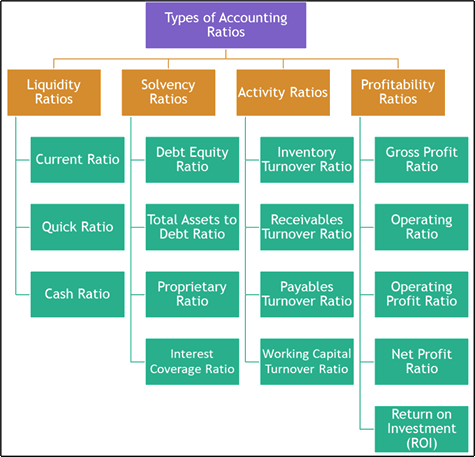

In [1346]:
# Detalle de los tipos de Ratios Financieros que se utilizan en Evaluaciones Financieras
from PIL import Image
Image.open('/content/drive/MyDrive/Data Sets/Types-of-Ratio.png') 

Los tres elementos determinantes de todo análisis financiero son:

**Liquidez**: capacidad para hacer frente y cumplir con sus obligaciones financieras a corto plazo.

**Solvencia**: como responder a los compromisos de largo plazo (endeudamiento).

**Rentabilidad**: capacidad de generar ingresos/beneficios, se puede medir el nivel de eficiencia con el que los recursos son utilizados en la empresa.

Según se indica en Análisis y Dianóstico Financiero Enfoque Integral. Tarcisio Salas (2012). El análisis financiero permite evaluar el cumplimiento de las metas y planes y  el desempeño de la empresa en las áreas claves de la administración. La obtención y utilización de fondos se reflejan en el balance general. Los ingresos, costos, gastos, y ganancias, derivados del manejo de fondos en las operaciones, se concretan en el estado de resultados. El análisis financiero examina las relaciones entre datos de ambos estados, con la finalidad de calificar la gestión y el grado de éxito alcanzado por la empresa. Los tópicos más importantes cubiertos por el análisis son los siguientes:


*  Posición de liquidez y flujo de efectivo
*  Nivel y efecto del endeudamiento (apalancamiento financiero)
*  Financamiento y estructura de capital
*  Rendimiento de inversiones de capital
*  Manejo y eficiencia de inversiones en activo circulante
*  Márgenes de utilidad y estructura de costos y gastos
*  Rentabilidad del patrimonio







## Referencias Primarias

Uso de código visto en la web

PETR KOLAR 
https://www.kaggle.com/petrkolar/ml-workflow-0-99-f1

MULTICOLLINEARITY (CORRELATION BETWEEN PREDICTOR VARIABLES)

cor_matrix = df.corr().abs()
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

##Referencias Secundarias

Para referencia de información (https://isslab.csie.ncu.edu.tw/download/publications/1.pdf)   Financial ratios and corporate governance indicators in bankruptcy
prediction: A comprehensive study



Measuring the Defensive Position of a Firm, Sidney Davidson, George H. Sorter and Hemu Kalle

https://www.jstor.org/stable/4469589